In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
raw_data = pd.read_csv('data_set.csv')
raw_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [4]:
# Dataset without feature engineering (Orignal_Dataset) for LR 1
dataset1 = raw_data.dropna()
dataset1 = dataset1.drop('id', axis='columns')
dataset1.diagnosis = dataset1.diagnosis.replace(['M', 'B'], [1, 0])
dataset1

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [5]:
# Dataset with feature engineering (Featured_Dataset)
dataset2 = raw_data.drop('id', axis='columns')

for column in dataset2.columns[1:]:
    dataset2[column] = (dataset2[column] - dataset2[column].mean())/dataset2[column].std()
    
dataset2.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
dataset2.fillna(0, inplace=True)
dataset2

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1     1.101451     -2.071512        1.267272   0.983510   
1            1     1.835017     -0.353322        1.683156   1.907030   
2            1     1.584809      0.455786        1.563744   1.557513   
3            1    -0.766584      0.253509       -0.594733  -0.763792   
4            1     1.755405     -1.150804        1.773744   1.824624   
..         ...          ...           ...             ...        ...   
564          1     2.116502      0.720838        2.057863   2.341795   
565          1     1.709913      2.083301        1.613156   1.722326   
566          1     0.706235      2.043775        0.670212   0.577445   
567          1     1.843547      2.334403        1.979627   1.733693   
568          0    -1.807224      1.220718       -1.816030  -1.346604   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           1.567087          3.280628        2.648503             2.530249   
1          -0.826235         -0.486643       -0.025395             0.547662   
2           0.941382          1.052000        1.360467             2.035440   
3           3.280667          3.399917        1.912303             1.450431   
4           0.280125          0.538866        1.367992             1.427237   
..               ...               ...             ...                  ...   
564         1.040926          0.218868        1.943657             2.318924   
565         0.102368         -0.017817        0.690738             1.262558   
566        -0.839745         -0.038646        0.044965             0.105684   
567         1.524426          3.269267        3.291893             2.656528   
568        -3.109349         -1.149741       -1.115271            -1.260710   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         2.215566  ...      1.885031      -1.358098         2.301575   
1         0.001391  ...      1.804340      -0.368879         1.533776   
2         0.938859  ...      1.510541      -0.023953         1.346291   
3         2.864862  ...     -0.281217       0.133866        -0.249720   
4        -0.009552  ...      1.297434      -1.465481         1.337363   
..             ...  ...           ...            ...              ...   
564      -0.312314  ...      1.899514       0.117596         1.751022   
565      -0.217473  ...      1.535369       2.045599         1.420690   
566      -0.808406  ...      0.560868       1.373645         0.578492   
567       2.135315  ...      1.959515       2.235958         2.301575   
568      -0.819349  ...     -1.409652       0.763518        -1.431475   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1.995136          1.306537           2.614365         2.105518   
1      1.884646         -0.375282          -0.430066        -0.147838   
2      1.451453          0.526944           1.081980         0.852589   
3     -0.550176          3.391291           3.889975         1.985735   
4      1.216442          0.220362          -0.313119         0.611107   
..          ...               ...                ...              ...   
564    2.009167          0.378033          -0.273077         0.662374   
565    1.490037         -0.690623          -0.394473         0.234988   
566    0.425471         -0.808876           0.350427         0.325065   
567    1.647881          1.429169           3.901415         3.192188   
568   -1.074743         -1.857384          -1.206491        -1.305420   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                2.294058        2.748204                 1.935312  
1                1.086129       -0.243675                 0.280943  
2                1.953282        1.151242                 0.201214  
3                2.173873        6.040726                 4.930672  
4                0.728618       -0.867590                -0.396751  
..                    .

In [6]:
dataset1.diagnosis.to_numpy()
dataset2.diagnosis.to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# Sigmoid Function
def sigmoid_value(value):
    if value>=0:
        return 1/(1+np.exp(-1*value))
    else:
        return np.exp(value)/(1+np.exp(value))

In [8]:
def accuracy(c_mat):
    return (c_mat[0][0]+c_mat[1][1])/(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])*100

def precision(c_mat):
    x=0
    if c_mat[1][0] + c_mat[1][1] <1:
        x=1
    return (c_mat[1][1])/(c_mat[1][0] + c_mat[1][1] +x)*100

def recall(c_mat):
    x=0
    if c_mat[0][0] + c_mat[0][1] <1:
        x=1
    return (c_mat[0][0])/(c_mat[0][0] + c_mat[0][1]+x)*100

In [9]:
def err(data, values, weight):
    e = 0
    for i in range(len(data)):
        e+=(values[i]-sigmoid_value(weight.dot(data[i])))**2
    return e

In [10]:
# Logistic Regression Algorithm - BATCH
def logistic_regression_batch(data,values,learning_rate,max_error,l):
    weight = np.ones(30)
    size = len(data)
    prev_error = 0
    cur_error = 0
    cost_list = []
    #cost_values = np.zeros(200)
    while 1:
        # ERROR FOR THE i'th EPOCH
        cur_error = 0
        w = np.zeros(30)
        for j in range(size):
            x = data[j]
            product = weight.dot(x) 
            target = values[j]
            t = sigmoid_value(product)
            w += (t-target)*x 0.
             
            cur_error+=(t-target)**2
        # UPDATE THE WEIGHT VECTOR AFTER THE i'th EPOCH
        weight = weight - w*learning_rate
        cost_list.append(cur_error)
        
       # print(cur_error)
        if len(cost_list)>2000 and len(cost_list)<15000 and l==1:
            if (abs(prev_error-cur_error)<max_error):
                return weight,cost_list
        if len(cost_list)>=15000 and l==1:
            return weight,cost_list
        if l==0 and (abs(prev_error-cur_error)<max_error):
            return weight, cost_list
        prev_error = cur_error

In [11]:
# Logistic Regression Algorithm - STOCHASTIC
def logistic_regression_stochastic(data,values,learning_rate,max_error,l):
    weight = np.ones(30)
    size = len(data)
    cost_list = []
    e1 = err(data,values,weight)
    e2=0
    while 1:
        for j in range (size):
            e1 = err(data,values,weight)
            x = data[j]
            product = weight.dot(x)
            target = values[j]
            t = sigmoid_value(product)
            weight += learning_rate*x*(target - t)
            e2 = err(data, values, weight)
            cost_list.append(e2)
        if len(cost_list)>2000 and len(cost_list)<15000 and l==1:
           # if (abs(prev_error-cur_error)<max_error):
                if e2<40:
                    return weight,cost_list
        if len(cost_list)>=15000 and l==1:
            return weight,cost_list
        if l==0 and e1>e2 and np.abs(e1-e2)<max_error and len(cost_list)>2000:
            return weight,cost_list
        if l==0 and len(cost_list)>15000:
            return weight, cost_list
    return weight, cost_list

In [12]:
# Logistic Regression Algorithm - MINI BATCH 
def logistic_regression_mini_batch(data,values,learning_rate,batch_size, max_error,l):
    weight = np.ones(30)
    size = len(data)
    cost_list = []
    prev_error = 0
    cur_error = 0
    while 1:
        cur_error = 0
        j=np.random.randint(0, size - batch_size)
        w = np.zeros(30)
        for k in range(0,batch_size):
            x = data[j+k]
            product = weight.dot(x) 
            target = values[j+k]
            t = sigmoid_value(product)
            w += (t-target)*x
            cur_error+=(t-target)**2
        weight = weight - w*learning_rate 
                
        cost_list.append(cur_error)
        #print(cur_error)
        
        if len(cost_list)>1000 and len(cost_list)<15000 and l==1:
            if (abs(prev_error-cur_error)<max_error):
                return weight,cost_list
        if len(cost_list)>=15000 and l==1:
            return weight,cost_list
        if l==0 and (abs(prev_error-cur_error)<max_error):
            return weight, cost_list
        prev_error = cur_error

In [13]:
# Check Logistic Regression - FOR ALL
def check_logistic_regression(data, values,threshold,weight):
    c_mat = np.zeros((2, 2))
    size = len(data)
    for i in range(size):
        x = data[i]
        product = np.dot(weight,x)
        
        t = sigmoid_value(product)
            
        target = values[i]  
            
        if target==1 and t>=threshold:
            c_mat[0][0]+=1
        elif target==0 and t>=threshold:
            c_mat[0][1]+=1
        elif target==0 and t<threshold:
            c_mat[1][1]+=1
        elif target==1 and t<threshold:
            c_mat[1][0]+=1
    return c_mat    

## LR 1 with Learning Rate = 0.01 all 3 models and all 5 thresholds

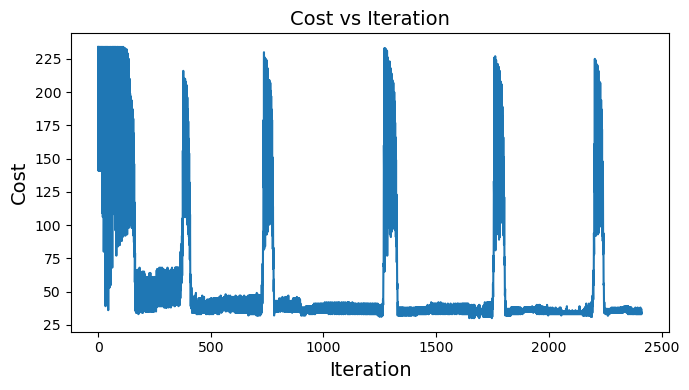

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 66.  12.]
 [  4. 106.]]
Accuracy: 91.48936170212765
Precision: 96.36363636363636
Recall: 84.61538461538461



Threshold taken as 0.4
Confusion Matrix
[[ 66.  12.]
 [  4. 106.]]
Accuracy: 91.48936170212765
Precision: 96.36363636363636
Recall: 84.61538461538461



Threshold taken as 0.5
Confusion Matrix
[[ 66.  12.]
 [  4. 106.]]
Accuracy: 91.48936170212765
Precision: 96.36363636363636
Recall: 84.61538461538461



Threshold taken as 0.6
Confusion Matrix
[[ 66.  12.]
 [  4. 106.]]
Accuracy: 91.48936170212765
Precision: 96.36363636363636
Recall: 84.61538461538461



Threshold taken as 0.7
Confusion Matrix
[[ 66.  12.]
 [  4. 106.]]
Accuracy: 91.48936170212765
Precision: 96.36363636363636
Recall: 84.61538461538461





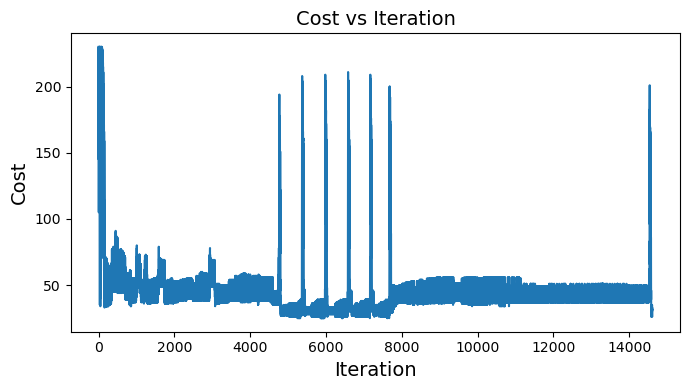

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 59.   7.]
 [  7. 115.]]
Accuracy: 92.5531914893617
Precision: 94.26229508196722
Recall: 89.39393939393939



Threshold taken as 0.4
Confusion Matrix
[[ 59.   7.]
 [  7. 115.]]
Accuracy: 92.5531914893617
Precision: 94.26229508196722
Recall: 89.39393939393939



Threshold taken as 0.5
Confusion Matrix
[[ 59.   7.]
 [  7. 115.]]
Accuracy: 92.5531914893617
Precision: 94.26229508196722
Recall: 89.39393939393939



Threshold taken as 0.6
Confusion Matrix
[[ 59.   7.]
 [  7. 115.]]
Accuracy: 92.5531914893617
Precision: 94.26229508196722
Recall: 89.39393939393939



Threshold taken as 0.7
Confusion Matrix
[[ 59.   7.]
 [  7. 115.]]
Accuracy: 92.5531914893617
Precision: 94.26229508196722
Recall: 89.39393939393939





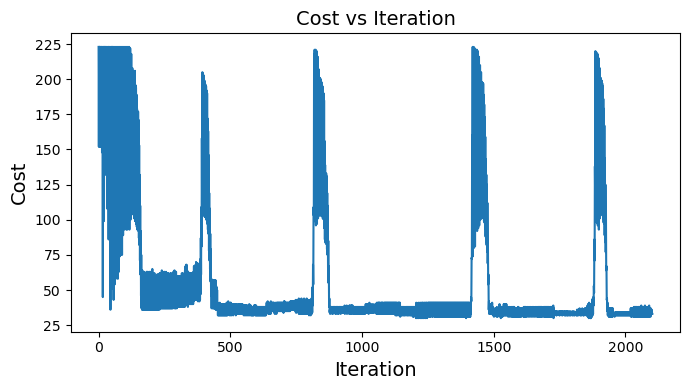

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 50.   6.]
 [  9. 123.]]
Accuracy: 92.02127659574468
Precision: 93.18181818181817
Recall: 89.28571428571429



Threshold taken as 0.4
Confusion Matrix
[[ 50.   6.]
 [  9. 123.]]
Accuracy: 92.02127659574468
Precision: 93.18181818181817
Recall: 89.28571428571429



Threshold taken as 0.5
Confusion Matrix
[[ 50.   6.]
 [  9. 123.]]
Accuracy: 92.02127659574468
Precision: 93.18181818181817
Recall: 89.28571428571429



Threshold taken as 0.6
Confusion Matrix
[[ 50.   6.]
 [  9. 123.]]
Accuracy: 92.02127659574468
Precision: 93.18181818181817
Recall: 89.28571428571429



Threshold taken as 0.7
Confusion Matrix
[[ 50.   6.]
 [  9. 123.]]
Accuracy: 92.02127659574468
Precision: 93.18181818181817
Recall: 89.28571428571429





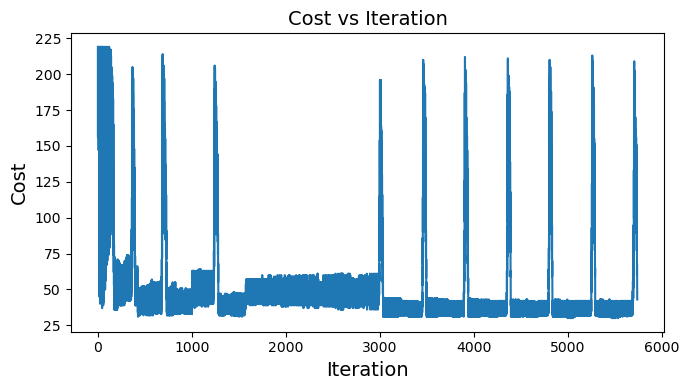

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 51.   8.]
 [  4. 125.]]
Accuracy: 93.61702127659575
Precision: 96.89922480620154
Recall: 86.4406779661017



Threshold taken as 0.4
Confusion Matrix
[[ 51.   8.]
 [  4. 125.]]
Accuracy: 93.61702127659575
Precision: 96.89922480620154
Recall: 86.4406779661017



Threshold taken as 0.5
Confusion Matrix
[[ 51.   8.]
 [  4. 125.]]
Accuracy: 93.61702127659575
Precision: 96.89922480620154
Recall: 86.4406779661017



Threshold taken as 0.6
Confusion Matrix
[[ 51.   8.]
 [  4. 125.]]
Accuracy: 93.61702127659575
Precision: 96.89922480620154
Recall: 86.4406779661017



Threshold taken as 0.7
Confusion Matrix
[[ 51.   8.]
 [  4. 125.]]
Accuracy: 93.61702127659575
Precision: 96.89922480620154
Recall: 86.4406779661017





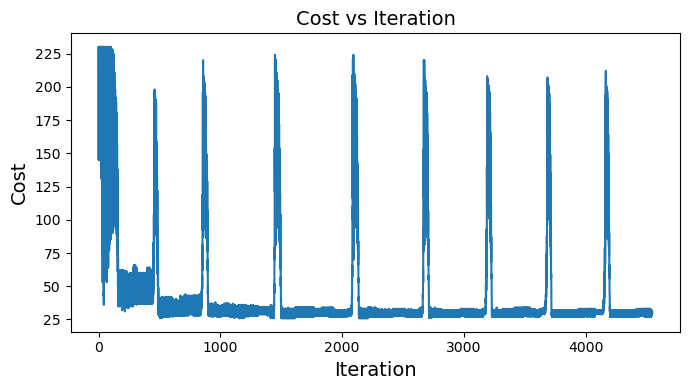

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 56.   6.]
 [ 10. 116.]]
Accuracy: 91.48936170212765
Precision: 92.06349206349206
Recall: 90.32258064516128



Threshold taken as 0.4
Confusion Matrix
[[ 56.   6.]
 [ 10. 116.]]
Accuracy: 91.48936170212765
Precision: 92.06349206349206
Recall: 90.32258064516128



Threshold taken as 0.5
Confusion Matrix
[[ 56.   6.]
 [ 10. 116.]]
Accuracy: 91.48936170212765
Precision: 92.06349206349206
Recall: 90.32258064516128



Threshold taken as 0.6
Confusion Matrix
[[ 56.   6.]
 [ 10. 116.]]
Accuracy: 91.48936170212765
Precision: 92.06349206349206
Recall: 90.32258064516128



Threshold taken as 0.7
Confusion Matrix
[[ 56.   6.]
 [ 10. 116.]]
Accuracy: 91.48936170212765
Precision: 92.06349206349206
Recall: 90.32258064516128



Accuracy:
 Mean = 92.23404255319149  Standard Deviation = 0.796097316334885
Precision:
 Mean = 94.55409329942306  Standard Deviation = 1.8409490813086877
Recall:
 Mean = 88.01165938126026  Standard Deviation = 2.13901547040

In [16]:
# BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.01
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,1)
    
    # Plot Graph
    plt.figure(figsize = (7,4))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

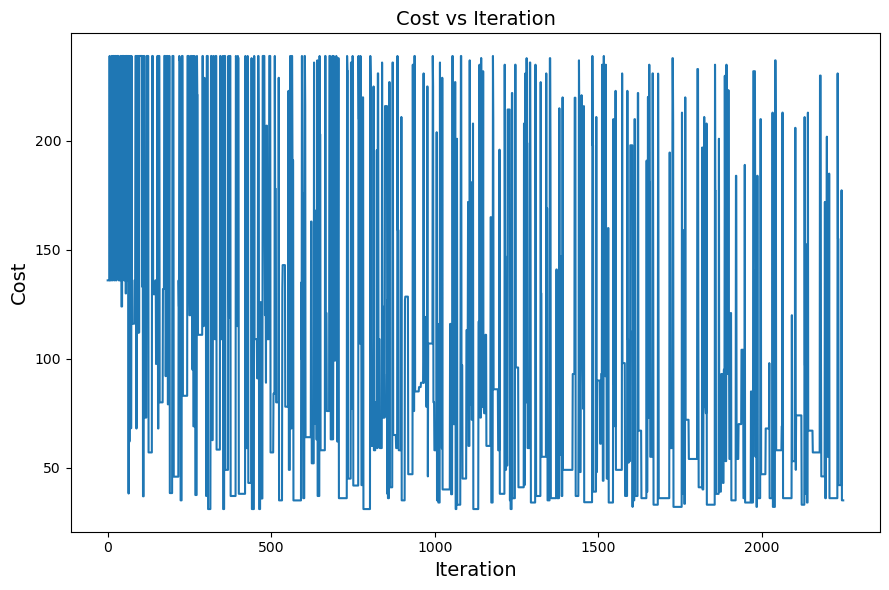

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 65.   6.]
 [ 10. 107.]]
Accuracy: 91.48936170212765
Precision: 91.45299145299145
Recall: 91.54929577464789



Threshold taken as 0.4
Confusion Matrix
[[ 65.   6.]
 [ 10. 107.]]
Accuracy: 91.48936170212765
Precision: 91.45299145299145
Recall: 91.54929577464789



Threshold taken as 0.5
Confusion Matrix
[[ 65.   6.]
 [ 10. 107.]]
Accuracy: 91.48936170212765
Precision: 91.45299145299145
Recall: 91.54929577464789



Threshold taken as 0.6
Confusion Matrix
[[ 65.   6.]
 [ 10. 107.]]
Accuracy: 91.48936170212765
Precision: 91.45299145299145
Recall: 91.54929577464789



Threshold taken as 0.7
Confusion Matrix
[[ 65.   6.]
 [ 10. 107.]]
Accuracy: 91.48936170212765
Precision: 91.45299145299145
Recall: 91.54929577464789





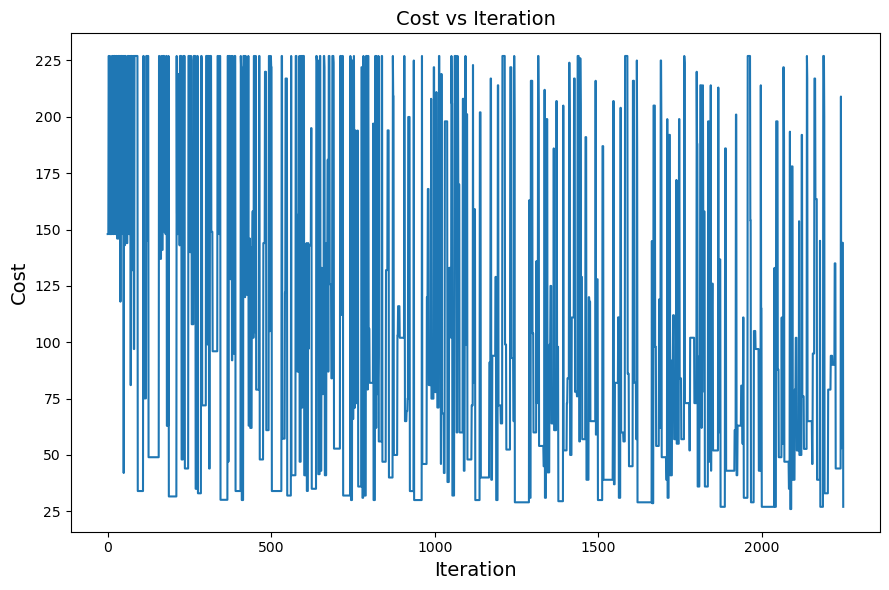

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 52.   8.]
 [ 11. 117.]]
Accuracy: 89.8936170212766
Precision: 91.40625
Recall: 86.66666666666667



Threshold taken as 0.4
Confusion Matrix
[[ 52.   8.]
 [ 11. 117.]]
Accuracy: 89.8936170212766
Precision: 91.40625
Recall: 86.66666666666667



Threshold taken as 0.5
Confusion Matrix
[[ 52.   8.]
 [ 11. 117.]]
Accuracy: 89.8936170212766
Precision: 91.40625
Recall: 86.66666666666667



Threshold taken as 0.6
Confusion Matrix
[[ 52.   8.]
 [ 11. 117.]]
Accuracy: 89.8936170212766
Precision: 91.40625
Recall: 86.66666666666667



Threshold taken as 0.7
Confusion Matrix
[[ 52.   8.]
 [ 11. 117.]]
Accuracy: 89.8936170212766
Precision: 91.40625
Recall: 86.66666666666667





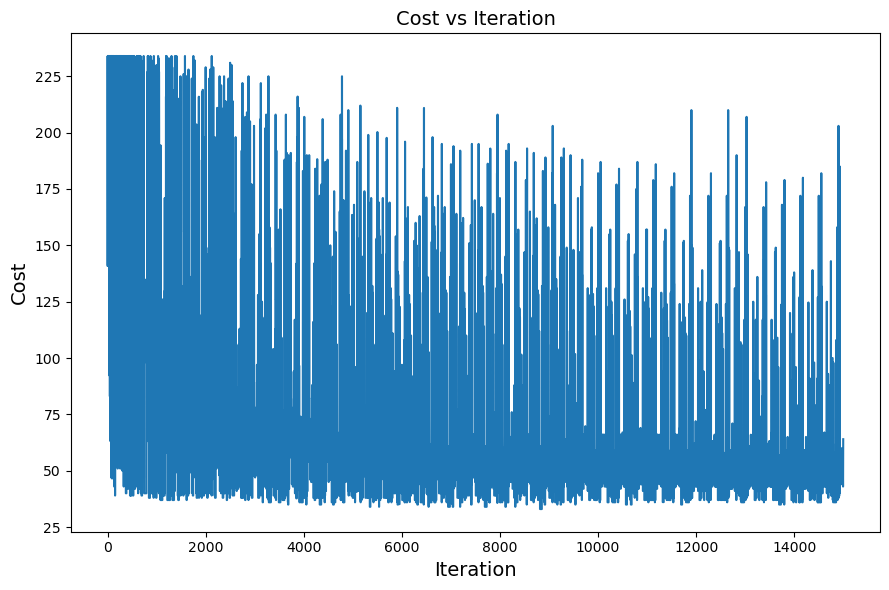

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 41.   0.]
 [ 29. 118.]]
Accuracy: 84.57446808510637
Precision: 80.27210884353741
Recall: 100.0



Threshold taken as 0.4
Confusion Matrix
[[ 41.   0.]
 [ 29. 118.]]
Accuracy: 84.57446808510637
Precision: 80.27210884353741
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 41.   0.]
 [ 29. 118.]]
Accuracy: 84.57446808510637
Precision: 80.27210884353741
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 41.   0.]
 [ 29. 118.]]
Accuracy: 84.57446808510637
Precision: 80.27210884353741
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 41.   0.]
 [ 29. 118.]]
Accuracy: 84.57446808510637
Precision: 80.27210884353741
Recall: 100.0





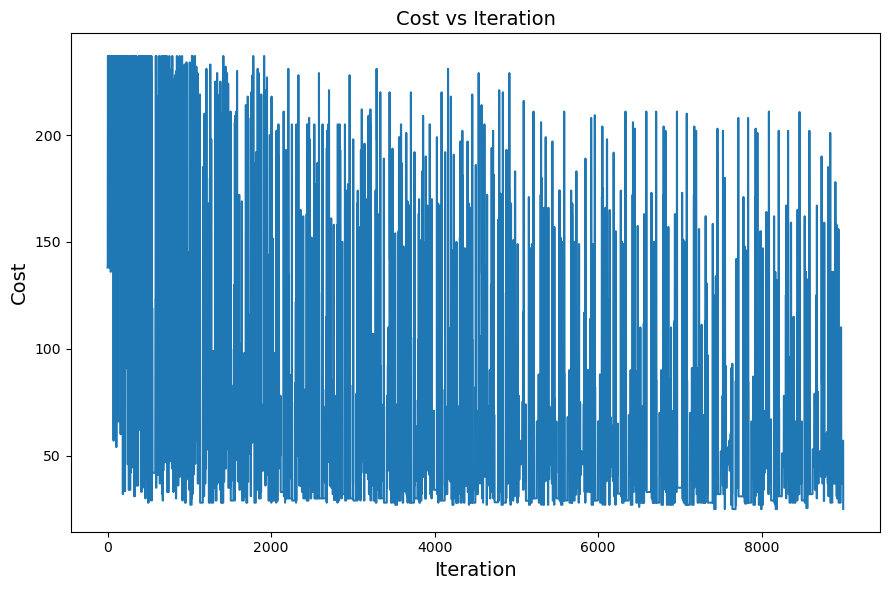

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 62.   6.]
 [ 11. 109.]]
Accuracy: 90.95744680851064
Precision: 90.83333333333333
Recall: 91.17647058823529



Threshold taken as 0.4
Confusion Matrix
[[ 62.   6.]
 [ 11. 109.]]
Accuracy: 90.95744680851064
Precision: 90.83333333333333
Recall: 91.17647058823529



Threshold taken as 0.5
Confusion Matrix
[[ 62.   6.]
 [ 11. 109.]]
Accuracy: 90.95744680851064
Precision: 90.83333333333333
Recall: 91.17647058823529



Threshold taken as 0.6
Confusion Matrix
[[ 62.   6.]
 [ 11. 109.]]
Accuracy: 90.95744680851064
Precision: 90.83333333333333
Recall: 91.17647058823529



Threshold taken as 0.7
Confusion Matrix
[[ 62.   6.]
 [ 11. 109.]]
Accuracy: 90.95744680851064
Precision: 90.83333333333333
Recall: 91.17647058823529





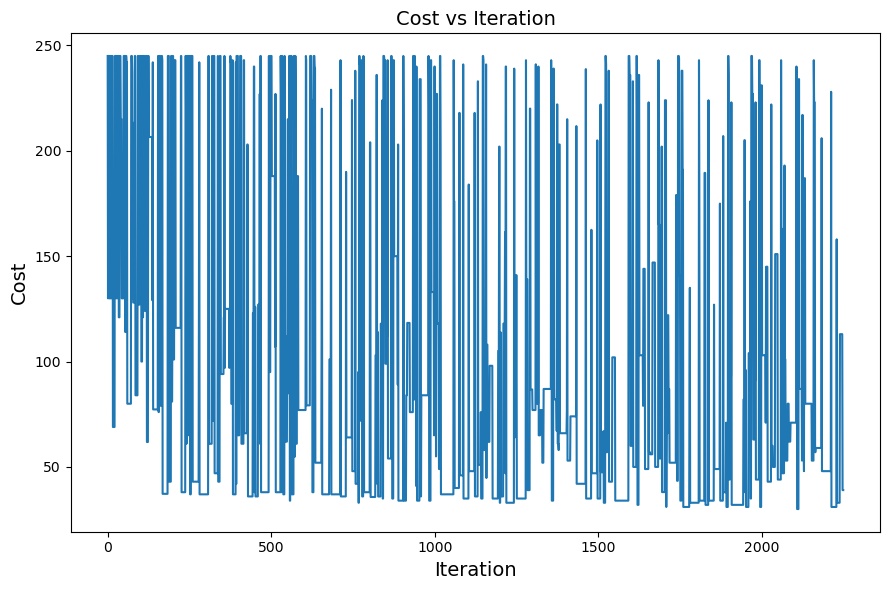

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 59.   0.]
 [ 22. 107.]]
Accuracy: 88.29787234042553
Precision: 82.94573643410853
Recall: 100.0



Threshold taken as 0.4
Confusion Matrix
[[ 59.   0.]
 [ 22. 107.]]
Accuracy: 88.29787234042553
Precision: 82.94573643410853
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 59.   0.]
 [ 22. 107.]]
Accuracy: 88.29787234042553
Precision: 82.94573643410853
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 59.   0.]
 [ 22. 107.]]
Accuracy: 88.29787234042553
Precision: 82.94573643410853
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 59.   0.]
 [ 22. 107.]]
Accuracy: 88.29787234042553
Precision: 82.94573643410853
Recall: 100.0



Accuracy:
 Mean = 89.04255319148936  Standard Deviation = 2.485813073520837
Precision:
 Mean = 87.38208401279414  Standard Deviation = 4.793959697329913
Recall:
 Mean = 93.87848660590997  Standard Deviation = 5.2854937289210815


In [171]:
# STOCHASTIC GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.01
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_stochastic(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,1)
    
    #Plot Graph
    #print(f"{error}")
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1
        
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

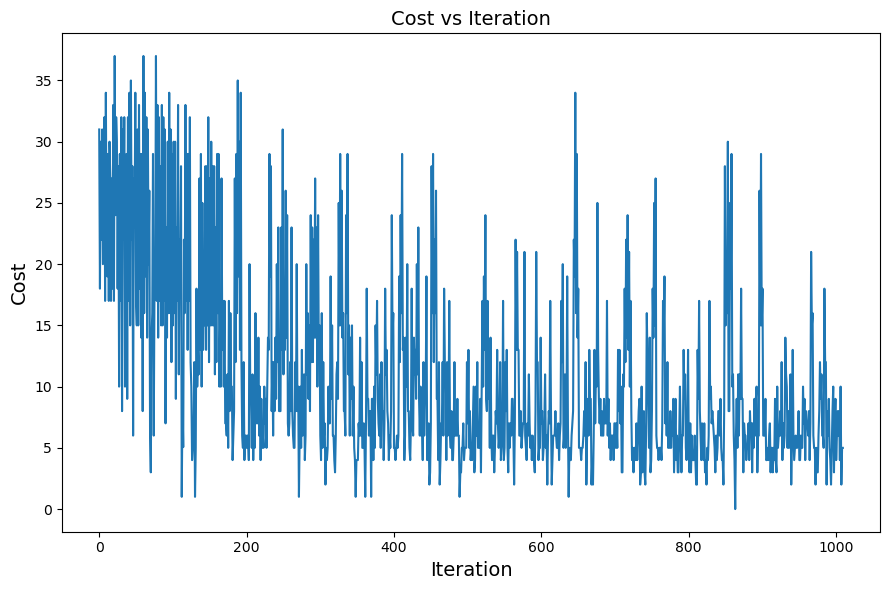

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 58.   3.]
 [ 11. 116.]]
Accuracy: 92.5531914893617
Precision: 91.33858267716536
Recall: 95.08196721311475



Threshold taken as 0.4
Confusion Matrix
[[ 58.   3.]
 [ 11. 116.]]
Accuracy: 92.5531914893617
Precision: 91.33858267716536
Recall: 95.08196721311475



Threshold taken as 0.5
Confusion Matrix
[[ 58.   3.]
 [ 11. 116.]]
Accuracy: 92.5531914893617
Precision: 91.33858267716536
Recall: 95.08196721311475



Threshold taken as 0.6
Confusion Matrix
[[ 58.   3.]
 [ 11. 116.]]
Accuracy: 92.5531914893617
Precision: 91.33858267716536
Recall: 95.08196721311475



Threshold taken as 0.7
Confusion Matrix
[[ 58.   3.]
 [ 11. 116.]]
Accuracy: 92.5531914893617
Precision: 91.33858267716536
Recall: 95.08196721311475





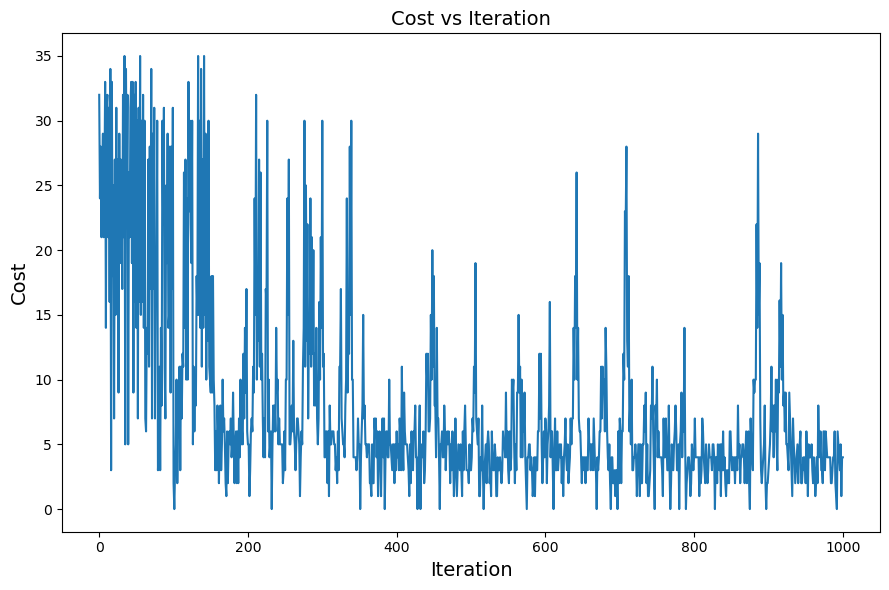

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[65. 30.]
 [ 1. 92.]]
Accuracy: 83.51063829787235
Precision: 98.9247311827957
Recall: 68.42105263157895



Threshold taken as 0.4
Confusion Matrix
[[65. 30.]
 [ 1. 92.]]
Accuracy: 83.51063829787235
Precision: 98.9247311827957
Recall: 68.42105263157895



Threshold taken as 0.5
Confusion Matrix
[[65. 30.]
 [ 1. 92.]]
Accuracy: 83.51063829787235
Precision: 98.9247311827957
Recall: 68.42105263157895



Threshold taken as 0.6
Confusion Matrix
[[65. 30.]
 [ 1. 92.]]
Accuracy: 83.51063829787235
Precision: 98.9247311827957
Recall: 68.42105263157895



Threshold taken as 0.7
Confusion Matrix
[[65. 30.]
 [ 1. 92.]]
Accuracy: 83.51063829787235
Precision: 98.9247311827957
Recall: 68.42105263157895





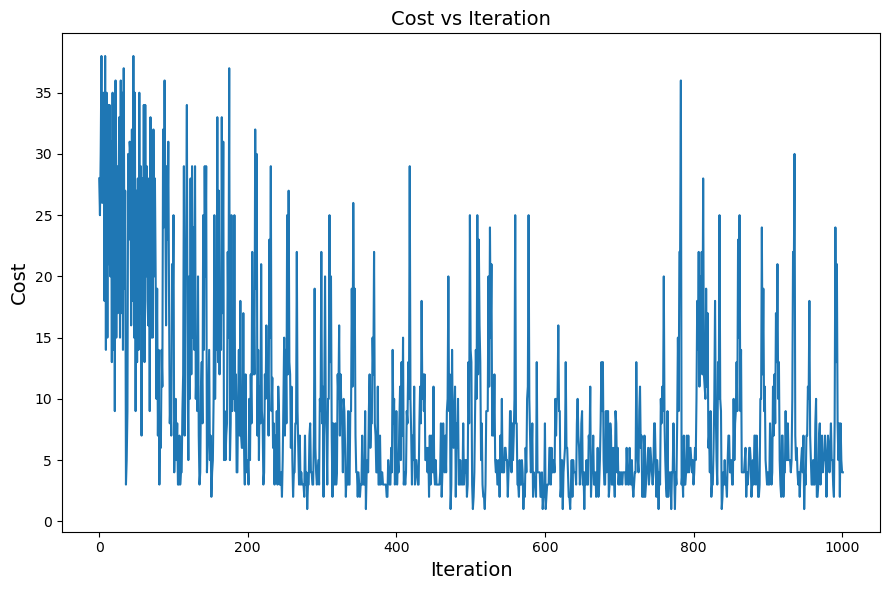

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 61.   4.]
 [ 11. 112.]]
Accuracy: 92.02127659574468
Precision: 91.05691056910568
Recall: 93.84615384615384



Threshold taken as 0.4
Confusion Matrix
[[ 61.   4.]
 [ 11. 112.]]
Accuracy: 92.02127659574468
Precision: 91.05691056910568
Recall: 93.84615384615384



Threshold taken as 0.5
Confusion Matrix
[[ 61.   4.]
 [ 11. 112.]]
Accuracy: 92.02127659574468
Precision: 91.05691056910568
Recall: 93.84615384615384



Threshold taken as 0.6
Confusion Matrix
[[ 61.   4.]
 [ 11. 112.]]
Accuracy: 92.02127659574468
Precision: 91.05691056910568
Recall: 93.84615384615384



Threshold taken as 0.7
Confusion Matrix
[[ 61.   4.]
 [ 11. 112.]]
Accuracy: 92.02127659574468
Precision: 91.05691056910568
Recall: 93.84615384615384





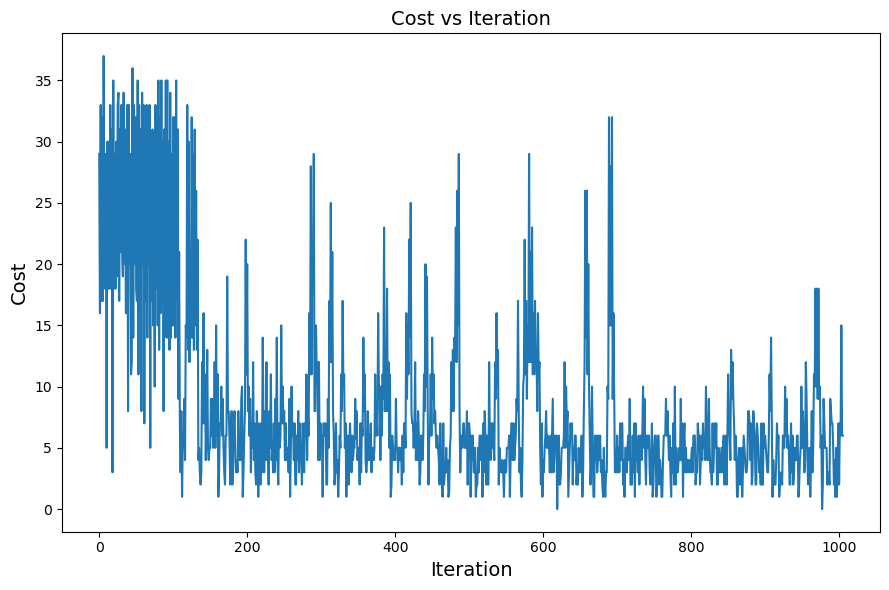

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 48.   0.]
 [ 25. 115.]]
Accuracy: 86.70212765957447
Precision: 82.14285714285714
Recall: 100.0



Threshold taken as 0.4
Confusion Matrix
[[ 48.   0.]
 [ 25. 115.]]
Accuracy: 86.70212765957447
Precision: 82.14285714285714
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 48.   0.]
 [ 25. 115.]]
Accuracy: 86.70212765957447
Precision: 82.14285714285714
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 48.   0.]
 [ 25. 115.]]
Accuracy: 86.70212765957447
Precision: 82.14285714285714
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 48.   0.]
 [ 25. 115.]]
Accuracy: 86.70212765957447
Precision: 82.14285714285714
Recall: 100.0





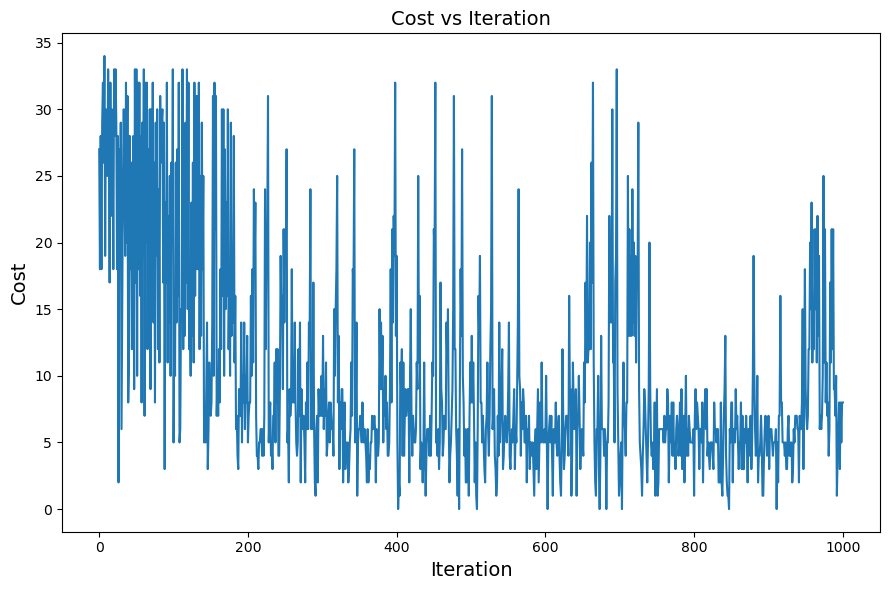

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 56.   5.]
 [  8. 119.]]
Accuracy: 93.08510638297872
Precision: 93.7007874015748
Recall: 91.80327868852459



Threshold taken as 0.4
Confusion Matrix
[[ 56.   5.]
 [  8. 119.]]
Accuracy: 93.08510638297872
Precision: 93.7007874015748
Recall: 91.80327868852459



Threshold taken as 0.5
Confusion Matrix
[[ 56.   5.]
 [  8. 119.]]
Accuracy: 93.08510638297872
Precision: 93.7007874015748
Recall: 91.80327868852459



Threshold taken as 0.6
Confusion Matrix
[[ 56.   5.]
 [  8. 119.]]
Accuracy: 93.08510638297872
Precision: 93.7007874015748
Recall: 91.80327868852459



Threshold taken as 0.7
Confusion Matrix
[[ 56.   5.]
 [  8. 119.]]
Accuracy: 93.08510638297872
Precision: 93.7007874015748
Recall: 91.80327868852459



Accuracy:
 Mean = 89.57446808510639  Standard Deviation = 3.800121510530156
Precision:
 Mean = 91.43277379469974  Standard Deviation = 5.435549792894455
Recall:
 Mean = 89.83049047587443  Standard Deviation = 11.039731938115018


In [117]:
# MINI BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.01
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_mini_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,50,max_error,1)

    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold ==0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold +=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

## LR 1 with Learning Rate = 0.001 all 3 models and all 5 thresholds

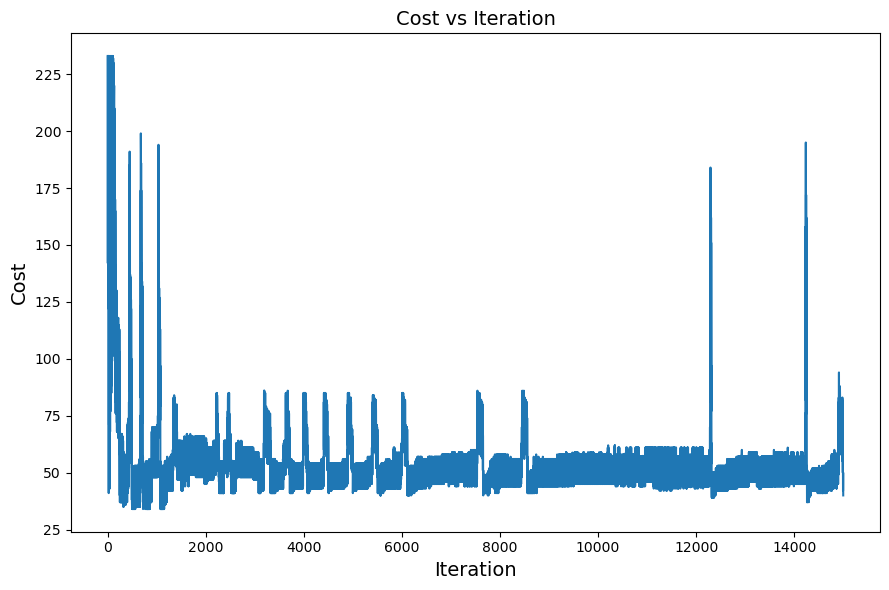

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 67.  19.]
 [  2. 100.]]
Accuracy: 88.82978723404256
Precision: 98.0392156862745
Recall: 77.90697674418605



Threshold taken as 0.4
Confusion Matrix
[[ 67.  19.]
 [  2. 100.]]
Accuracy: 88.82978723404256
Precision: 98.0392156862745
Recall: 77.90697674418605



Threshold taken as 0.5
Confusion Matrix
[[ 67.  19.]
 [  2. 100.]]
Accuracy: 88.82978723404256
Precision: 98.0392156862745
Recall: 77.90697674418605



Threshold taken as 0.6
Confusion Matrix
[[ 67.  19.]
 [  2. 100.]]
Accuracy: 88.82978723404256
Precision: 98.0392156862745
Recall: 77.90697674418605



Threshold taken as 0.7
Confusion Matrix
[[ 67.  19.]
 [  2. 100.]]
Accuracy: 88.82978723404256
Precision: 98.0392156862745
Recall: 77.90697674418605





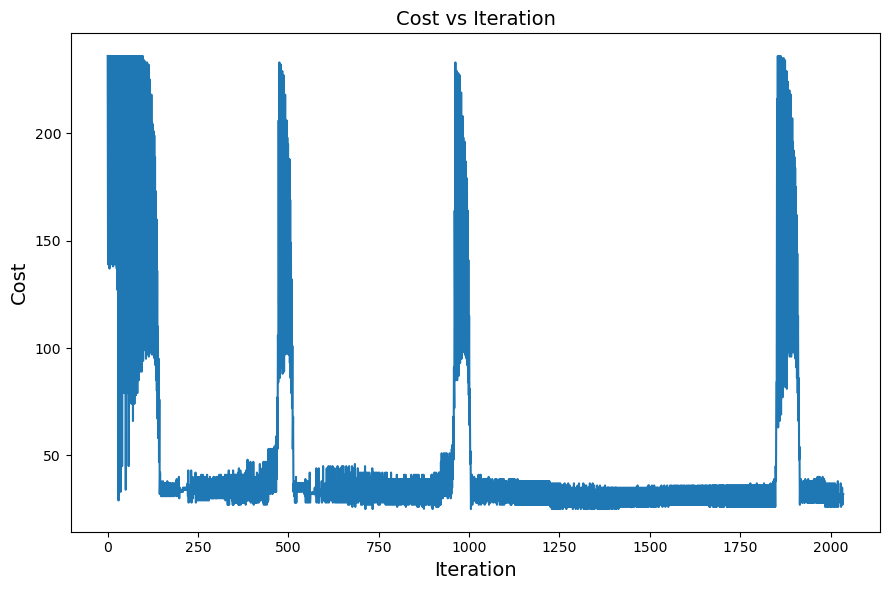

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 65.  12.]
 [  7. 104.]]
Accuracy: 89.8936170212766
Precision: 93.69369369369369
Recall: 84.4155844155844



Threshold taken as 0.4
Confusion Matrix
[[ 65.  12.]
 [  7. 104.]]
Accuracy: 89.8936170212766
Precision: 93.69369369369369
Recall: 84.4155844155844



Threshold taken as 0.5
Confusion Matrix
[[ 65.  12.]
 [  7. 104.]]
Accuracy: 89.8936170212766
Precision: 93.69369369369369
Recall: 84.4155844155844



Threshold taken as 0.6
Confusion Matrix
[[ 65.  12.]
 [  7. 104.]]
Accuracy: 89.8936170212766
Precision: 93.69369369369369
Recall: 84.4155844155844



Threshold taken as 0.7
Confusion Matrix
[[ 65.  12.]
 [  7. 104.]]
Accuracy: 89.8936170212766
Precision: 93.69369369369369
Recall: 84.4155844155844





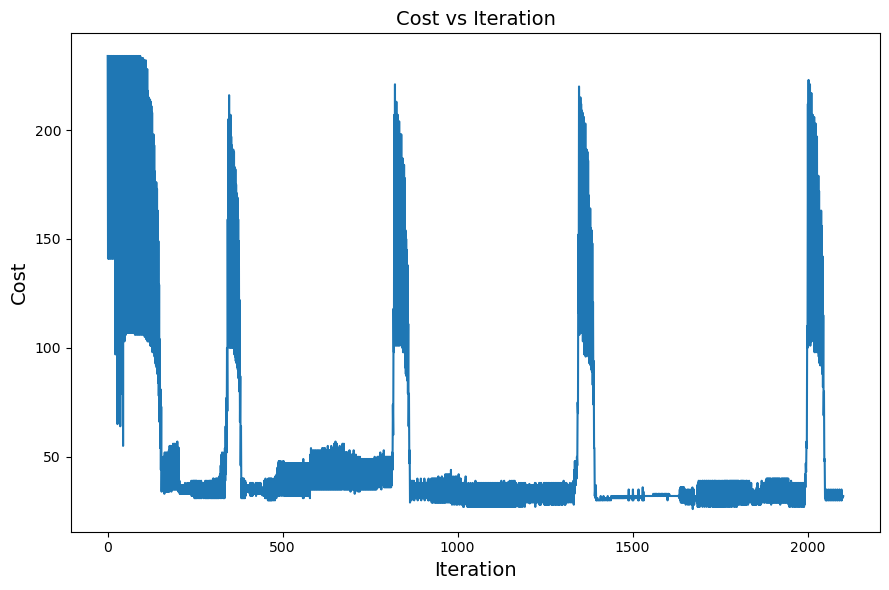

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 62.   9.]
 [  8. 109.]]
Accuracy: 90.95744680851064
Precision: 93.16239316239316
Recall: 87.32394366197182



Threshold taken as 0.4
Confusion Matrix
[[ 62.   9.]
 [  8. 109.]]
Accuracy: 90.95744680851064
Precision: 93.16239316239316
Recall: 87.32394366197182



Threshold taken as 0.5
Confusion Matrix
[[ 62.   9.]
 [  8. 109.]]
Accuracy: 90.95744680851064
Precision: 93.16239316239316
Recall: 87.32394366197182



Threshold taken as 0.6
Confusion Matrix
[[ 62.   9.]
 [  8. 109.]]
Accuracy: 90.95744680851064
Precision: 93.16239316239316
Recall: 87.32394366197182



Threshold taken as 0.7
Confusion Matrix
[[ 62.   9.]
 [  8. 109.]]
Accuracy: 90.95744680851064
Precision: 93.16239316239316
Recall: 87.32394366197182





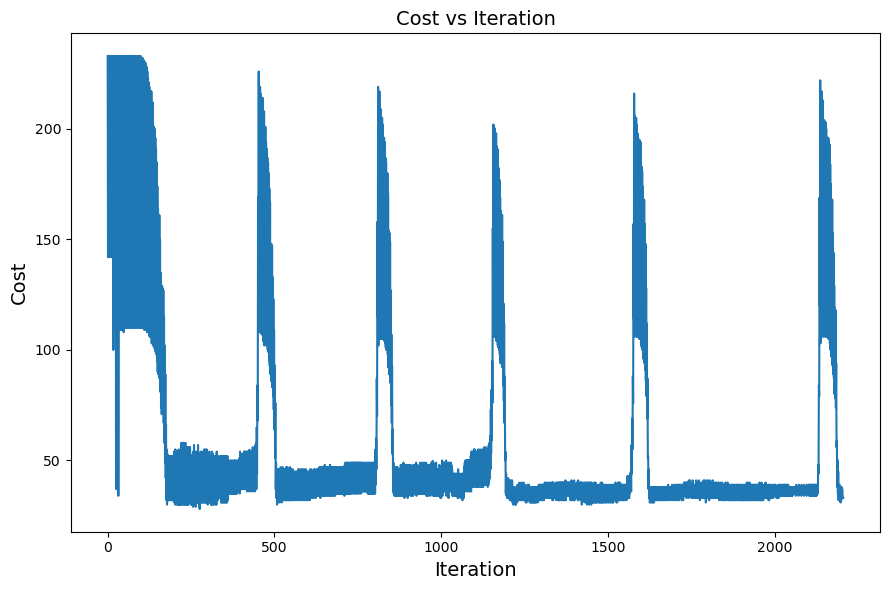

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 62.   8.]
 [  7. 111.]]
Accuracy: 92.02127659574468
Precision: 94.0677966101695
Recall: 88.57142857142857



Threshold taken as 0.4
Confusion Matrix
[[ 62.   8.]
 [  7. 111.]]
Accuracy: 92.02127659574468
Precision: 94.0677966101695
Recall: 88.57142857142857



Threshold taken as 0.5
Confusion Matrix
[[ 62.   8.]
 [  7. 111.]]
Accuracy: 92.02127659574468
Precision: 94.0677966101695
Recall: 88.57142857142857



Threshold taken as 0.6
Confusion Matrix
[[ 62.   8.]
 [  7. 111.]]
Accuracy: 92.02127659574468
Precision: 94.0677966101695
Recall: 88.57142857142857



Threshold taken as 0.7
Confusion Matrix
[[ 62.   8.]
 [  7. 111.]]
Accuracy: 92.02127659574468
Precision: 94.0677966101695
Recall: 88.57142857142857





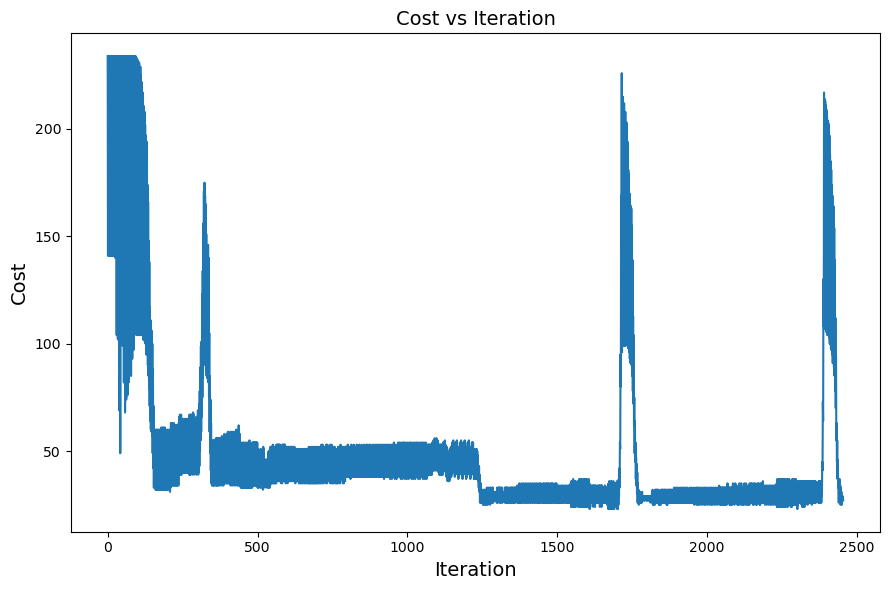

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 59.   6.]
 [ 11. 112.]]
Accuracy: 90.95744680851064
Precision: 91.05691056910568
Recall: 90.76923076923077



Threshold taken as 0.4
Confusion Matrix
[[ 59.   6.]
 [ 11. 112.]]
Accuracy: 90.95744680851064
Precision: 91.05691056910568
Recall: 90.76923076923077



Threshold taken as 0.5
Confusion Matrix
[[ 59.   6.]
 [ 11. 112.]]
Accuracy: 90.95744680851064
Precision: 91.05691056910568
Recall: 90.76923076923077



Threshold taken as 0.6
Confusion Matrix
[[ 59.   6.]
 [ 11. 112.]]
Accuracy: 90.95744680851064
Precision: 91.05691056910568
Recall: 90.76923076923077



Threshold taken as 0.7
Confusion Matrix
[[ 59.   6.]
 [ 11. 112.]]
Accuracy: 90.95744680851064
Precision: 91.05691056910568
Recall: 90.76923076923077



Accuracy:
 Mean = 90.53191489361703  Standard Deviation = 1.0848977688495278
Precision:
 Mean = 94.00400194432731  Standard Deviation = 2.2705490009570406
Recall:
 Mean = 85.79743283248033  Standard Deviation = 4.4477604414

In [107]:
# BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,1)
    
    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

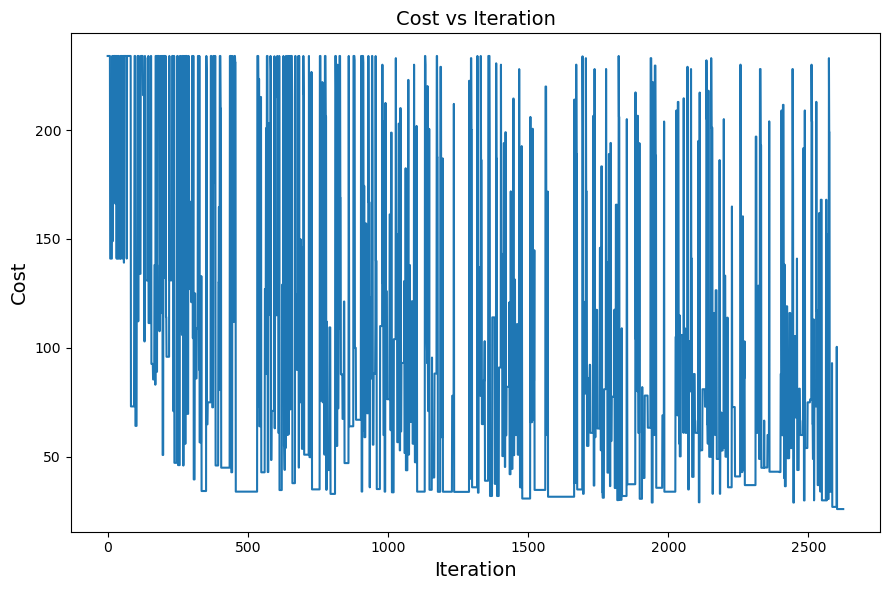

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 57.   7.]
 [ 13. 111.]]
Accuracy: 89.36170212765957
Precision: 89.51612903225806
Recall: 89.0625



Threshold taken as 0.4
Confusion Matrix
[[ 57.   7.]
 [ 13. 111.]]
Accuracy: 89.36170212765957
Precision: 89.51612903225806
Recall: 89.0625



Threshold taken as 0.5
Confusion Matrix
[[ 57.   7.]
 [ 13. 111.]]
Accuracy: 89.36170212765957
Precision: 89.51612903225806
Recall: 89.0625



Threshold taken as 0.6
Confusion Matrix
[[ 57.   7.]
 [ 13. 111.]]
Accuracy: 89.36170212765957
Precision: 89.51612903225806
Recall: 89.0625



Threshold taken as 0.7
Confusion Matrix
[[ 57.   7.]
 [ 13. 111.]]
Accuracy: 89.36170212765957
Precision: 89.51612903225806
Recall: 89.0625





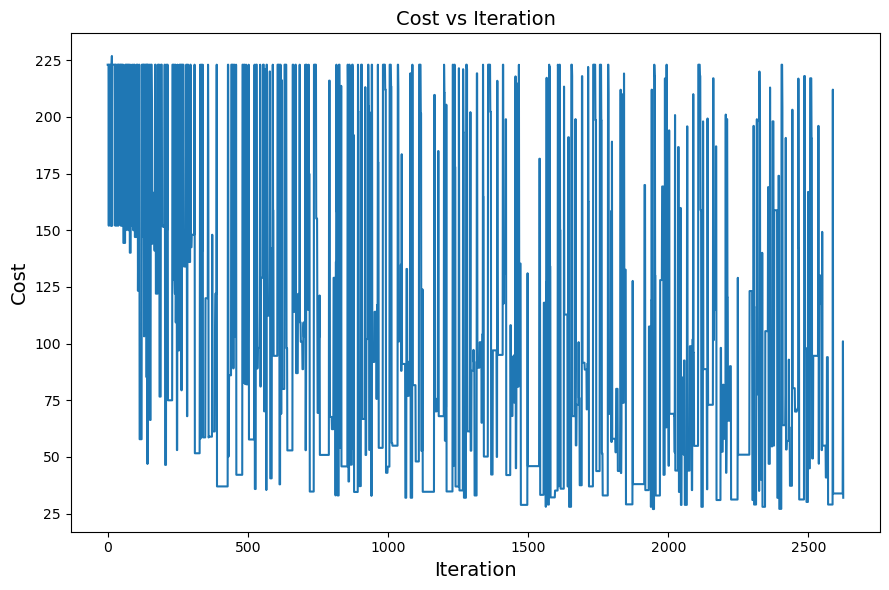

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 47.   4.]
 [ 12. 125.]]
Accuracy: 91.48936170212765
Precision: 91.24087591240875
Recall: 92.15686274509804



Threshold taken as 0.4
Confusion Matrix
[[ 47.   4.]
 [ 12. 125.]]
Accuracy: 91.48936170212765
Precision: 91.24087591240875
Recall: 92.15686274509804



Threshold taken as 0.5
Confusion Matrix
[[ 47.   4.]
 [ 12. 125.]]
Accuracy: 91.48936170212765
Precision: 91.24087591240875
Recall: 92.15686274509804



Threshold taken as 0.6
Confusion Matrix
[[ 47.   4.]
 [ 12. 125.]]
Accuracy: 91.48936170212765
Precision: 91.24087591240875
Recall: 92.15686274509804



Threshold taken as 0.7
Confusion Matrix
[[ 47.   4.]
 [ 12. 125.]]
Accuracy: 91.48936170212765
Precision: 91.24087591240875
Recall: 92.15686274509804





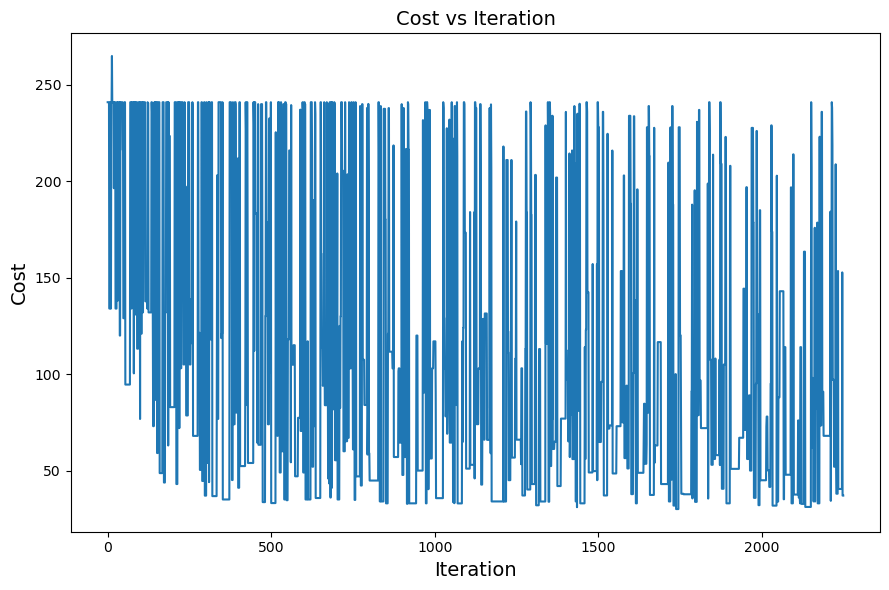

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 62.   1.]
 [ 15. 110.]]
Accuracy: 91.48936170212765
Precision: 88.0
Recall: 98.4126984126984



Threshold taken as 0.4
Confusion Matrix
[[ 62.   1.]
 [ 15. 110.]]
Accuracy: 91.48936170212765
Precision: 88.0
Recall: 98.4126984126984



Threshold taken as 0.5
Confusion Matrix
[[ 62.   1.]
 [ 15. 110.]]
Accuracy: 91.48936170212765
Precision: 88.0
Recall: 98.4126984126984



Threshold taken as 0.6
Confusion Matrix
[[ 62.   1.]
 [ 15. 110.]]
Accuracy: 91.48936170212765
Precision: 88.0
Recall: 98.4126984126984



Threshold taken as 0.7
Confusion Matrix
[[ 61.   1.]
 [ 16. 110.]]
Accuracy: 90.95744680851064
Precision: 87.3015873015873
Recall: 98.38709677419355





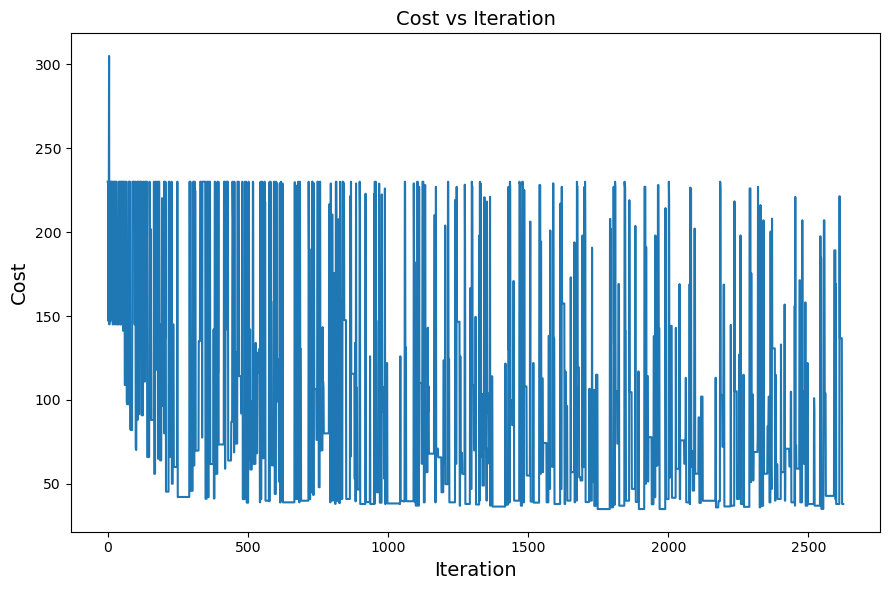

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 56.   3.]
 [ 10. 119.]]
Accuracy: 93.08510638297872
Precision: 92.24806201550388
Recall: 94.91525423728814



Threshold taken as 0.4
Confusion Matrix
[[ 56.   3.]
 [ 10. 119.]]
Accuracy: 93.08510638297872
Precision: 92.24806201550388
Recall: 94.91525423728814



Threshold taken as 0.5
Confusion Matrix
[[ 55.   3.]
 [ 11. 119.]]
Accuracy: 92.5531914893617
Precision: 91.53846153846153
Recall: 94.82758620689656



Threshold taken as 0.6
Confusion Matrix
[[ 55.   3.]
 [ 11. 119.]]
Accuracy: 92.5531914893617
Precision: 91.53846153846153
Recall: 94.82758620689656



Threshold taken as 0.7
Confusion Matrix
[[ 55.   3.]
 [ 11. 119.]]
Accuracy: 92.5531914893617
Precision: 91.53846153846153
Recall: 94.82758620689656





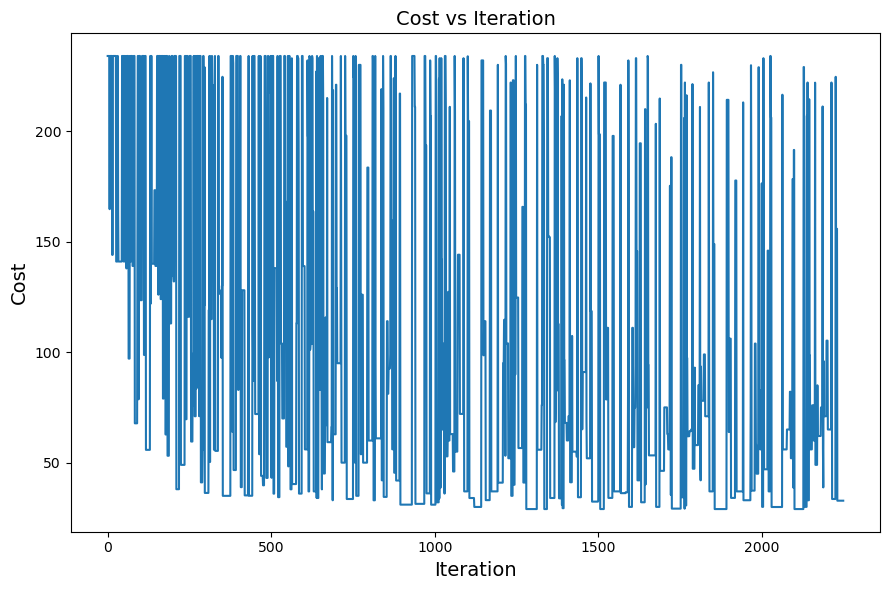

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 63.  12.]
 [  7. 106.]]
Accuracy: 89.8936170212766
Precision: 93.80530973451327
Recall: 84.0



Threshold taken as 0.4
Confusion Matrix
[[ 63.  12.]
 [  7. 106.]]
Accuracy: 89.8936170212766
Precision: 93.80530973451327
Recall: 84.0



Threshold taken as 0.5
Confusion Matrix
[[ 63.  12.]
 [  7. 106.]]
Accuracy: 89.8936170212766
Precision: 93.80530973451327
Recall: 84.0



Threshold taken as 0.6
Confusion Matrix
[[ 63.  12.]
 [  7. 106.]]
Accuracy: 89.8936170212766
Precision: 93.80530973451327
Recall: 84.0



Threshold taken as 0.7
Confusion Matrix
[[ 63.  12.]
 [  7. 106.]]
Accuracy: 89.8936170212766
Precision: 93.80530973451327
Recall: 84.0



Accuracy:
 Mean = 90.95744680851064  Standard Deviation = 1.1653671436280106
Precision:
 Mean = 90.82015524352833  Standard Deviation = 1.9625431005148217
Recall:
 Mean = 91.6919294729386  Standard Deviation = 4.92538160170837


In [160]:
# STOCHASTIC GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_stochastic(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,1)
    
    #Plot Graph
    #print(f"{error}")
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

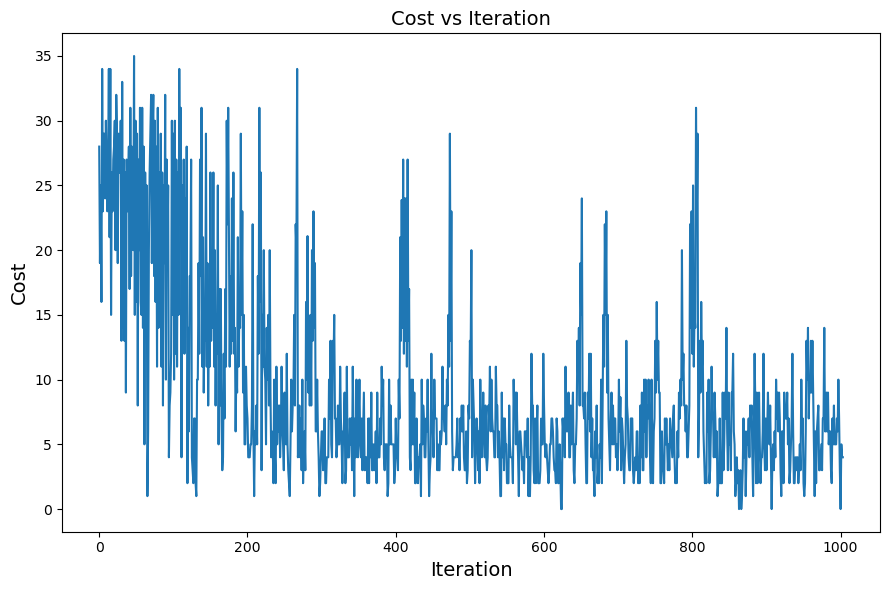

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 53.   6.]
 [ 10. 119.]]
Accuracy: 91.48936170212765
Precision: 92.24806201550388
Recall: 89.83050847457628



Threshold taken as 0.4
Confusion Matrix
[[ 53.   6.]
 [ 10. 119.]]
Accuracy: 91.48936170212765
Precision: 92.24806201550388
Recall: 89.83050847457628



Threshold taken as 0.5
Confusion Matrix
[[ 53.   6.]
 [ 10. 119.]]
Accuracy: 91.48936170212765
Precision: 92.24806201550388
Recall: 89.83050847457628



Threshold taken as 0.6
Confusion Matrix
[[ 53.   6.]
 [ 10. 119.]]
Accuracy: 91.48936170212765
Precision: 92.24806201550388
Recall: 89.83050847457628



Threshold taken as 0.7
Confusion Matrix
[[ 53.   6.]
 [ 10. 119.]]
Accuracy: 91.48936170212765
Precision: 92.24806201550388
Recall: 89.83050847457628





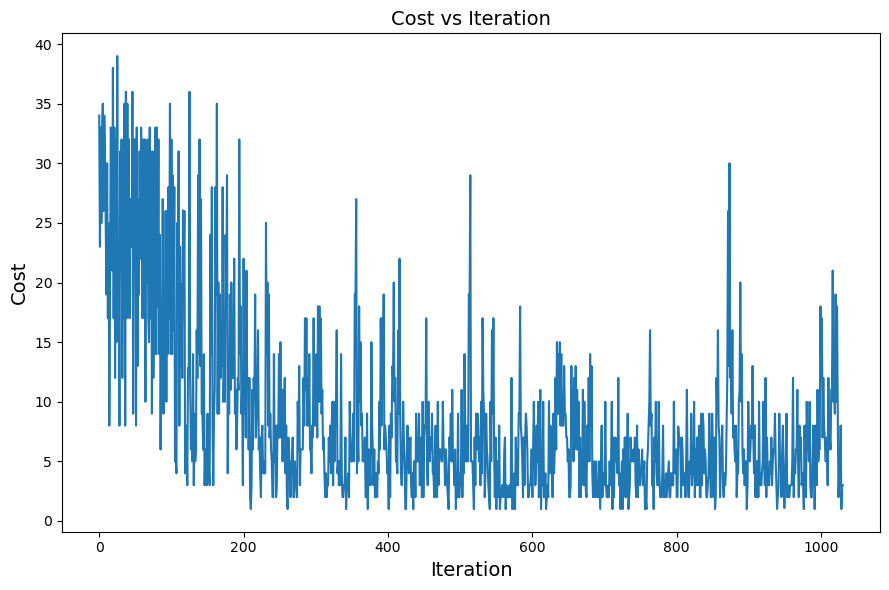

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[71. 30.]
 [ 4. 83.]]
Accuracy: 81.91489361702128
Precision: 95.40229885057471
Recall: 70.29702970297029



Threshold taken as 0.4
Confusion Matrix
[[71. 30.]
 [ 4. 83.]]
Accuracy: 81.91489361702128
Precision: 95.40229885057471
Recall: 70.29702970297029



Threshold taken as 0.5
Confusion Matrix
[[71. 30.]
 [ 4. 83.]]
Accuracy: 81.91489361702128
Precision: 95.40229885057471
Recall: 70.29702970297029



Threshold taken as 0.6
Confusion Matrix
[[71. 30.]
 [ 4. 83.]]
Accuracy: 81.91489361702128
Precision: 95.40229885057471
Recall: 70.29702970297029



Threshold taken as 0.7
Confusion Matrix
[[71. 30.]
 [ 4. 83.]]
Accuracy: 81.91489361702128
Precision: 95.40229885057471
Recall: 70.29702970297029





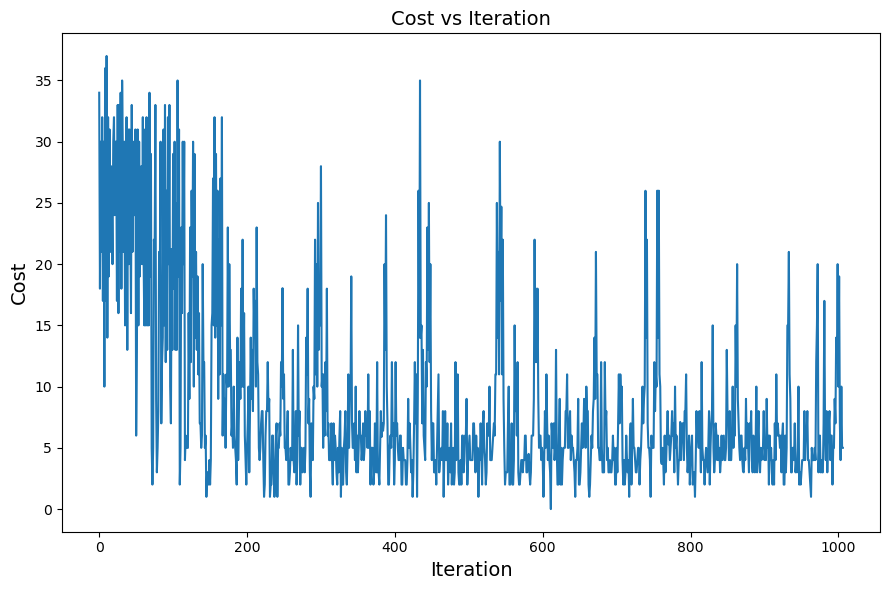

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 58.   8.]
 [ 11. 111.]]
Accuracy: 89.8936170212766
Precision: 90.98360655737704
Recall: 87.87878787878788



Threshold taken as 0.4
Confusion Matrix
[[ 58.   8.]
 [ 11. 111.]]
Accuracy: 89.8936170212766
Precision: 90.98360655737704
Recall: 87.87878787878788



Threshold taken as 0.5
Confusion Matrix
[[ 58.   8.]
 [ 11. 111.]]
Accuracy: 89.8936170212766
Precision: 90.98360655737704
Recall: 87.87878787878788



Threshold taken as 0.6
Confusion Matrix
[[ 58.   8.]
 [ 11. 111.]]
Accuracy: 89.8936170212766
Precision: 90.98360655737704
Recall: 87.87878787878788



Threshold taken as 0.7
Confusion Matrix
[[ 58.   8.]
 [ 11. 111.]]
Accuracy: 89.8936170212766
Precision: 90.98360655737704
Recall: 87.87878787878788





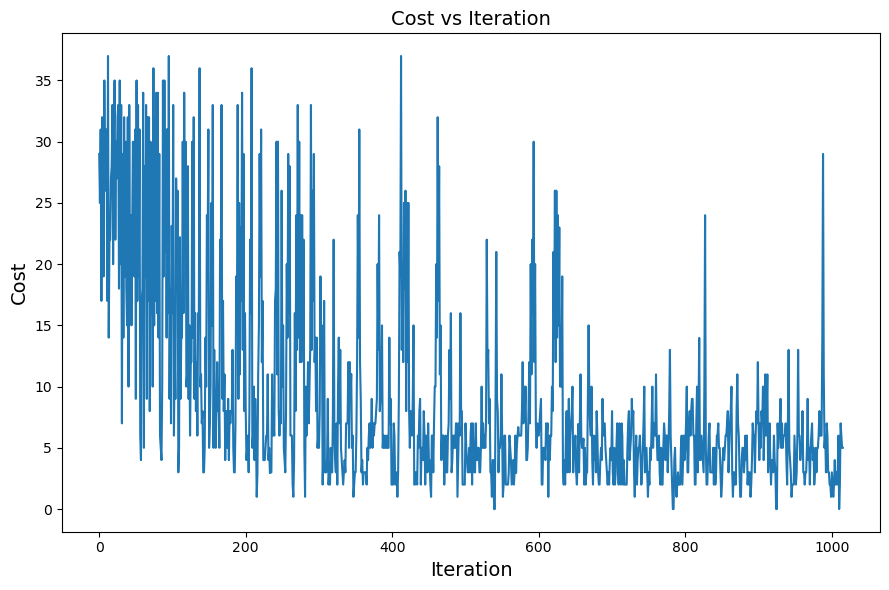

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 42.   0.]
 [ 23. 123.]]
Accuracy: 87.7659574468085
Precision: 84.24657534246576
Recall: 100.0



Threshold taken as 0.4
Confusion Matrix
[[ 42.   0.]
 [ 23. 123.]]
Accuracy: 87.7659574468085
Precision: 84.24657534246576
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 42.   0.]
 [ 23. 123.]]
Accuracy: 87.7659574468085
Precision: 84.24657534246576
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 42.   0.]
 [ 23. 123.]]
Accuracy: 87.7659574468085
Precision: 84.24657534246576
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 42.   0.]
 [ 23. 123.]]
Accuracy: 87.7659574468085
Precision: 84.24657534246576
Recall: 100.0





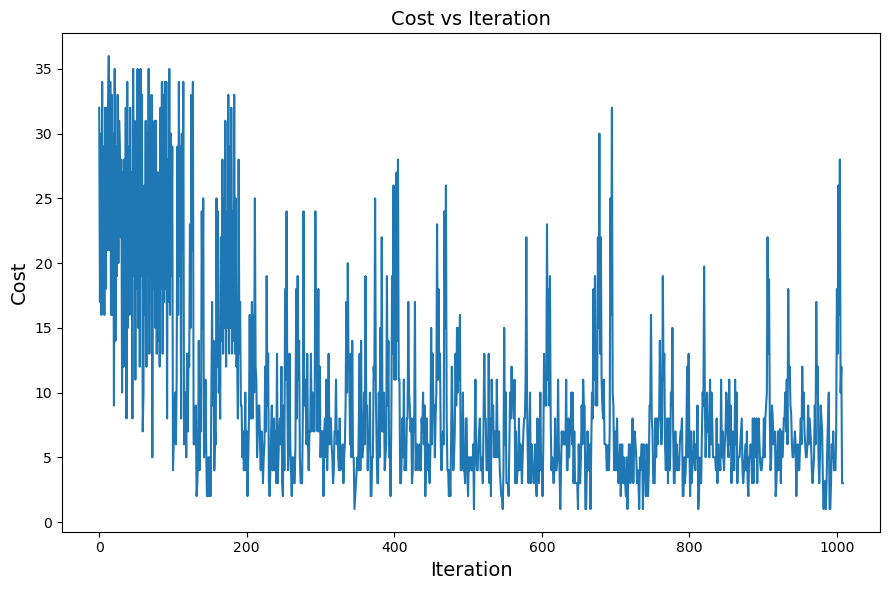

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 58.   2.]
 [ 12. 116.]]
Accuracy: 92.5531914893617
Precision: 90.625
Recall: 96.66666666666667



Threshold taken as 0.4
Confusion Matrix
[[ 58.   2.]
 [ 12. 116.]]
Accuracy: 92.5531914893617
Precision: 90.625
Recall: 96.66666666666667



Threshold taken as 0.5
Confusion Matrix
[[ 58.   2.]
 [ 12. 116.]]
Accuracy: 92.5531914893617
Precision: 90.625
Recall: 96.66666666666667



Threshold taken as 0.6
Confusion Matrix
[[ 58.   2.]
 [ 12. 116.]]
Accuracy: 92.5531914893617
Precision: 90.625
Recall: 96.66666666666667



Threshold taken as 0.7
Confusion Matrix
[[ 58.   2.]
 [ 12. 116.]]
Accuracy: 92.5531914893617
Precision: 90.625
Recall: 96.66666666666667



Accuracy:
 Mean = 88.72340425531915  Standard Deviation = 3.7672194063033535
Precision:
 Mean = 90.70110855318427  Standard Deviation = 3.639803616388376
Recall:
 Mean = 88.93459854460022  Standard Deviation = 10.310231325286619


In [118]:
# MINI BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_mini_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,50,max_error,1)

    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold ==0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold +=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

## LR 1 with Learning Rate = 0.0001 all 3 models and all 5 thresholds

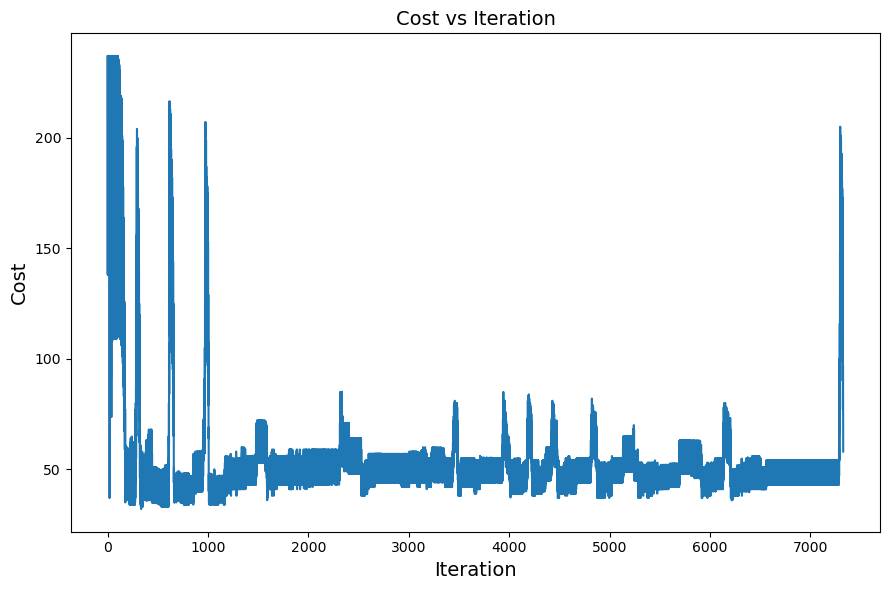

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 62.   1.]
 [ 11. 114.]]
Accuracy: 93.61702127659575
Precision: 91.2
Recall: 98.4126984126984



Threshold taken as 0.4
Confusion Matrix
[[ 62.   1.]
 [ 11. 114.]]
Accuracy: 93.61702127659575
Precision: 91.2
Recall: 98.4126984126984



Threshold taken as 0.5
Confusion Matrix
[[ 62.   1.]
 [ 11. 114.]]
Accuracy: 93.61702127659575
Precision: 91.2
Recall: 98.4126984126984



Threshold taken as 0.6
Confusion Matrix
[[ 62.   1.]
 [ 11. 114.]]
Accuracy: 93.61702127659575
Precision: 91.2
Recall: 98.4126984126984



Threshold taken as 0.7
Confusion Matrix
[[ 62.   1.]
 [ 11. 114.]]
Accuracy: 93.61702127659575
Precision: 91.2
Recall: 98.4126984126984





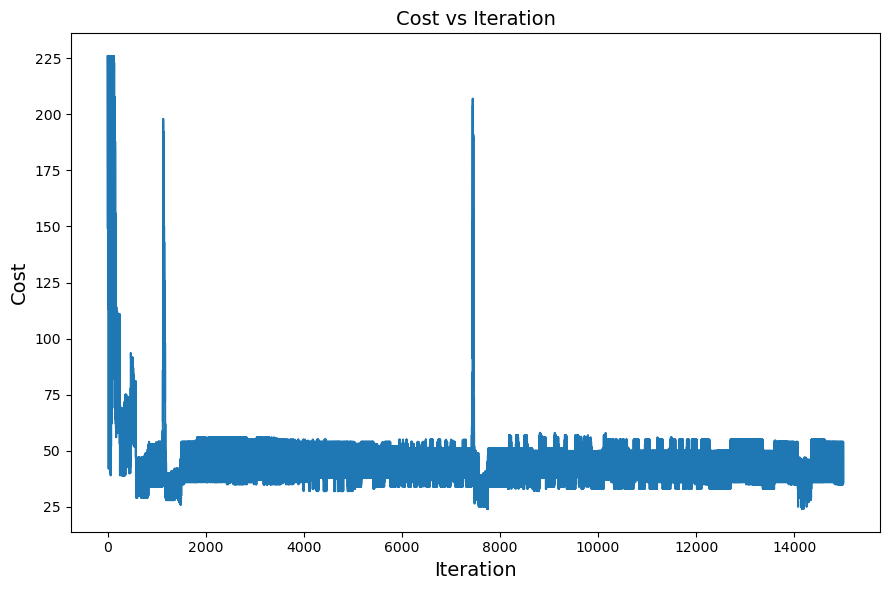

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 61.  19.]
 [  1. 107.]]
Accuracy: 89.36170212765957
Precision: 99.07407407407408
Recall: 76.25



Threshold taken as 0.4
Confusion Matrix
[[ 61.  19.]
 [  1. 107.]]
Accuracy: 89.36170212765957
Precision: 99.07407407407408
Recall: 76.25



Threshold taken as 0.5
Confusion Matrix
[[ 61.  19.]
 [  1. 107.]]
Accuracy: 89.36170212765957
Precision: 99.07407407407408
Recall: 76.25



Threshold taken as 0.6
Confusion Matrix
[[ 61.  19.]
 [  1. 107.]]
Accuracy: 89.36170212765957
Precision: 99.07407407407408
Recall: 76.25



Threshold taken as 0.7
Confusion Matrix
[[ 61.  19.]
 [  1. 107.]]
Accuracy: 89.36170212765957
Precision: 99.07407407407408
Recall: 76.25





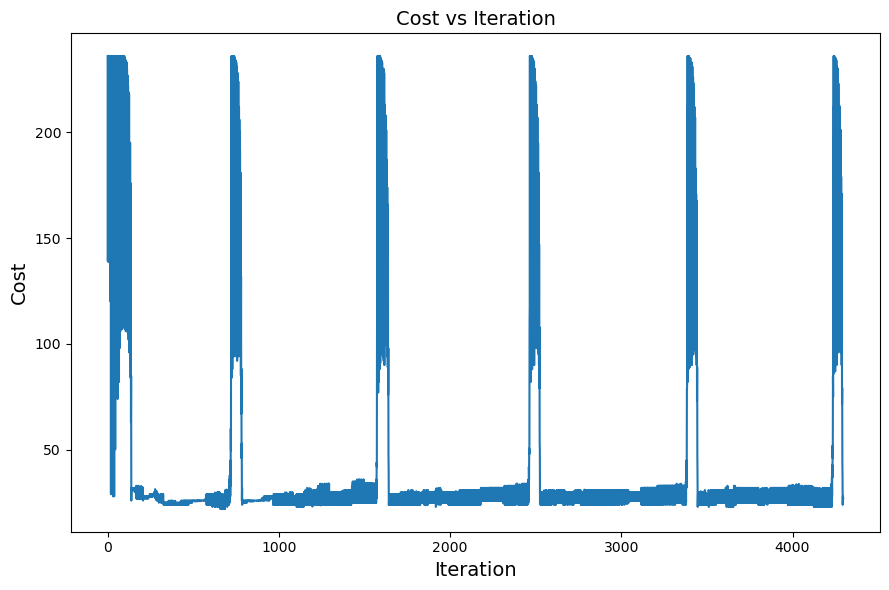

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 64.  14.]
 [  8. 102.]]
Accuracy: 88.29787234042553
Precision: 92.72727272727272
Recall: 82.05128205128204



Threshold taken as 0.4
Confusion Matrix
[[ 64.  14.]
 [  8. 102.]]
Accuracy: 88.29787234042553
Precision: 92.72727272727272
Recall: 82.05128205128204



Threshold taken as 0.5
Confusion Matrix
[[ 64.  14.]
 [  8. 102.]]
Accuracy: 88.29787234042553
Precision: 92.72727272727272
Recall: 82.05128205128204



Threshold taken as 0.6
Confusion Matrix
[[ 64.  14.]
 [  8. 102.]]
Accuracy: 88.29787234042553
Precision: 92.72727272727272
Recall: 82.05128205128204



Threshold taken as 0.7
Confusion Matrix
[[ 64.  14.]
 [  8. 102.]]
Accuracy: 88.29787234042553
Precision: 92.72727272727272
Recall: 82.05128205128204





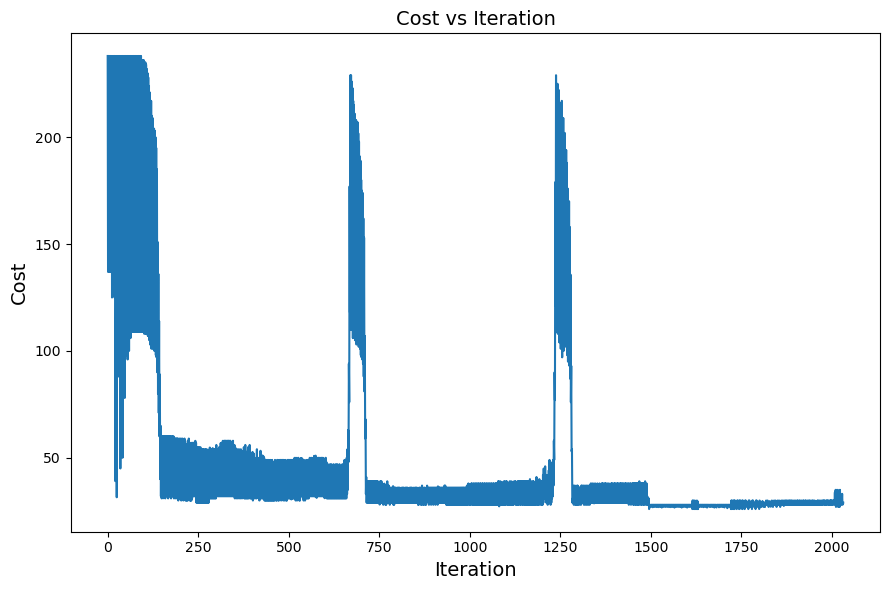

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 66.  10.]
 [  8. 104.]]
Accuracy: 90.42553191489363
Precision: 92.85714285714286
Recall: 86.8421052631579



Threshold taken as 0.4
Confusion Matrix
[[ 66.  10.]
 [  8. 104.]]
Accuracy: 90.42553191489363
Precision: 92.85714285714286
Recall: 86.8421052631579



Threshold taken as 0.5
Confusion Matrix
[[ 66.  10.]
 [  8. 104.]]
Accuracy: 90.42553191489363
Precision: 92.85714285714286
Recall: 86.8421052631579



Threshold taken as 0.6
Confusion Matrix
[[ 66.  10.]
 [  8. 104.]]
Accuracy: 90.42553191489363
Precision: 92.85714285714286
Recall: 86.8421052631579



Threshold taken as 0.7
Confusion Matrix
[[ 66.  10.]
 [  8. 104.]]
Accuracy: 90.42553191489363
Precision: 92.85714285714286
Recall: 86.8421052631579





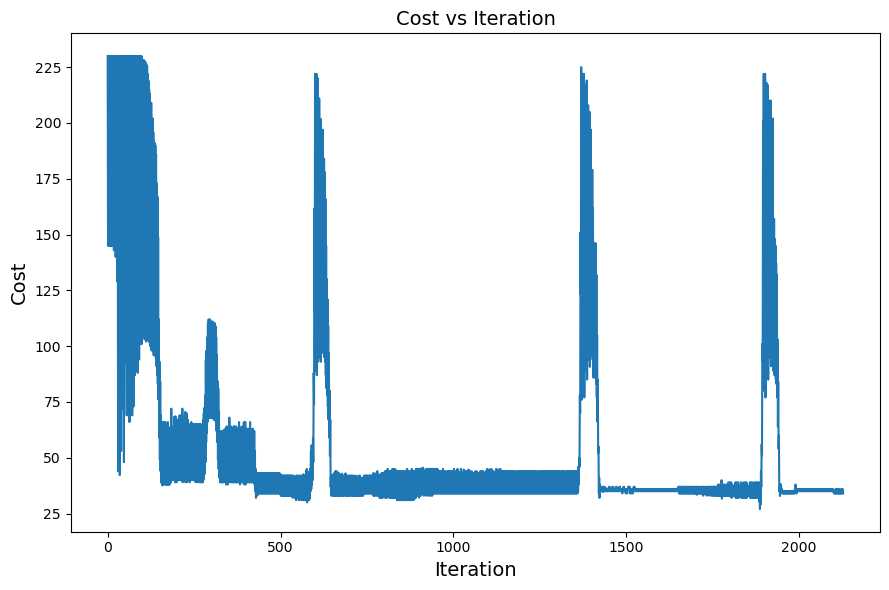

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 58.   3.]
 [  8. 119.]]
Accuracy: 94.14893617021278
Precision: 93.7007874015748
Recall: 95.08196721311475



Threshold taken as 0.4
Confusion Matrix
[[ 58.   3.]
 [  8. 119.]]
Accuracy: 94.14893617021278
Precision: 93.7007874015748
Recall: 95.08196721311475



Threshold taken as 0.5
Confusion Matrix
[[ 58.   3.]
 [  8. 119.]]
Accuracy: 94.14893617021278
Precision: 93.7007874015748
Recall: 95.08196721311475



Threshold taken as 0.6
Confusion Matrix
[[ 58.   3.]
 [  8. 119.]]
Accuracy: 94.14893617021278
Precision: 93.7007874015748
Recall: 95.08196721311475



Threshold taken as 0.7
Confusion Matrix
[[ 58.   3.]
 [  8. 119.]]
Accuracy: 94.14893617021278
Precision: 93.7007874015748
Recall: 95.08196721311475



Accuracy:
 Mean = 91.17021276595746  Standard Deviation = 2.3210025775820724
Precision:
 Mean = 93.9118554120129  Standard Deviation = 2.7041769803773335
Recall:
 Mean = 87.72761058805062  Standard Deviation = 8.160858206558173


In [109]:
# BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.0001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,1)
    
    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

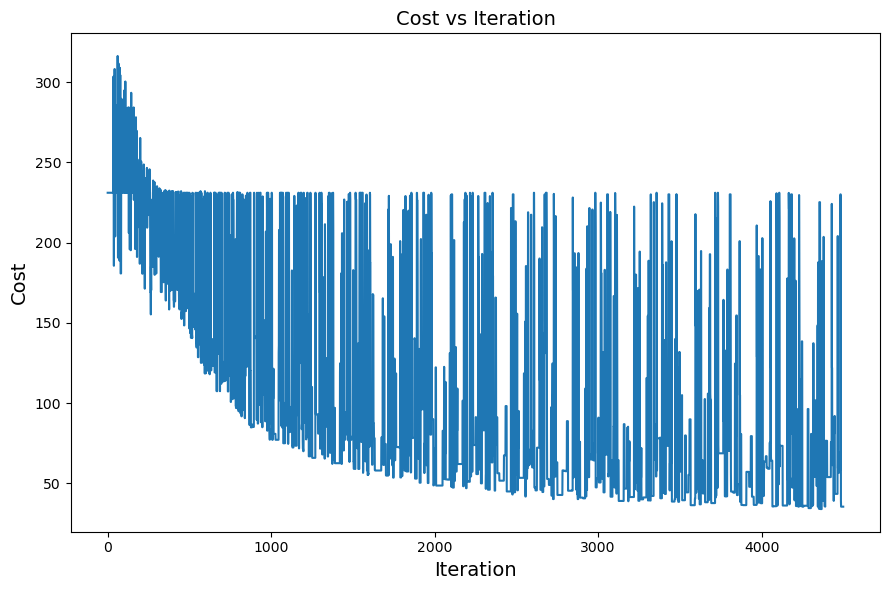

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 58.   6.]
 [  9. 115.]]
Accuracy: 92.02127659574468
Precision: 92.74193548387096
Recall: 90.625



Threshold taken as 0.4
Confusion Matrix
[[ 58.   5.]
 [  9. 116.]]
Accuracy: 92.5531914893617
Precision: 92.80000000000001
Recall: 92.06349206349206



Threshold taken as 0.5
Confusion Matrix
[[ 58.   5.]
 [  9. 116.]]
Accuracy: 92.5531914893617
Precision: 92.80000000000001
Recall: 92.06349206349206



Threshold taken as 0.6
Confusion Matrix
[[ 58.   5.]
 [  9. 116.]]
Accuracy: 92.5531914893617
Precision: 92.80000000000001
Recall: 92.06349206349206



Threshold taken as 0.7
Confusion Matrix
[[ 58.   4.]
 [  9. 117.]]
Accuracy: 93.08510638297872
Precision: 92.85714285714286
Recall: 93.54838709677419





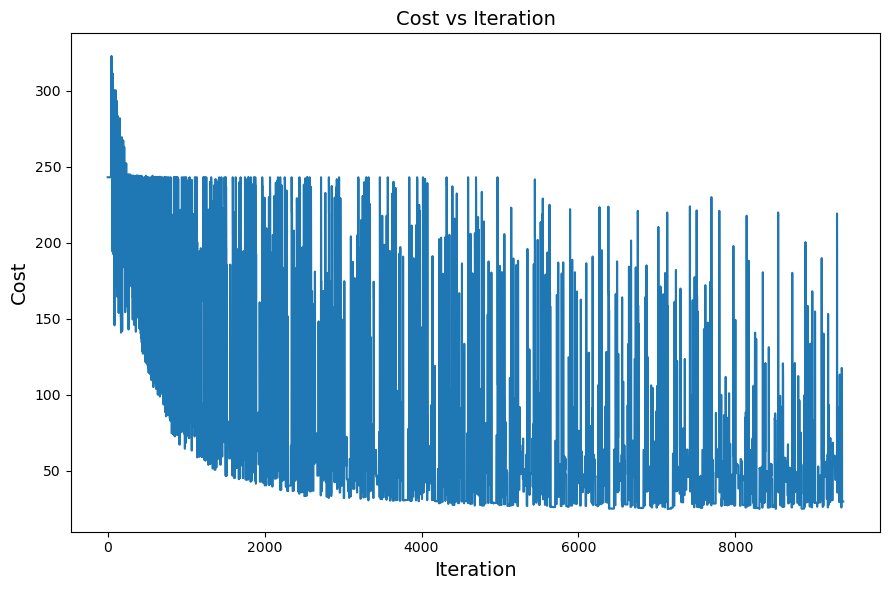

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 68.   8.]
 [ 11. 101.]]
Accuracy: 89.8936170212766
Precision: 90.17857142857143
Recall: 89.47368421052632



Threshold taken as 0.4
Confusion Matrix
[[ 68.   8.]
 [ 11. 101.]]
Accuracy: 89.8936170212766
Precision: 90.17857142857143
Recall: 89.47368421052632



Threshold taken as 0.5
Confusion Matrix
[[ 68.   8.]
 [ 11. 101.]]
Accuracy: 89.8936170212766
Precision: 90.17857142857143
Recall: 89.47368421052632



Threshold taken as 0.6
Confusion Matrix
[[ 68.   7.]
 [ 11. 102.]]
Accuracy: 90.42553191489363
Precision: 90.2654867256637
Recall: 90.66666666666666



Threshold taken as 0.7
Confusion Matrix
[[ 67.   7.]
 [ 12. 102.]]
Accuracy: 89.8936170212766
Precision: 89.47368421052632
Recall: 90.54054054054053





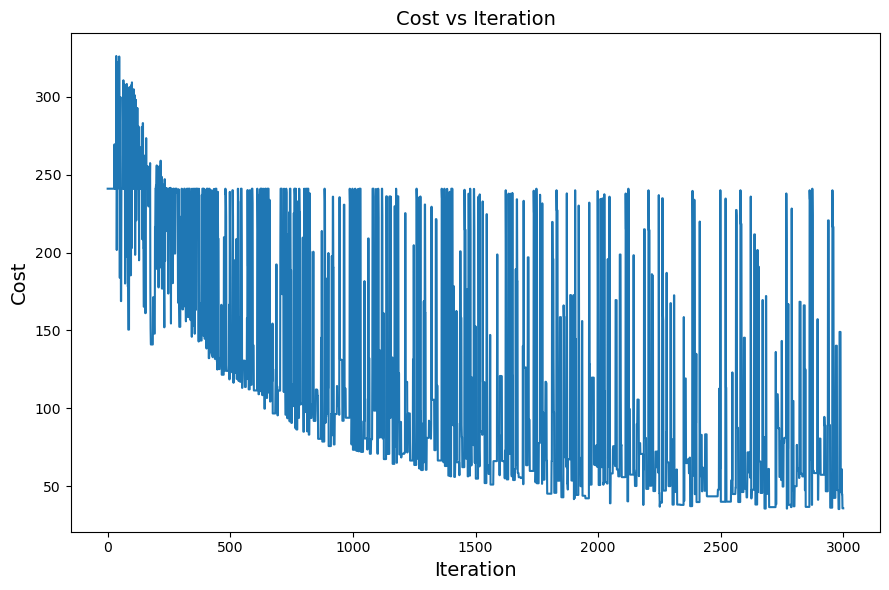

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 61.   3.]
 [ 16. 108.]]
Accuracy: 89.8936170212766
Precision: 87.09677419354838
Recall: 95.3125



Threshold taken as 0.4
Confusion Matrix
[[ 61.   3.]
 [ 16. 108.]]
Accuracy: 89.8936170212766
Precision: 87.09677419354838
Recall: 95.3125



Threshold taken as 0.5
Confusion Matrix
[[ 61.   3.]
 [ 16. 108.]]
Accuracy: 89.8936170212766
Precision: 87.09677419354838
Recall: 95.3125



Threshold taken as 0.6
Confusion Matrix
[[ 61.   3.]
 [ 16. 108.]]
Accuracy: 89.8936170212766
Precision: 87.09677419354838
Recall: 95.3125



Threshold taken as 0.7
Confusion Matrix
[[ 60.   3.]
 [ 17. 108.]]
Accuracy: 89.36170212765957
Precision: 86.4
Recall: 95.23809523809523





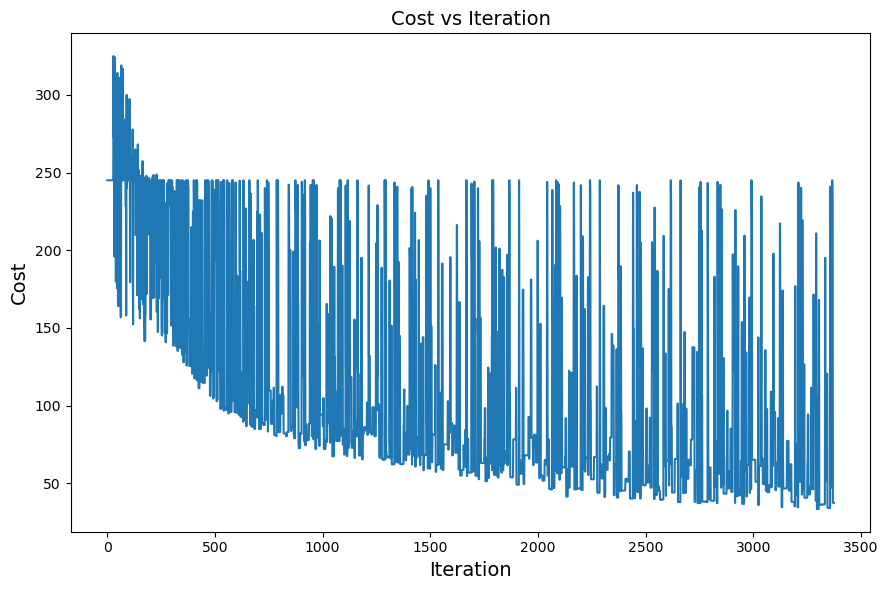

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 63.   3.]
 [ 18. 104.]]
Accuracy: 88.82978723404256
Precision: 85.24590163934425
Recall: 95.45454545454545



Threshold taken as 0.4
Confusion Matrix
[[ 63.   3.]
 [ 18. 104.]]
Accuracy: 88.82978723404256
Precision: 85.24590163934425
Recall: 95.45454545454545



Threshold taken as 0.5
Confusion Matrix
[[ 63.   3.]
 [ 18. 104.]]
Accuracy: 88.82978723404256
Precision: 85.24590163934425
Recall: 95.45454545454545



Threshold taken as 0.6
Confusion Matrix
[[ 63.   3.]
 [ 18. 104.]]
Accuracy: 88.82978723404256
Precision: 85.24590163934425
Recall: 95.45454545454545



Threshold taken as 0.7
Confusion Matrix
[[ 62.   3.]
 [ 19. 104.]]
Accuracy: 88.29787234042553
Precision: 84.5528455284553
Recall: 95.38461538461539





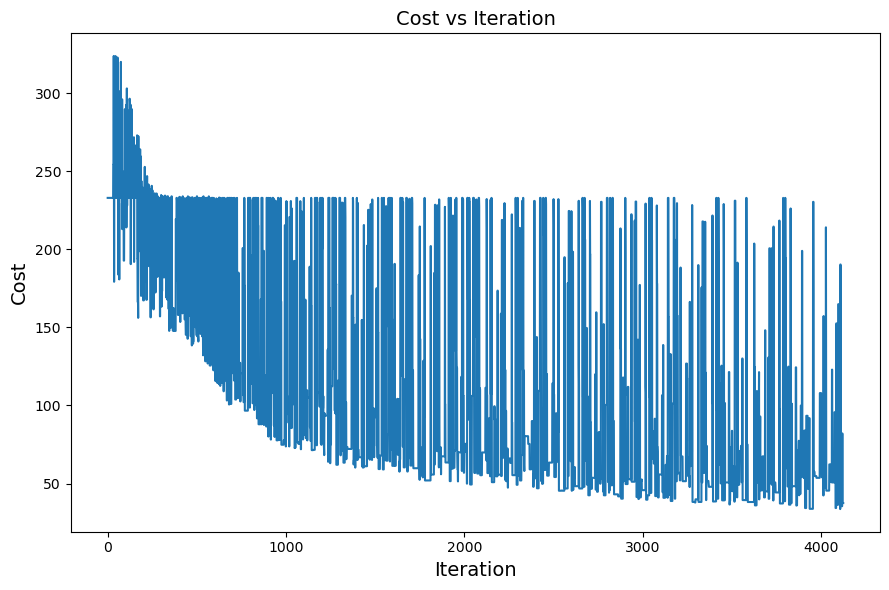

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 61.   3.]
 [  8. 116.]]
Accuracy: 94.14893617021278
Precision: 93.54838709677419
Recall: 95.3125



Threshold taken as 0.4
Confusion Matrix
[[ 61.   3.]
 [  8. 116.]]
Accuracy: 94.14893617021278
Precision: 93.54838709677419
Recall: 95.3125



Threshold taken as 0.5
Confusion Matrix
[[ 61.   3.]
 [  8. 116.]]
Accuracy: 94.14893617021278
Precision: 93.54838709677419
Recall: 95.3125



Threshold taken as 0.6
Confusion Matrix
[[ 61.   3.]
 [  8. 116.]]
Accuracy: 94.14893617021278
Precision: 93.54838709677419
Recall: 95.3125



Threshold taken as 0.7
Confusion Matrix
[[ 61.   3.]
 [  8. 116.]]
Accuracy: 94.14893617021278
Precision: 93.54838709677419
Recall: 95.3125



Accuracy:
 Mean = 91.06382978723404  Standard Deviation = 1.973110318190577
Precision:
 Mean = 89.77392687164766  Standard Deviation = 3.201173683287956
Recall:
 Mean = 93.52334434571277  Standard Deviation = 2.3942685534298738


In [162]:
# STOCHASTIC GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.0001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_stochastic(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,1)
    
    #Plot Graph
    #print(f"{error}")
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

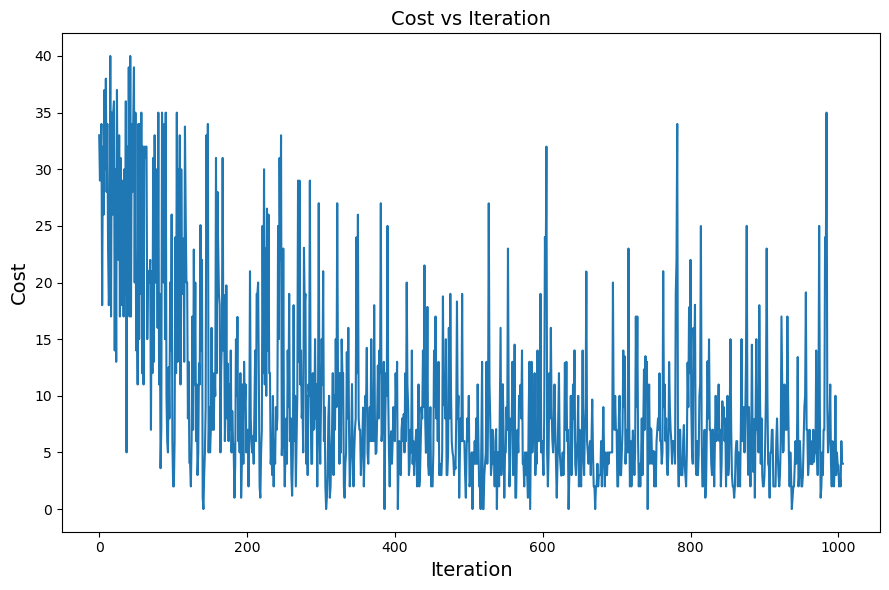

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 58.   3.]
 [ 14. 113.]]
Accuracy: 90.95744680851064
Precision: 88.9763779527559
Recall: 95.08196721311475



Threshold taken as 0.4
Confusion Matrix
[[ 58.   3.]
 [ 14. 113.]]
Accuracy: 90.95744680851064
Precision: 88.9763779527559
Recall: 95.08196721311475



Threshold taken as 0.5
Confusion Matrix
[[ 58.   3.]
 [ 14. 113.]]
Accuracy: 90.95744680851064
Precision: 88.9763779527559
Recall: 95.08196721311475



Threshold taken as 0.6
Confusion Matrix
[[ 58.   3.]
 [ 14. 113.]]
Accuracy: 90.95744680851064
Precision: 88.9763779527559
Recall: 95.08196721311475



Threshold taken as 0.7
Confusion Matrix
[[ 58.   3.]
 [ 14. 113.]]
Accuracy: 90.95744680851064
Precision: 88.9763779527559
Recall: 95.08196721311475





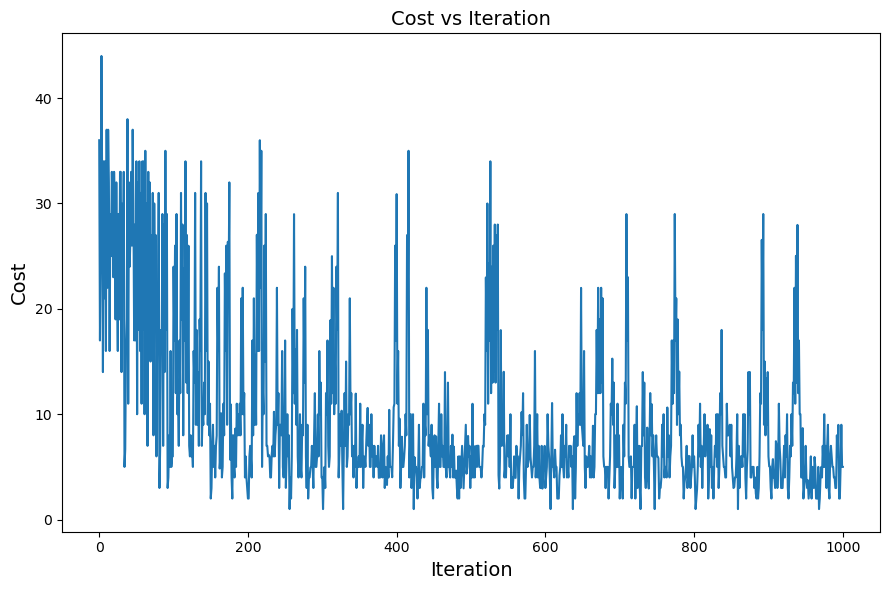

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 60.   4.]
 [  9. 115.]]
Accuracy: 93.08510638297872
Precision: 92.74193548387096
Recall: 93.75



Threshold taken as 0.4
Confusion Matrix
[[ 60.   4.]
 [  9. 115.]]
Accuracy: 93.08510638297872
Precision: 92.74193548387096
Recall: 93.75



Threshold taken as 0.5
Confusion Matrix
[[ 60.   4.]
 [  9. 115.]]
Accuracy: 93.08510638297872
Precision: 92.74193548387096
Recall: 93.75



Threshold taken as 0.6
Confusion Matrix
[[ 60.   4.]
 [  9. 115.]]
Accuracy: 93.08510638297872
Precision: 92.74193548387096
Recall: 93.75



Threshold taken as 0.7
Confusion Matrix
[[ 60.   4.]
 [  9. 115.]]
Accuracy: 93.08510638297872
Precision: 92.74193548387096
Recall: 93.75





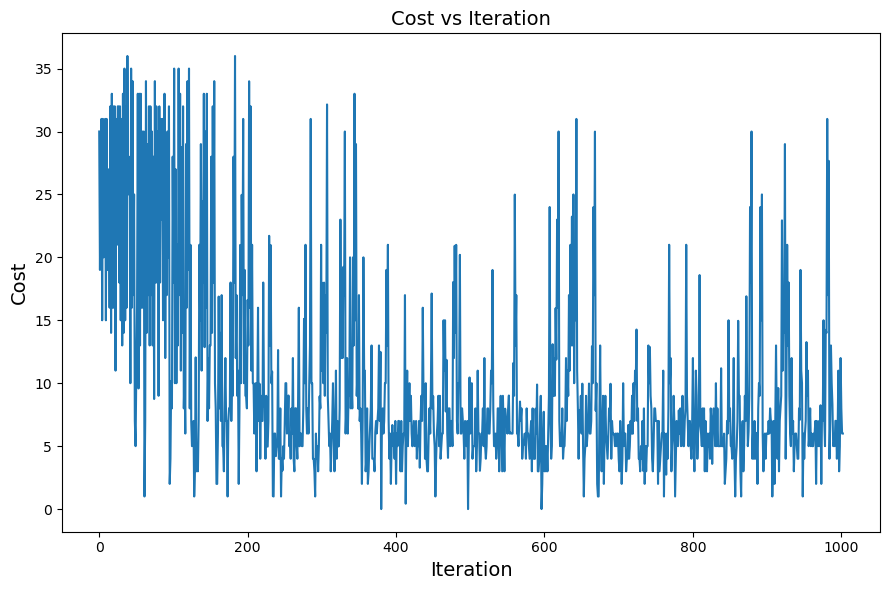

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[68. 38.]
 [ 1. 81.]]
Accuracy: 79.25531914893617
Precision: 98.78048780487805
Recall: 64.15094339622641



Threshold taken as 0.4
Confusion Matrix
[[68. 38.]
 [ 1. 81.]]
Accuracy: 79.25531914893617
Precision: 98.78048780487805
Recall: 64.15094339622641



Threshold taken as 0.5
Confusion Matrix
[[68. 38.]
 [ 1. 81.]]
Accuracy: 79.25531914893617
Precision: 98.78048780487805
Recall: 64.15094339622641



Threshold taken as 0.6
Confusion Matrix
[[68. 38.]
 [ 1. 81.]]
Accuracy: 79.25531914893617
Precision: 98.78048780487805
Recall: 64.15094339622641



Threshold taken as 0.7
Confusion Matrix
[[68. 38.]
 [ 1. 81.]]
Accuracy: 79.25531914893617
Precision: 98.78048780487805
Recall: 64.15094339622641





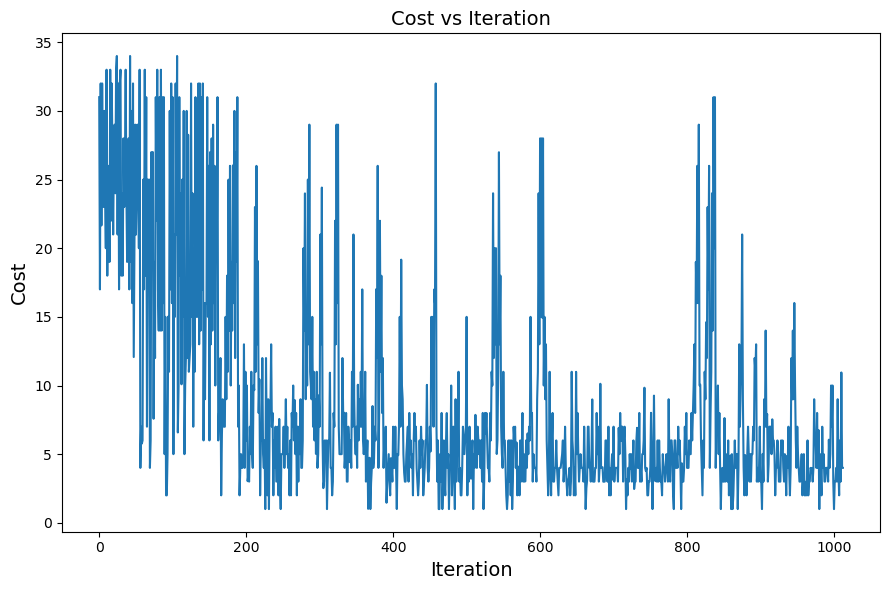

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 53.  10.]
 [  9. 116.]]
Accuracy: 89.8936170212766
Precision: 92.80000000000001
Recall: 84.12698412698413



Threshold taken as 0.4
Confusion Matrix
[[ 53.  10.]
 [  9. 116.]]
Accuracy: 89.8936170212766
Precision: 92.80000000000001
Recall: 84.12698412698413



Threshold taken as 0.5
Confusion Matrix
[[ 53.  10.]
 [  9. 116.]]
Accuracy: 89.8936170212766
Precision: 92.80000000000001
Recall: 84.12698412698413



Threshold taken as 0.6
Confusion Matrix
[[ 53.  10.]
 [  9. 116.]]
Accuracy: 89.8936170212766
Precision: 92.80000000000001
Recall: 84.12698412698413



Threshold taken as 0.7
Confusion Matrix
[[ 53.  10.]
 [  9. 116.]]
Accuracy: 89.8936170212766
Precision: 92.80000000000001
Recall: 84.12698412698413





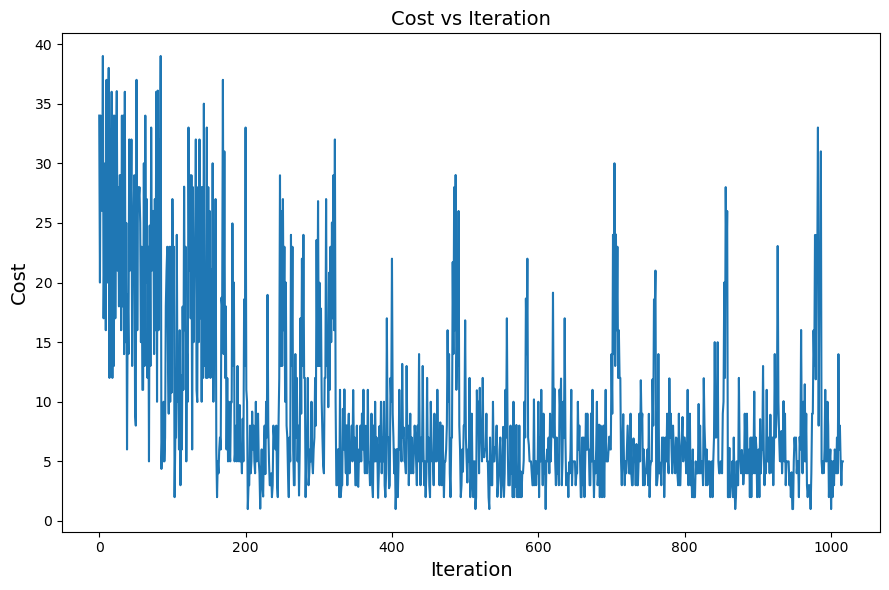

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 66.   6.]
 [  7. 109.]]
Accuracy: 93.08510638297872
Precision: 93.96551724137932
Recall: 91.66666666666666



Threshold taken as 0.4
Confusion Matrix
[[ 66.   6.]
 [  7. 109.]]
Accuracy: 93.08510638297872
Precision: 93.96551724137932
Recall: 91.66666666666666



Threshold taken as 0.5
Confusion Matrix
[[ 66.   6.]
 [  7. 109.]]
Accuracy: 93.08510638297872
Precision: 93.96551724137932
Recall: 91.66666666666666



Threshold taken as 0.6
Confusion Matrix
[[ 66.   6.]
 [  7. 109.]]
Accuracy: 93.08510638297872
Precision: 93.96551724137932
Recall: 91.66666666666666



Threshold taken as 0.7
Confusion Matrix
[[ 66.   6.]
 [  7. 109.]]
Accuracy: 93.08510638297872
Precision: 93.96551724137932
Recall: 91.66666666666666



Accuracy:
 Mean = 89.25531914893618  Standard Deviation = 5.150518483791577
Precision:
 Mean = 93.45286369657684  Standard Deviation = 3.1501418012817166
Recall:
 Mean = 85.75531228059837  Standard Deviation = 11.4476708732

In [120]:
# MINI BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset1.sample(frac=2/3)
    test_data = dataset1.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.0001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_mini_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,50,max_error,1)

    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold ==0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold +=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

##   LR 2  with Learning Rate = 0.01 all 3 models and all 5 thresholds

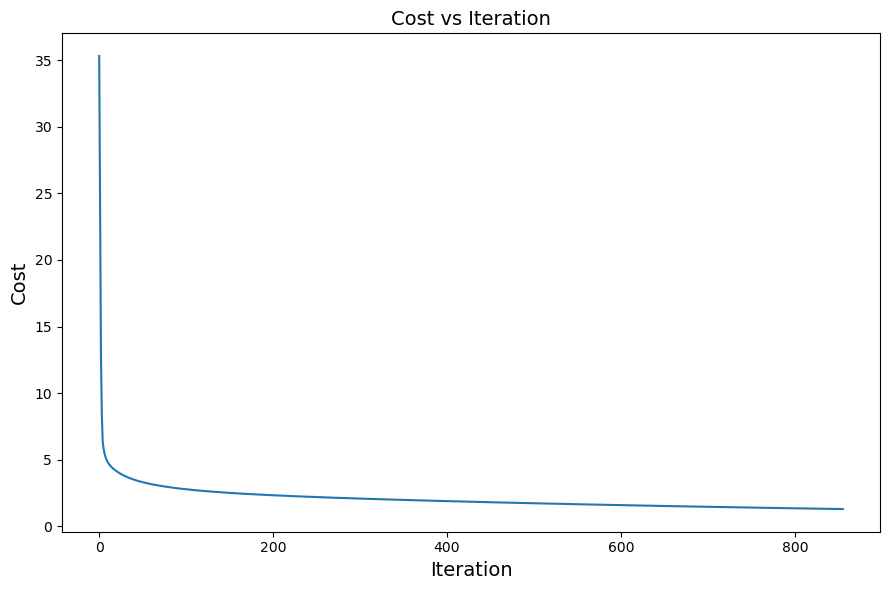

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 75.   4.]
 [  3. 108.]]
Accuracy: 96.3157894736842
Precision: 97.2972972972973
Recall: 94.9367088607595



Threshold taken as 0.4
Confusion Matrix
[[ 75.   3.]
 [  3. 109.]]
Accuracy: 96.84210526315789
Precision: 97.32142857142857
Recall: 96.15384615384616



Threshold taken as 0.5
Confusion Matrix
[[ 75.   3.]
 [  3. 109.]]
Accuracy: 96.84210526315789
Precision: 97.32142857142857
Recall: 96.15384615384616



Threshold taken as 0.6
Confusion Matrix
[[ 75.   3.]
 [  3. 109.]]
Accuracy: 96.84210526315789
Precision: 97.32142857142857
Recall: 96.15384615384616



Threshold taken as 0.7
Confusion Matrix
[[ 74.   3.]
 [  4. 109.]]
Accuracy: 96.3157894736842
Precision: 96.46017699115043
Recall: 96.1038961038961





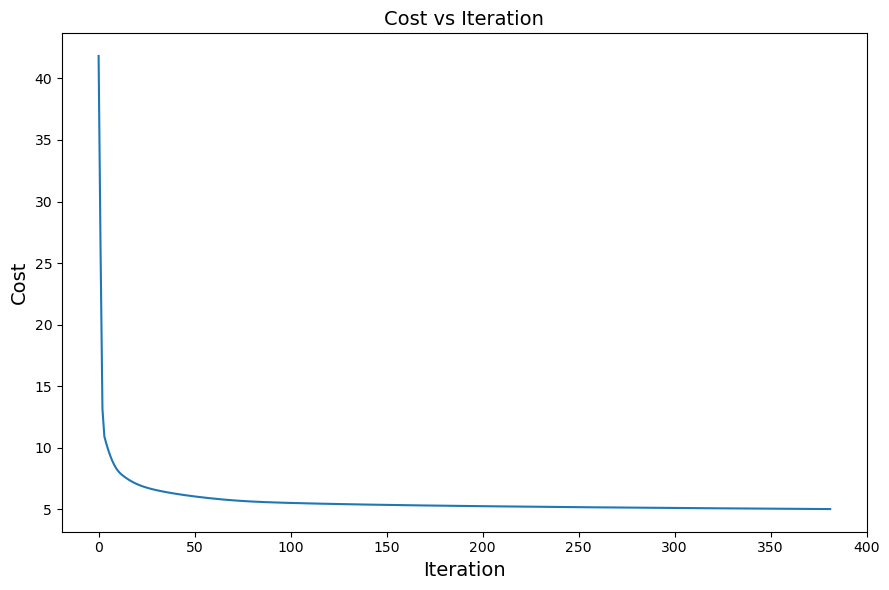

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 72.   0.]
 [  2. 116.]]
Accuracy: 98.94736842105263
Precision: 98.30508474576271
Recall: 100.0



Threshold taken as 0.4
Confusion Matrix
[[ 71.   0.]
 [  3. 116.]]
Accuracy: 98.42105263157895
Precision: 97.47899159663865
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 70.   0.]
 [  4. 116.]]
Accuracy: 97.89473684210527
Precision: 96.66666666666667
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 69.   0.]
 [  5. 116.]]
Accuracy: 97.36842105263158
Precision: 95.86776859504133
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 67.   0.]
 [  7. 116.]]
Accuracy: 96.3157894736842
Precision: 94.3089430894309
Recall: 100.0





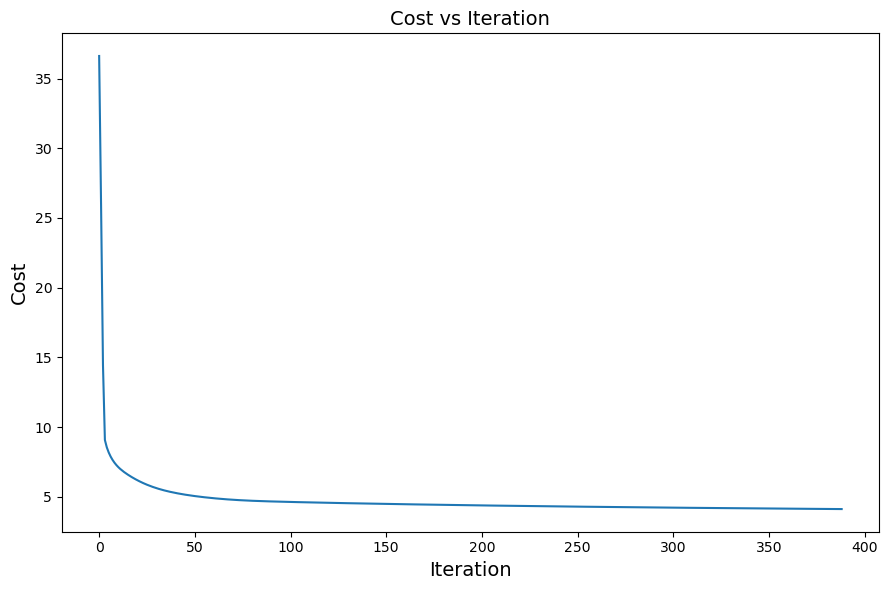

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 71.   1.]
 [  2. 116.]]
Accuracy: 98.42105263157895
Precision: 98.30508474576271
Recall: 98.61111111111111



Threshold taken as 0.4
Confusion Matrix
[[ 70.   0.]
 [  3. 117.]]
Accuracy: 98.42105263157895
Precision: 97.5
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 69.   0.]
 [  4. 117.]]
Accuracy: 97.89473684210527
Precision: 96.69421487603306
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 69.   0.]
 [  4. 117.]]
Accuracy: 97.89473684210527
Precision: 96.69421487603306
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 68.   0.]
 [  5. 117.]]
Accuracy: 97.36842105263158
Precision: 95.90163934426229
Recall: 100.0





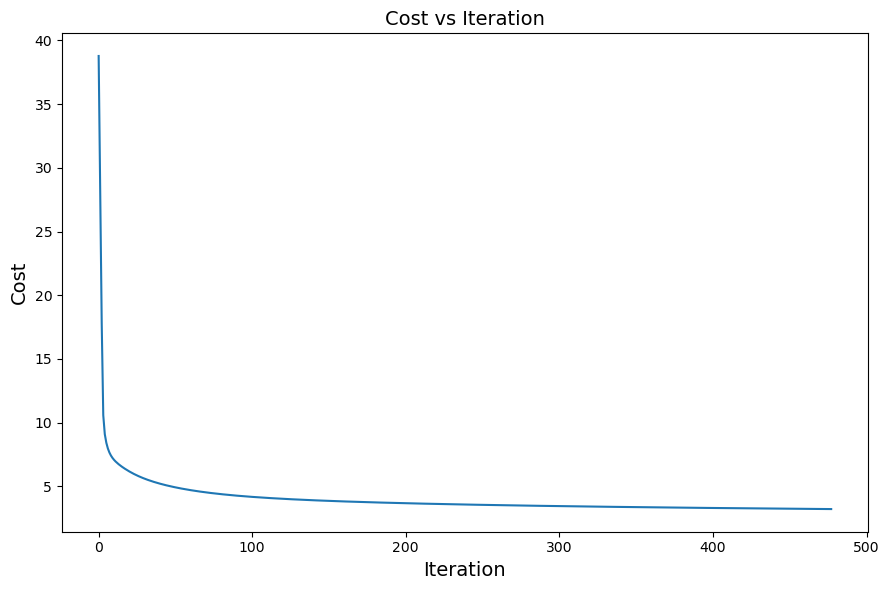

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 71.   4.]
 [  3. 112.]]
Accuracy: 96.3157894736842
Precision: 97.3913043478261
Recall: 94.66666666666667



Threshold taken as 0.4
Confusion Matrix
[[ 71.   3.]
 [  3. 113.]]
Accuracy: 96.84210526315789
Precision: 97.41379310344827
Recall: 95.94594594594594



Threshold taken as 0.5
Confusion Matrix
[[ 70.   3.]
 [  4. 113.]]
Accuracy: 96.3157894736842
Precision: 96.58119658119658
Recall: 95.8904109589041



Threshold taken as 0.6
Confusion Matrix
[[ 70.   3.]
 [  4. 113.]]
Accuracy: 96.3157894736842
Precision: 96.58119658119658
Recall: 95.8904109589041



Threshold taken as 0.7
Confusion Matrix
[[ 69.   3.]
 [  5. 113.]]
Accuracy: 95.78947368421052
Precision: 95.76271186440678
Recall: 95.83333333333334





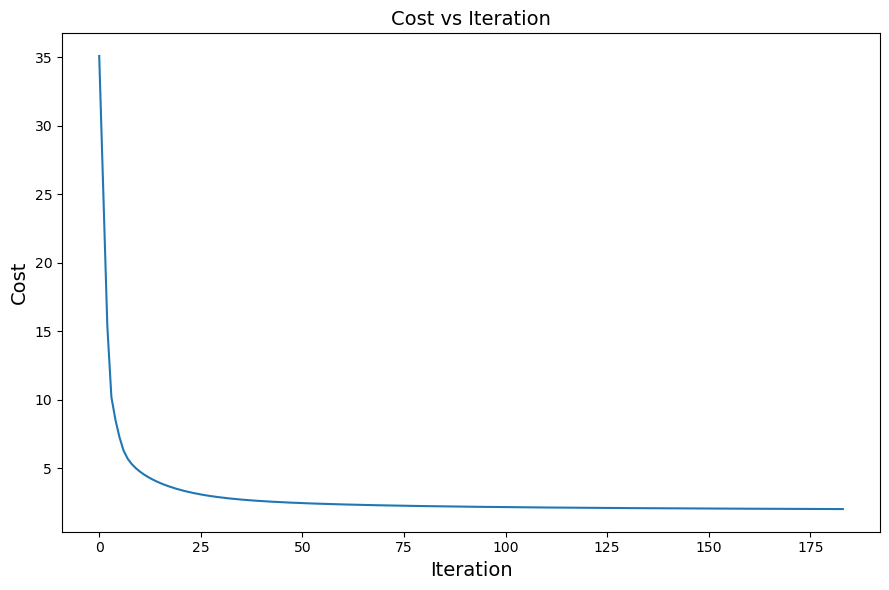

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 62.   3.]
 [  5. 120.]]
Accuracy: 95.78947368421052
Precision: 96.0
Recall: 95.38461538461539



Threshold taken as 0.4
Confusion Matrix
[[ 61.   2.]
 [  6. 121.]]
Accuracy: 95.78947368421052
Precision: 95.2755905511811
Recall: 96.82539682539682



Threshold taken as 0.5
Confusion Matrix
[[ 61.   2.]
 [  6. 121.]]
Accuracy: 95.78947368421052
Precision: 95.2755905511811
Recall: 96.82539682539682



Threshold taken as 0.6
Confusion Matrix
[[ 61.   1.]
 [  6. 122.]]
Accuracy: 96.3157894736842
Precision: 95.3125
Recall: 98.38709677419355



Threshold taken as 0.7
Confusion Matrix
[[ 61.   0.]
 [  6. 123.]]
Accuracy: 96.84210526315789
Precision: 95.34883720930233
Recall: 100.0



Accuracy:
 Mean = 96.94736842105263  Standard Deviation = 0.8421052631579024
Precision:
 Mean = 96.5078194493012  Standard Deviation = 0.6701802381490594
Recall:
 Mean = 97.77393078762942  Standard Deviation = 1.8429761864907055


In [111]:
# BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.01
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,0)
    
    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

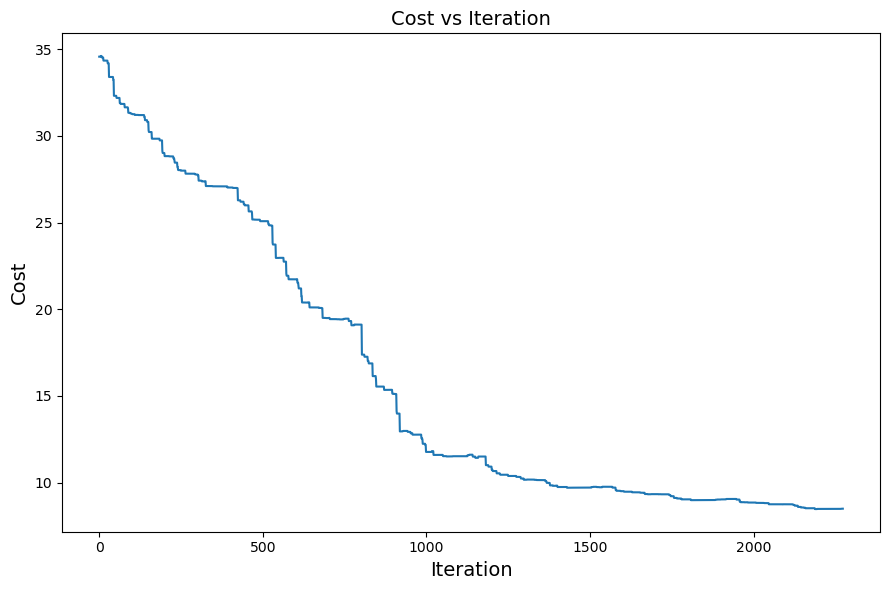

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 70.   4.]
 [  1. 115.]]
Accuracy: 97.36842105263158
Precision: 99.13793103448276
Recall: 94.5945945945946



Threshold taken as 0.4
Confusion Matrix
[[ 69.   3.]
 [  2. 116.]]
Accuracy: 97.36842105263158
Precision: 98.30508474576271
Recall: 95.83333333333334



Threshold taken as 0.5
Confusion Matrix
[[ 69.   2.]
 [  2. 117.]]
Accuracy: 97.89473684210527
Precision: 98.31932773109243
Recall: 97.1830985915493



Threshold taken as 0.6
Confusion Matrix
[[ 69.   1.]
 [  2. 118.]]
Accuracy: 98.42105263157895
Precision: 98.33333333333333
Recall: 98.57142857142858



Threshold taken as 0.7
Confusion Matrix
[[ 65.   1.]
 [  6. 118.]]
Accuracy: 96.3157894736842
Precision: 95.16129032258065
Recall: 98.48484848484848





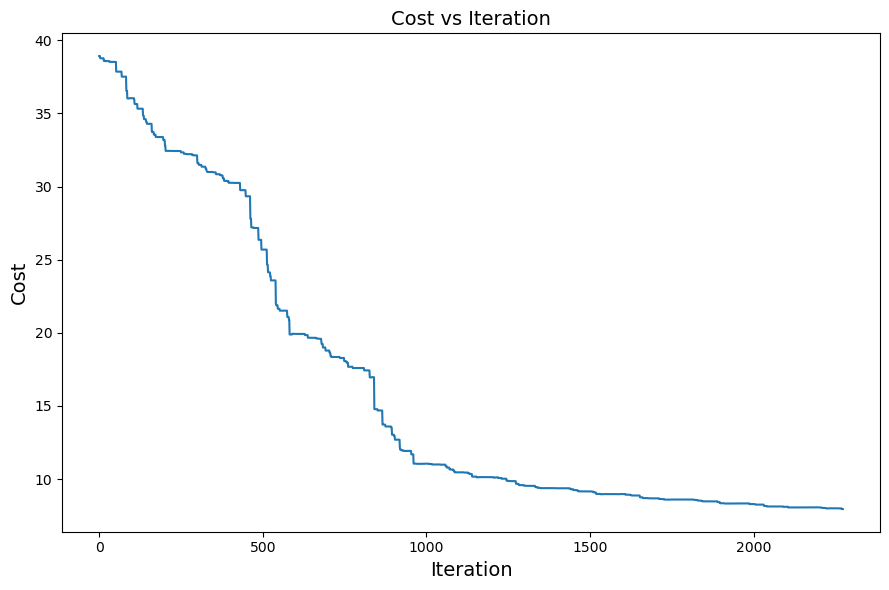

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 73.   9.]
 [  0. 108.]]
Accuracy: 95.26315789473684
Precision: 100.0
Recall: 89.02439024390245



Threshold taken as 0.4
Confusion Matrix
[[ 72.   9.]
 [  1. 108.]]
Accuracy: 94.73684210526315
Precision: 99.08256880733946
Recall: 88.88888888888889



Threshold taken as 0.5
Confusion Matrix
[[ 72.   7.]
 [  1. 110.]]
Accuracy: 95.78947368421052
Precision: 99.09909909909909
Recall: 91.13924050632912



Threshold taken as 0.6
Confusion Matrix
[[ 72.   5.]
 [  1. 112.]]
Accuracy: 96.84210526315789
Precision: 99.11504424778761
Recall: 93.5064935064935



Threshold taken as 0.7
Confusion Matrix
[[ 71.   2.]
 [  2. 115.]]
Accuracy: 97.89473684210527
Precision: 98.29059829059828
Recall: 97.26027397260275





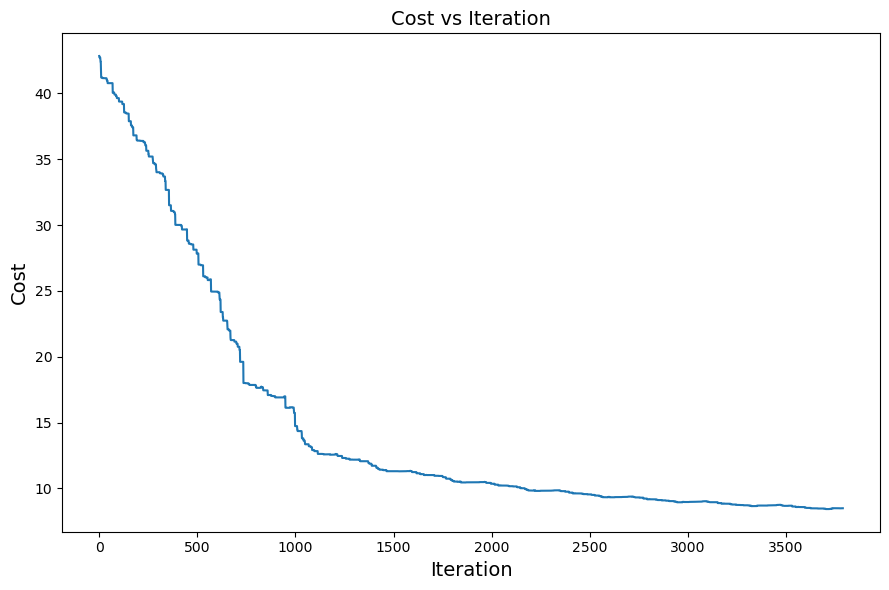

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 75.   2.]
 [  0. 113.]]
Accuracy: 98.94736842105263
Precision: 100.0
Recall: 97.40259740259741



Threshold taken as 0.4
Confusion Matrix
[[ 75.   1.]
 [  0. 114.]]
Accuracy: 99.47368421052632
Precision: 100.0
Recall: 98.68421052631578



Threshold taken as 0.5
Confusion Matrix
[[ 75.   0.]
 [  0. 115.]]
Accuracy: 100.0
Precision: 100.0
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 73.   0.]
 [  2. 115.]]
Accuracy: 98.94736842105263
Precision: 98.29059829059828
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 72.   0.]
 [  3. 115.]]
Accuracy: 98.42105263157895
Precision: 97.45762711864407
Recall: 100.0





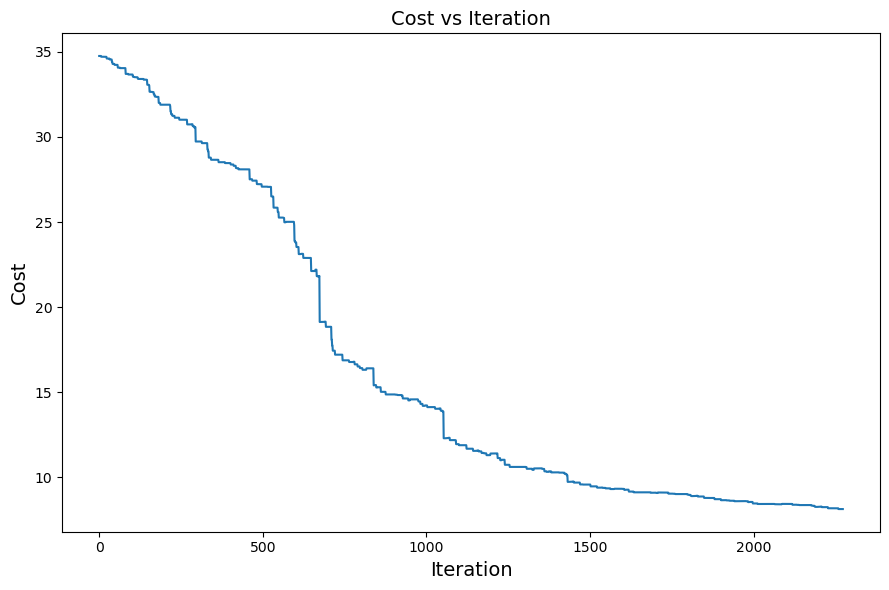

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 64.   1.]
 [  3. 122.]]
Accuracy: 97.89473684210527
Precision: 97.6
Recall: 98.46153846153847



Threshold taken as 0.4
Confusion Matrix
[[ 63.   1.]
 [  4. 122.]]
Accuracy: 97.36842105263158
Precision: 96.82539682539682
Recall: 98.4375



Threshold taken as 0.5
Confusion Matrix
[[ 63.   0.]
 [  4. 123.]]
Accuracy: 97.89473684210527
Precision: 96.8503937007874
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 61.   0.]
 [  6. 123.]]
Accuracy: 96.84210526315789
Precision: 95.34883720930233
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 61.   0.]
 [  6. 123.]]
Accuracy: 96.84210526315789
Precision: 95.34883720930233
Recall: 100.0





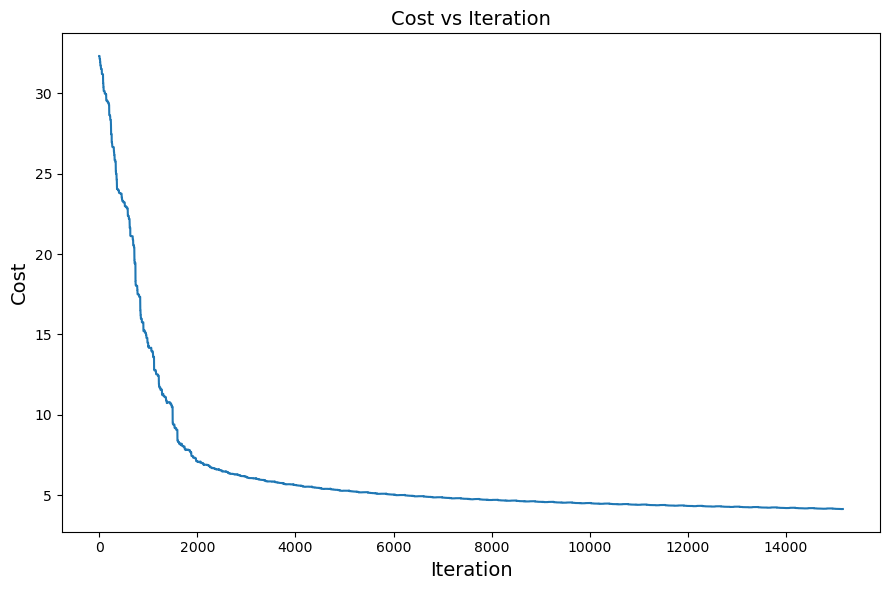

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 76.   5.]
 [  3. 106.]]
Accuracy: 95.78947368421052
Precision: 97.24770642201835
Recall: 93.82716049382715



Threshold taken as 0.4
Confusion Matrix
[[ 76.   2.]
 [  3. 109.]]
Accuracy: 97.36842105263158
Precision: 97.32142857142857
Recall: 97.43589743589743



Threshold taken as 0.5
Confusion Matrix
[[ 76.   0.]
 [  3. 111.]]
Accuracy: 98.42105263157895
Precision: 97.36842105263158
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 76.   0.]
 [  3. 111.]]
Accuracy: 98.42105263157895
Precision: 97.36842105263158
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 74.   0.]
 [  5. 111.]]
Accuracy: 97.36842105263158
Precision: 95.6896551724138
Recall: 100.0



Accuracy:
 Mean = 98.0  Standard Deviation = 1.348026155249022
Precision:
 Mean = 98.32744831672208  Standard Deviation = 1.1396809763098366
Recall:
 Mean = 97.66446781957568  Standard Deviation = 3.4401871902738783


In [168]:
# STOCHASTIC GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.01
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_stochastic(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,0)
    
    #Plot Graph
    #print(f"{error}")
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

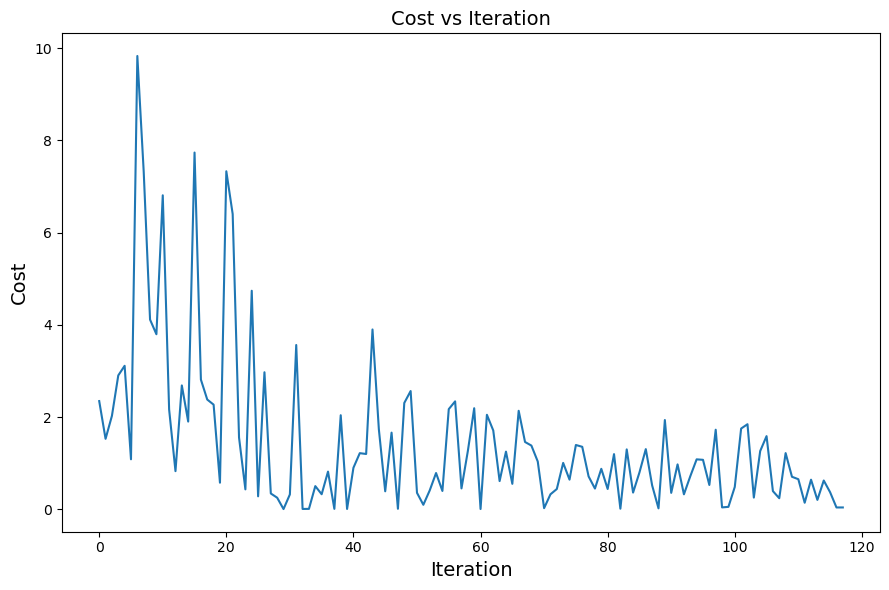

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 56.   8.]
 [  1. 125.]]
Accuracy: 95.26315789473684
Precision: 99.20634920634922
Recall: 87.5



Threshold taken as 0.4
Confusion Matrix
[[ 56.   7.]
 [  1. 126.]]
Accuracy: 95.78947368421052
Precision: 99.21259842519686
Recall: 88.88888888888889



Threshold taken as 0.5
Confusion Matrix
[[ 56.   7.]
 [  1. 126.]]
Accuracy: 95.78947368421052
Precision: 99.21259842519686
Recall: 88.88888888888889



Threshold taken as 0.6
Confusion Matrix
[[ 56.   6.]
 [  1. 127.]]
Accuracy: 96.3157894736842
Precision: 99.21875
Recall: 90.32258064516128



Threshold taken as 0.7
Confusion Matrix
[[ 56.   4.]
 [  1. 129.]]
Accuracy: 97.36842105263158
Precision: 99.23076923076923
Recall: 93.33333333333333





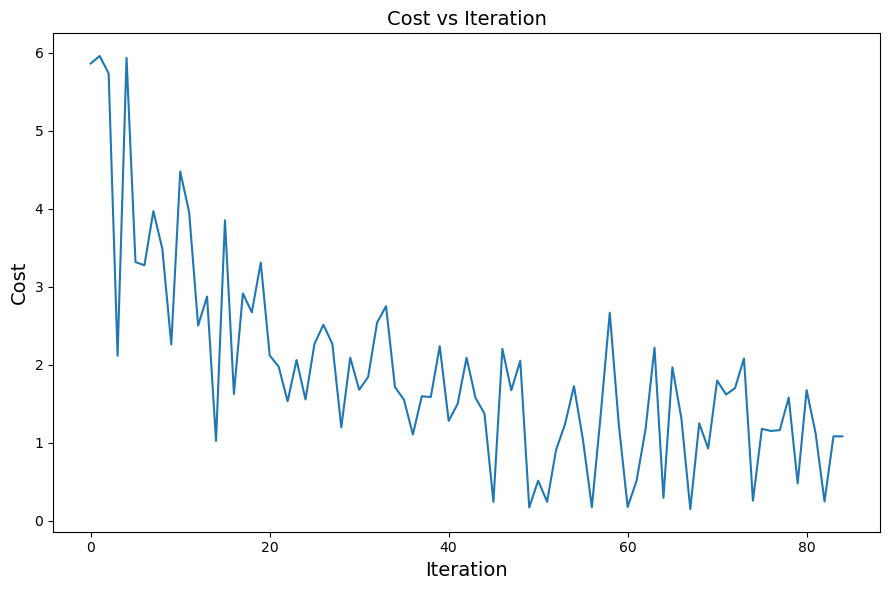

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 68.   7.]
 [  0. 115.]]
Accuracy: 96.3157894736842
Precision: 100.0
Recall: 90.66666666666666



Threshold taken as 0.4
Confusion Matrix
[[ 68.   4.]
 [  0. 118.]]
Accuracy: 97.89473684210527
Precision: 100.0
Recall: 94.44444444444444



Threshold taken as 0.5
Confusion Matrix
[[ 68.   1.]
 [  0. 121.]]
Accuracy: 99.47368421052632
Precision: 100.0
Recall: 98.55072463768117



Threshold taken as 0.6
Confusion Matrix
[[ 66.   1.]
 [  2. 121.]]
Accuracy: 98.42105263157895
Precision: 98.3739837398374
Recall: 98.50746268656717



Threshold taken as 0.7
Confusion Matrix
[[ 66.   1.]
 [  2. 121.]]
Accuracy: 98.42105263157895
Precision: 98.3739837398374
Recall: 98.50746268656717





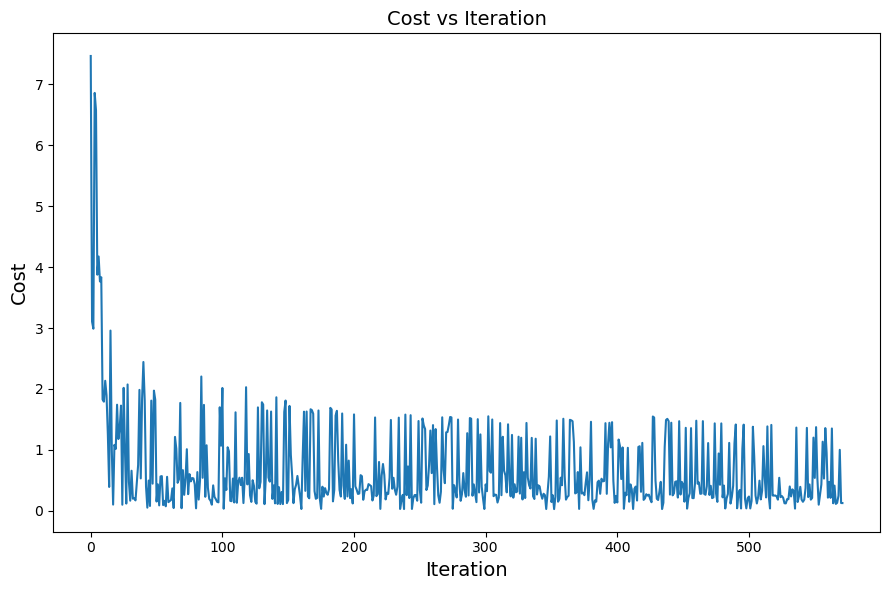

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 75.   3.]
 [  3. 109.]]
Accuracy: 96.84210526315789
Precision: 97.32142857142857
Recall: 96.15384615384616



Threshold taken as 0.4
Confusion Matrix
[[ 75.   2.]
 [  3. 110.]]
Accuracy: 97.36842105263158
Precision: 97.34513274336283
Recall: 97.40259740259741



Threshold taken as 0.5
Confusion Matrix
[[ 75.   1.]
 [  3. 111.]]
Accuracy: 97.89473684210527
Precision: 97.36842105263158
Recall: 98.68421052631578



Threshold taken as 0.6
Confusion Matrix
[[ 75.   1.]
 [  3. 111.]]
Accuracy: 97.89473684210527
Precision: 97.36842105263158
Recall: 98.68421052631578



Threshold taken as 0.7
Confusion Matrix
[[ 74.   0.]
 [  4. 112.]]
Accuracy: 97.89473684210527
Precision: 96.55172413793103
Recall: 100.0





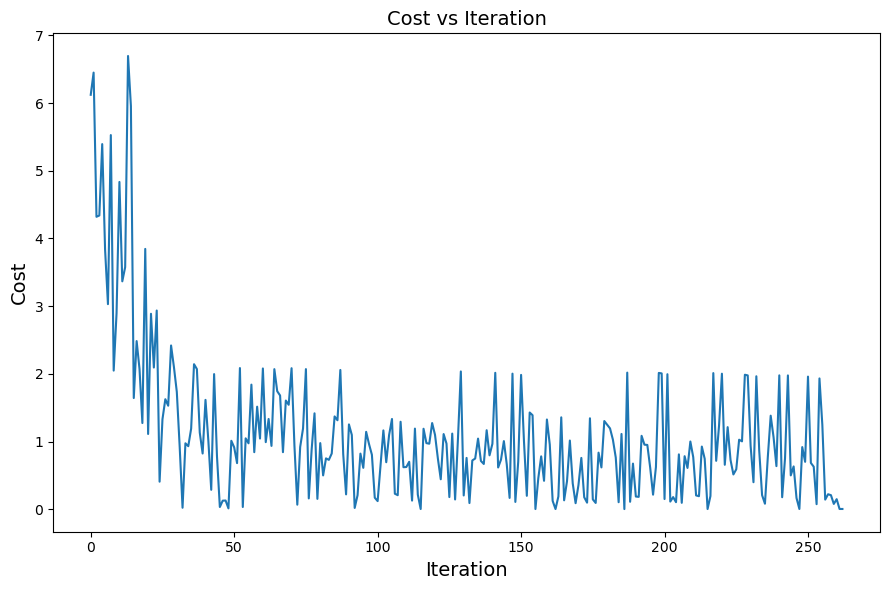

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 70.   2.]
 [  2. 116.]]
Accuracy: 97.89473684210527
Precision: 98.30508474576271
Recall: 97.22222222222221



Threshold taken as 0.4
Confusion Matrix
[[ 70.   2.]
 [  2. 116.]]
Accuracy: 97.89473684210527
Precision: 98.30508474576271
Recall: 97.22222222222221



Threshold taken as 0.5
Confusion Matrix
[[ 70.   2.]
 [  2. 116.]]
Accuracy: 97.89473684210527
Precision: 98.30508474576271
Recall: 97.22222222222221



Threshold taken as 0.6
Confusion Matrix
[[ 70.   1.]
 [  2. 117.]]
Accuracy: 98.42105263157895
Precision: 98.31932773109243
Recall: 98.59154929577466



Threshold taken as 0.7
Confusion Matrix
[[ 69.   1.]
 [  3. 117.]]
Accuracy: 97.89473684210527
Precision: 97.5
Recall: 98.57142857142858





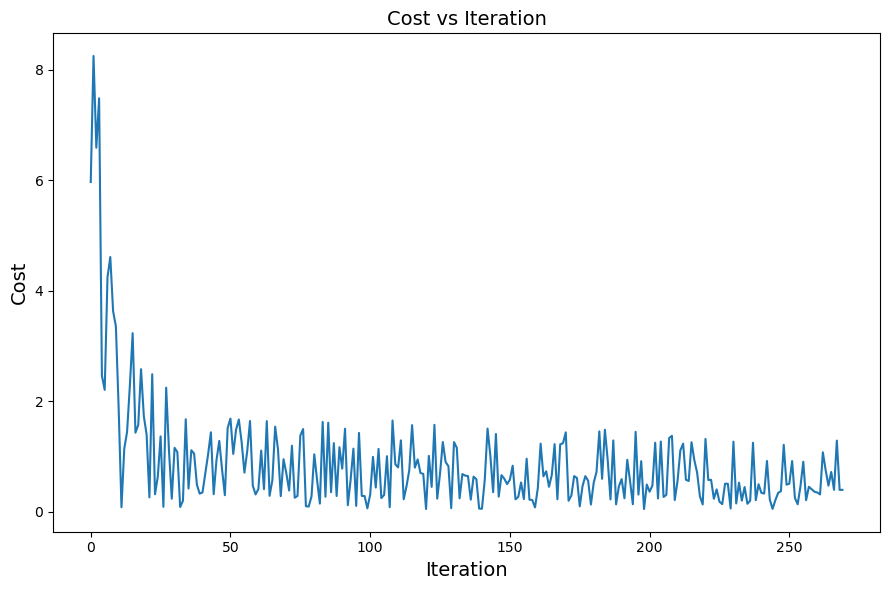

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 63.   3.]
 [  3. 121.]]
Accuracy: 96.84210526315789
Precision: 97.58064516129032
Recall: 95.45454545454545



Threshold taken as 0.4
Confusion Matrix
[[ 63.   3.]
 [  3. 121.]]
Accuracy: 96.84210526315789
Precision: 97.58064516129032
Recall: 95.45454545454545



Threshold taken as 0.5
Confusion Matrix
[[ 63.   2.]
 [  3. 122.]]
Accuracy: 97.36842105263158
Precision: 97.6
Recall: 96.92307692307692



Threshold taken as 0.6
Confusion Matrix
[[ 63.   1.]
 [  3. 123.]]
Accuracy: 97.89473684210527
Precision: 97.61904761904762
Recall: 98.4375



Threshold taken as 0.7
Confusion Matrix
[[ 62.   1.]
 [  4. 123.]]
Accuracy: 97.36842105263158
Precision: 96.8503937007874
Recall: 98.4126984126984



Accuracy:
 Mean = 97.68421052631578  Standard Deviation = 1.1815760168759841
Precision:
 Mean = 98.49722084471823  Standard Deviation = 0.9885566010638411
Recall:
 Mean = 96.05382463963699  Standard Deviation = 3.649945102838584


In [121]:
# MINI BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.01
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_mini_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,50,max_error,0)

    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold ==0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold +=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

###### 

##   LR 2  with Learning Rate = 0.001 all 3 models and all 5 thresholds

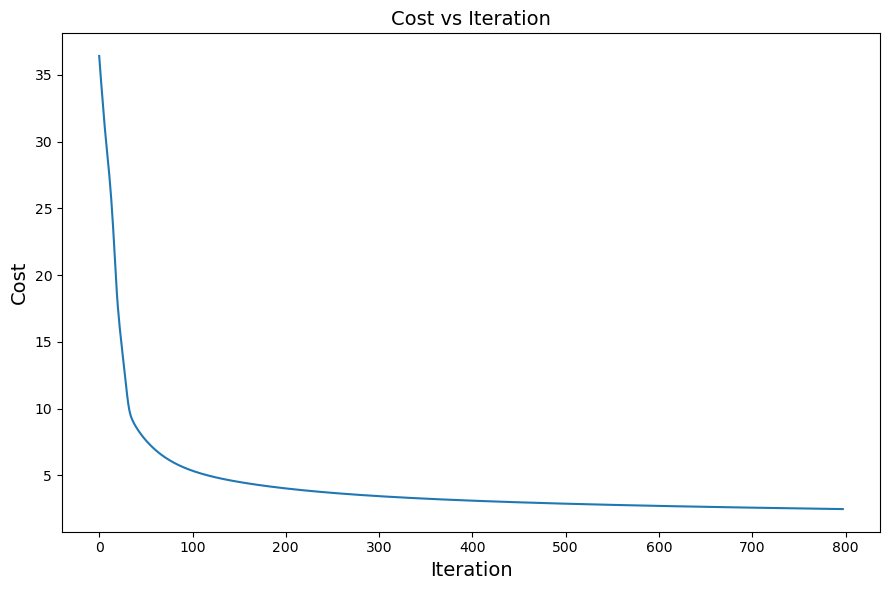

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 71.   5.]
 [  4. 110.]]
Accuracy: 95.26315789473684
Precision: 96.49122807017544
Recall: 93.42105263157895



Threshold taken as 0.4
Confusion Matrix
[[ 71.   4.]
 [  4. 111.]]
Accuracy: 95.78947368421052
Precision: 96.52173913043478
Recall: 94.66666666666667



Threshold taken as 0.5
Confusion Matrix
[[ 71.   3.]
 [  4. 112.]]
Accuracy: 96.3157894736842
Precision: 96.55172413793103
Recall: 95.94594594594594



Threshold taken as 0.6
Confusion Matrix
[[ 70.   2.]
 [  5. 113.]]
Accuracy: 96.3157894736842
Precision: 95.76271186440678
Recall: 97.22222222222221



Threshold taken as 0.7
Confusion Matrix
[[ 70.   1.]
 [  5. 114.]]
Accuracy: 96.84210526315789
Precision: 95.7983193277311
Recall: 98.59154929577466





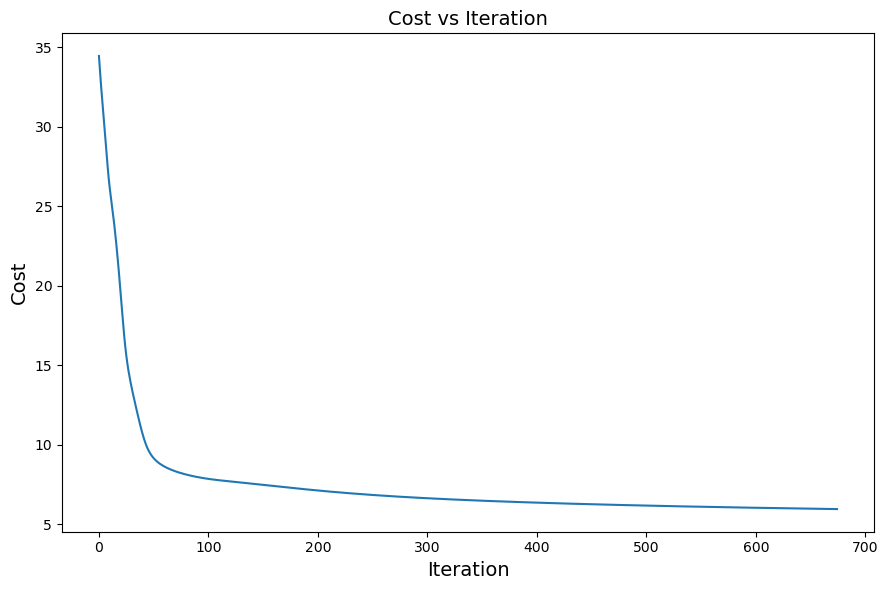

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 77.   5.]
 [  0. 108.]]
Accuracy: 97.36842105263158
Precision: 100.0
Recall: 93.90243902439023



Threshold taken as 0.4
Confusion Matrix
[[ 77.   2.]
 [  0. 111.]]
Accuracy: 98.94736842105263
Precision: 100.0
Recall: 97.46835443037975



Threshold taken as 0.5
Confusion Matrix
[[ 77.   1.]
 [  0. 112.]]
Accuracy: 99.47368421052632
Precision: 100.0
Recall: 98.71794871794873



Threshold taken as 0.6
Confusion Matrix
[[ 77.   0.]
 [  0. 113.]]
Accuracy: 100.0
Precision: 100.0
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 76.   0.]
 [  1. 113.]]
Accuracy: 99.47368421052632
Precision: 99.12280701754386
Recall: 100.0





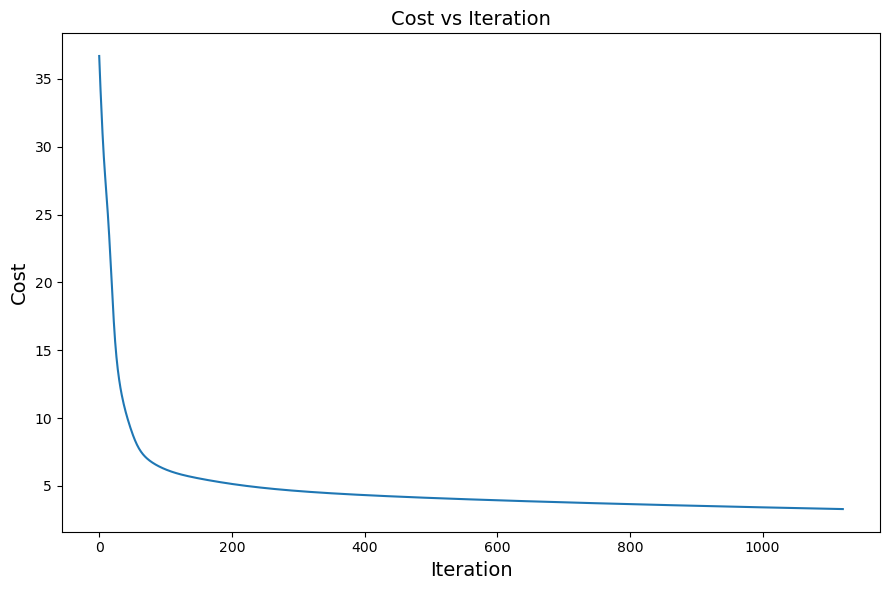

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 70.   6.]
 [  3. 111.]]
Accuracy: 95.26315789473684
Precision: 97.36842105263158
Recall: 92.10526315789474



Threshold taken as 0.4
Confusion Matrix
[[ 70.   5.]
 [  3. 112.]]
Accuracy: 95.78947368421052
Precision: 97.3913043478261
Recall: 93.33333333333333



Threshold taken as 0.5
Confusion Matrix
[[ 69.   2.]
 [  4. 115.]]
Accuracy: 96.84210526315789
Precision: 96.63865546218487
Recall: 97.1830985915493



Threshold taken as 0.6
Confusion Matrix
[[ 69.   1.]
 [  4. 116.]]
Accuracy: 97.36842105263158
Precision: 96.66666666666667
Recall: 98.57142857142858



Threshold taken as 0.7
Confusion Matrix
[[ 67.   1.]
 [  6. 116.]]
Accuracy: 96.3157894736842
Precision: 95.08196721311475
Recall: 98.52941176470588





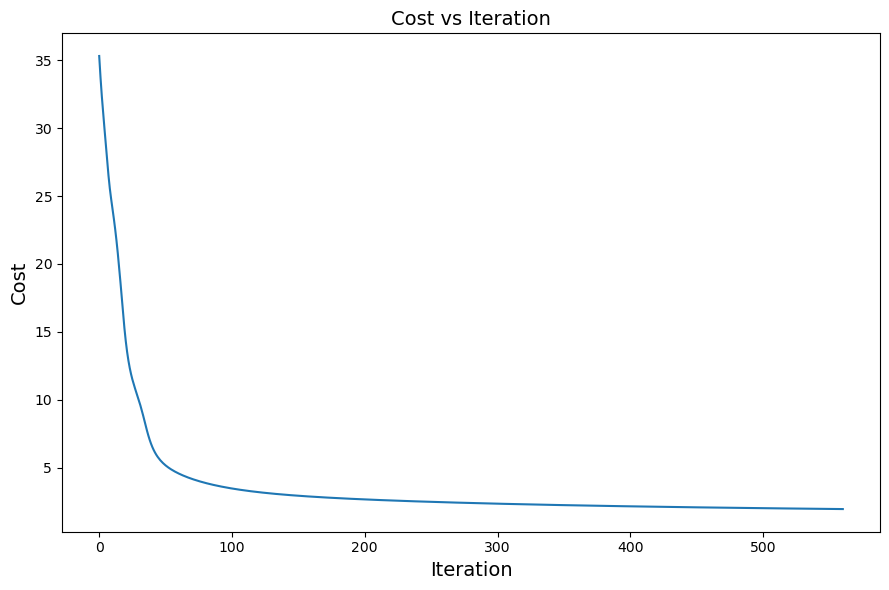

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 66.   5.]
 [  4. 115.]]
Accuracy: 95.26315789473684
Precision: 96.63865546218487
Recall: 92.95774647887323



Threshold taken as 0.4
Confusion Matrix
[[ 66.   4.]
 [  4. 116.]]
Accuracy: 95.78947368421052
Precision: 96.66666666666667
Recall: 94.28571428571428



Threshold taken as 0.5
Confusion Matrix
[[ 66.   3.]
 [  4. 117.]]
Accuracy: 96.3157894736842
Precision: 96.69421487603306
Recall: 95.65217391304348



Threshold taken as 0.6
Confusion Matrix
[[ 65.   2.]
 [  5. 118.]]
Accuracy: 96.3157894736842
Precision: 95.9349593495935
Recall: 97.01492537313433



Threshold taken as 0.7
Confusion Matrix
[[ 65.   2.]
 [  5. 118.]]
Accuracy: 96.3157894736842
Precision: 95.9349593495935
Recall: 97.01492537313433





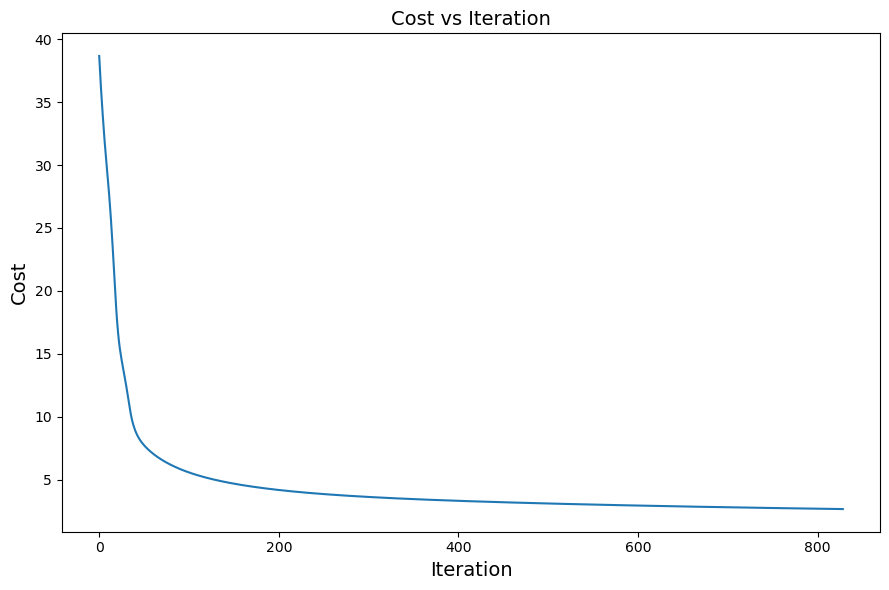

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 67.   0.]
 [  4. 119.]]
Accuracy: 97.89473684210527
Precision: 96.7479674796748
Recall: 100.0



Threshold taken as 0.4
Confusion Matrix
[[ 67.   0.]
 [  4. 119.]]
Accuracy: 97.89473684210527
Precision: 96.7479674796748
Recall: 100.0



Threshold taken as 0.5
Confusion Matrix
[[ 67.   0.]
 [  4. 119.]]
Accuracy: 97.89473684210527
Precision: 96.7479674796748
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 67.   0.]
 [  4. 119.]]
Accuracy: 97.89473684210527
Precision: 96.7479674796748
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 66.   0.]
 [  5. 119.]]
Accuracy: 97.36842105263158
Precision: 95.96774193548387
Recall: 100.0



Accuracy:
 Mean = 97.36842105263159  Standard Deviation = 1.2001846579990956
Precision:
 Mean = 97.32651239116475  Standard Deviation = 1.3383194199400108
Recall:
 Mean = 97.49983343369749  Standard Deviation = 1.6530801973327385


In [113]:
# BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,0)
    
    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

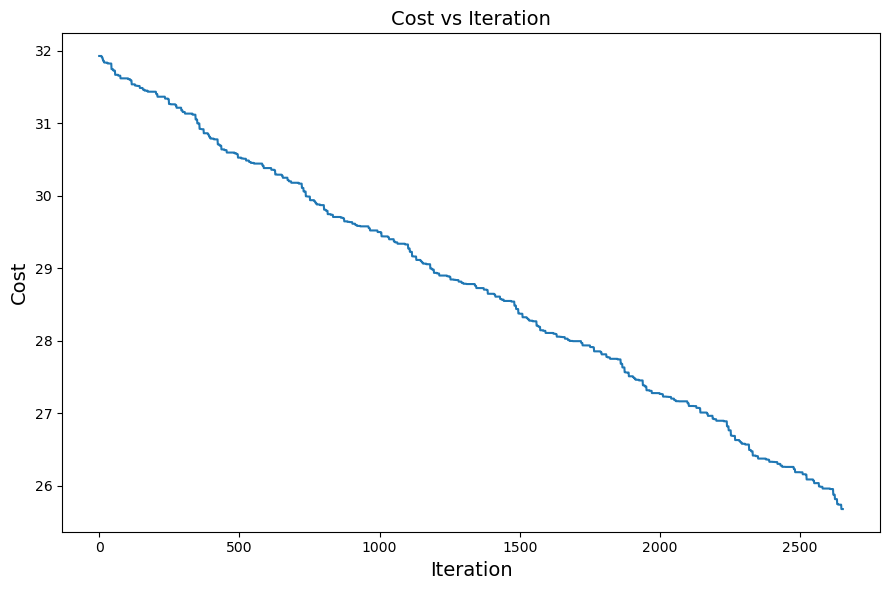

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 64.  17.]
 [  9. 100.]]
Accuracy: 86.31578947368422
Precision: 91.74311926605505
Recall: 79.01234567901234



Threshold taken as 0.4
Confusion Matrix
[[ 64.  15.]
 [  9. 102.]]
Accuracy: 87.36842105263159
Precision: 91.8918918918919
Recall: 81.0126582278481



Threshold taken as 0.5
Confusion Matrix
[[ 64.  15.]
 [  9. 102.]]
Accuracy: 87.36842105263159
Precision: 91.8918918918919
Recall: 81.0126582278481



Threshold taken as 0.6
Confusion Matrix
[[ 64.  13.]
 [  9. 104.]]
Accuracy: 88.42105263157895
Precision: 92.03539823008849
Recall: 83.11688311688312



Threshold taken as 0.7
Confusion Matrix
[[ 64.  12.]
 [  9. 105.]]
Accuracy: 88.94736842105263
Precision: 92.10526315789474
Recall: 84.21052631578947





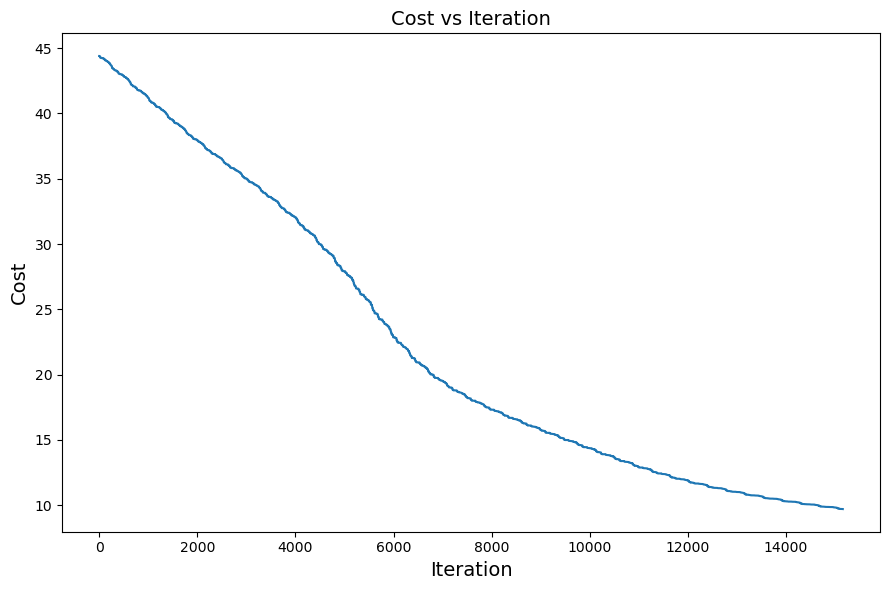

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 64.   6.]
 [  1. 119.]]
Accuracy: 96.3157894736842
Precision: 99.16666666666667
Recall: 91.42857142857143



Threshold taken as 0.4
Confusion Matrix
[[ 63.   5.]
 [  2. 120.]]
Accuracy: 96.3157894736842
Precision: 98.36065573770492
Recall: 92.64705882352942



Threshold taken as 0.5
Confusion Matrix
[[ 63.   4.]
 [  2. 121.]]
Accuracy: 96.84210526315789
Precision: 98.3739837398374
Recall: 94.02985074626866



Threshold taken as 0.6
Confusion Matrix
[[ 62.   4.]
 [  3. 121.]]
Accuracy: 96.3157894736842
Precision: 97.58064516129032
Recall: 93.93939393939394



Threshold taken as 0.7
Confusion Matrix
[[ 62.   2.]
 [  3. 123.]]
Accuracy: 97.36842105263158
Precision: 97.61904761904762
Recall: 96.875





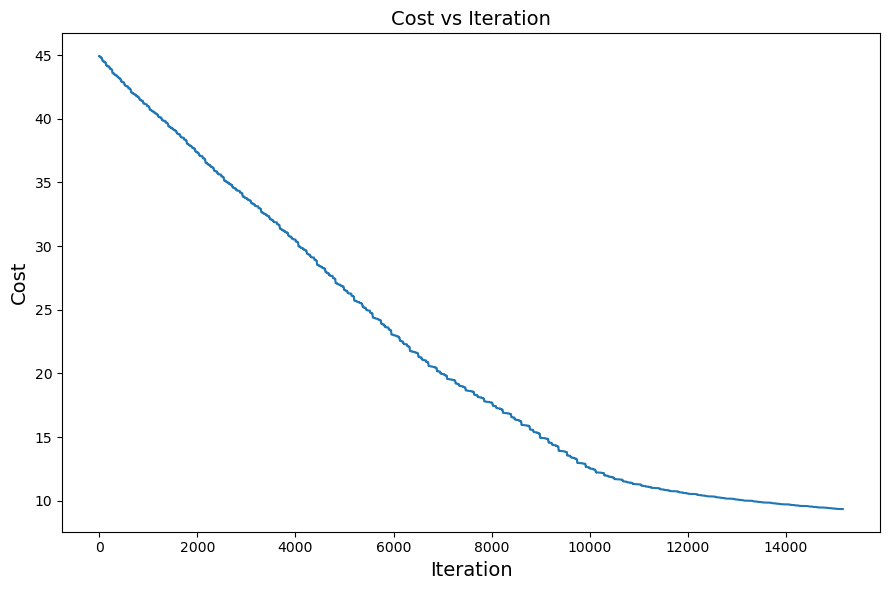

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 61.   4.]
 [  1. 124.]]
Accuracy: 97.36842105263158
Precision: 99.2
Recall: 93.84615384615384



Threshold taken as 0.4
Confusion Matrix
[[ 61.   4.]
 [  1. 124.]]
Accuracy: 97.36842105263158
Precision: 99.2
Recall: 93.84615384615384



Threshold taken as 0.5
Confusion Matrix
[[ 61.   3.]
 [  1. 125.]]
Accuracy: 97.89473684210527
Precision: 99.20634920634922
Recall: 95.3125



Threshold taken as 0.6
Confusion Matrix
[[ 60.   2.]
 [  2. 126.]]
Accuracy: 97.89473684210527
Precision: 98.4375
Recall: 96.7741935483871



Threshold taken as 0.7
Confusion Matrix
[[ 58.   1.]
 [  4. 127.]]
Accuracy: 97.36842105263158
Precision: 96.94656488549617
Recall: 98.30508474576271





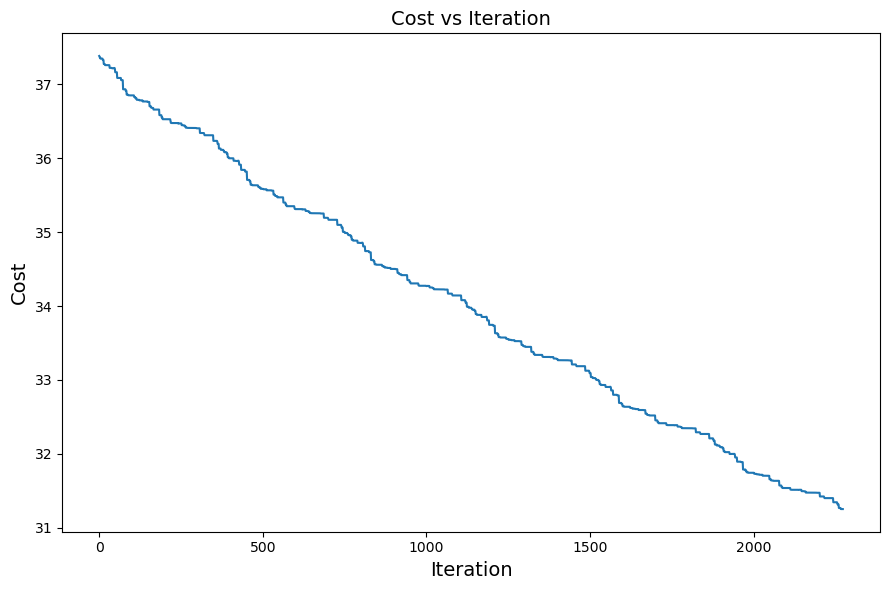

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 66.  15.]
 [  5. 104.]]
Accuracy: 89.47368421052632
Precision: 95.41284403669725
Recall: 81.48148148148148



Threshold taken as 0.4
Confusion Matrix
[[ 66.  13.]
 [  5. 106.]]
Accuracy: 90.52631578947368
Precision: 95.4954954954955
Recall: 83.54430379746836



Threshold taken as 0.5
Confusion Matrix
[[ 66.  13.]
 [  5. 106.]]
Accuracy: 90.52631578947368
Precision: 95.4954954954955
Recall: 83.54430379746836



Threshold taken as 0.6
Confusion Matrix
[[ 66.  12.]
 [  5. 107.]]
Accuracy: 91.05263157894737
Precision: 95.53571428571429
Recall: 84.61538461538461



Threshold taken as 0.7
Confusion Matrix
[[ 66.  11.]
 [  5. 108.]]
Accuracy: 91.57894736842105
Precision: 95.57522123893806
Recall: 85.71428571428571





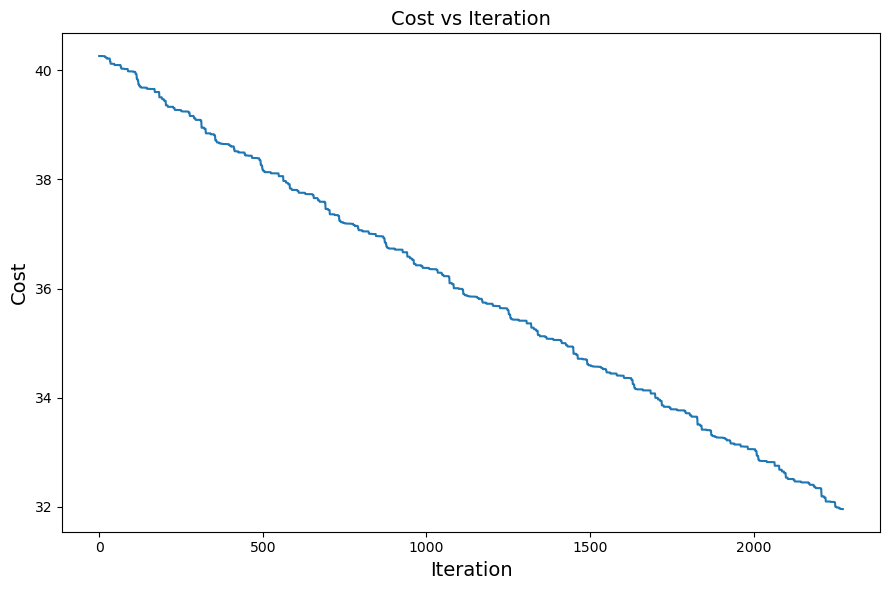

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 66.   9.]
 [  7. 108.]]
Accuracy: 91.57894736842105
Precision: 93.91304347826087
Recall: 88.0



Threshold taken as 0.4
Confusion Matrix
[[ 66.   9.]
 [  7. 108.]]
Accuracy: 91.57894736842105
Precision: 93.91304347826087
Recall: 88.0



Threshold taken as 0.5
Confusion Matrix
[[ 66.   8.]
 [  7. 109.]]
Accuracy: 92.10526315789474
Precision: 93.96551724137932
Recall: 89.1891891891892



Threshold taken as 0.6
Confusion Matrix
[[ 66.   8.]
 [  7. 109.]]
Accuracy: 92.10526315789474
Precision: 93.96551724137932
Recall: 89.1891891891892



Threshold taken as 0.7
Confusion Matrix
[[ 66.   8.]
 [  7. 109.]]
Accuracy: 92.10526315789474
Precision: 93.96551724137932
Recall: 89.1891891891892



Accuracy:
 Mean = 92.94736842105263  Standard Deviation = 3.9329561457409254
Precision:
 Mean = 95.78664751499068  Standard Deviation = 2.7187892428014346
Recall:
 Mean = 88.61770039215487  Standard Deviation = 5.62164267839452


In [169]:
# STOCHASTIC GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_stochastic(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,0)
    
    #Plot Graph
    #print(f"{error}")
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

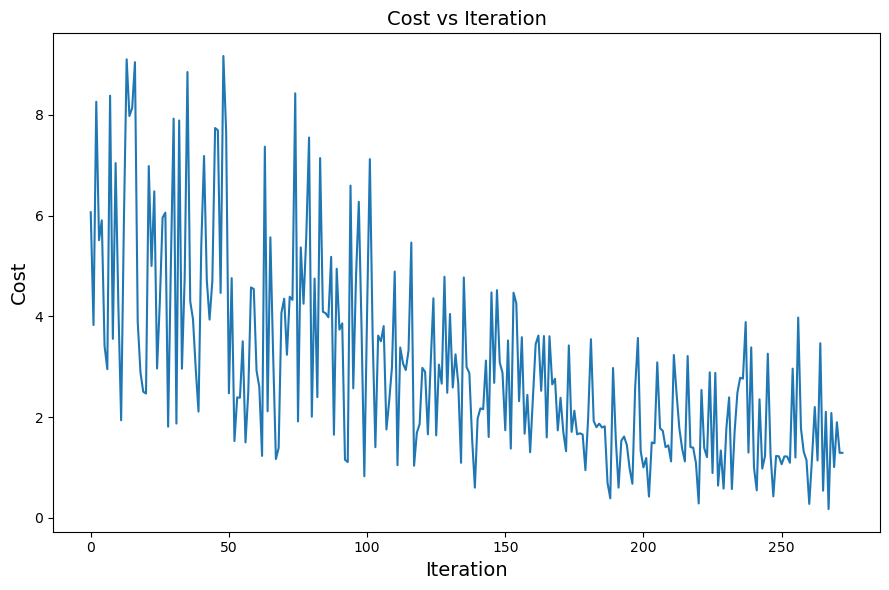

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 78.   4.]
 [  1. 107.]]
Accuracy: 97.36842105263158
Precision: 99.07407407407408
Recall: 95.1219512195122



Threshold taken as 0.4
Confusion Matrix
[[ 78.   3.]
 [  1. 108.]]
Accuracy: 97.89473684210527
Precision: 99.08256880733946
Recall: 96.29629629629629



Threshold taken as 0.5
Confusion Matrix
[[ 77.   3.]
 [  2. 108.]]
Accuracy: 97.36842105263158
Precision: 98.18181818181819
Recall: 96.25



Threshold taken as 0.6
Confusion Matrix
[[ 76.   2.]
 [  3. 109.]]
Accuracy: 97.36842105263158
Precision: 97.32142857142857
Recall: 97.43589743589743



Threshold taken as 0.7
Confusion Matrix
[[ 76.   2.]
 [  3. 109.]]
Accuracy: 97.36842105263158
Precision: 97.32142857142857
Recall: 97.43589743589743





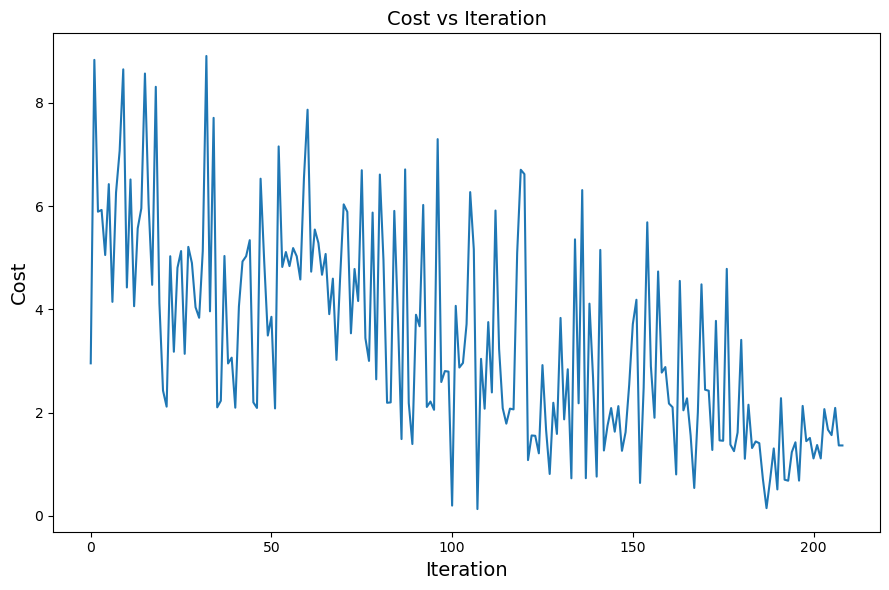

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 79.   4.]
 [  1. 106.]]
Accuracy: 97.36842105263158
Precision: 99.06542056074767
Recall: 95.18072289156626



Threshold taken as 0.4
Confusion Matrix
[[ 79.   4.]
 [  1. 106.]]
Accuracy: 97.36842105263158
Precision: 99.06542056074767
Recall: 95.18072289156626



Threshold taken as 0.5
Confusion Matrix
[[ 79.   4.]
 [  1. 106.]]
Accuracy: 97.36842105263158
Precision: 99.06542056074767
Recall: 95.18072289156626



Threshold taken as 0.6
Confusion Matrix
[[ 76.   4.]
 [  4. 106.]]
Accuracy: 95.78947368421052
Precision: 96.36363636363636
Recall: 95.0



Threshold taken as 0.7
Confusion Matrix
[[ 75.   3.]
 [  5. 107.]]
Accuracy: 95.78947368421052
Precision: 95.53571428571429
Recall: 96.15384615384616





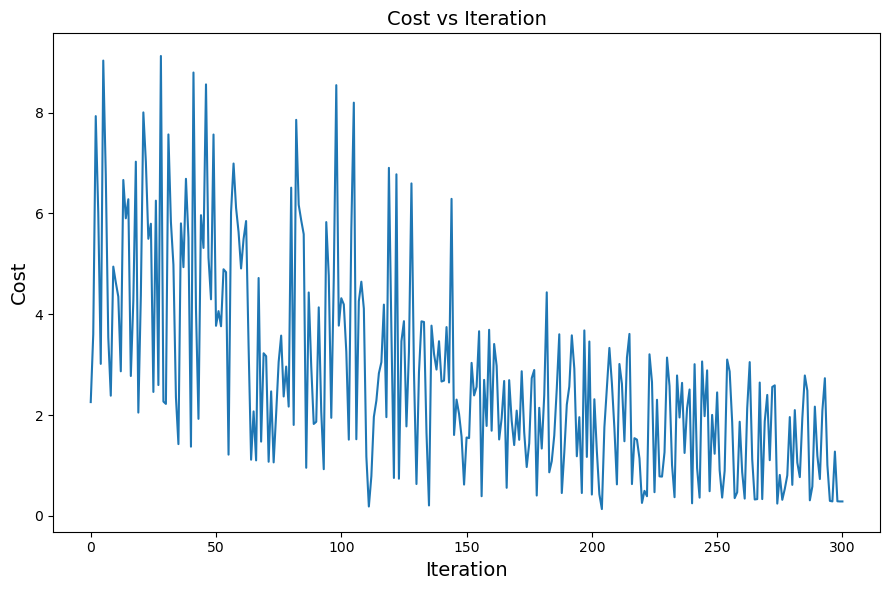

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 73.   3.]
 [  2. 112.]]
Accuracy: 97.36842105263158
Precision: 98.24561403508771
Recall: 96.05263157894737



Threshold taken as 0.4
Confusion Matrix
[[ 73.   3.]
 [  2. 112.]]
Accuracy: 97.36842105263158
Precision: 98.24561403508771
Recall: 96.05263157894737



Threshold taken as 0.5
Confusion Matrix
[[ 73.   2.]
 [  2. 113.]]
Accuracy: 97.89473684210527
Precision: 98.26086956521739
Recall: 97.33333333333334



Threshold taken as 0.6
Confusion Matrix
[[ 73.   1.]
 [  2. 114.]]
Accuracy: 98.42105263157895
Precision: 98.27586206896551
Recall: 98.64864864864865



Threshold taken as 0.7
Confusion Matrix
[[ 72.   1.]
 [  3. 114.]]
Accuracy: 97.89473684210527
Precision: 97.43589743589743
Recall: 98.63013698630137





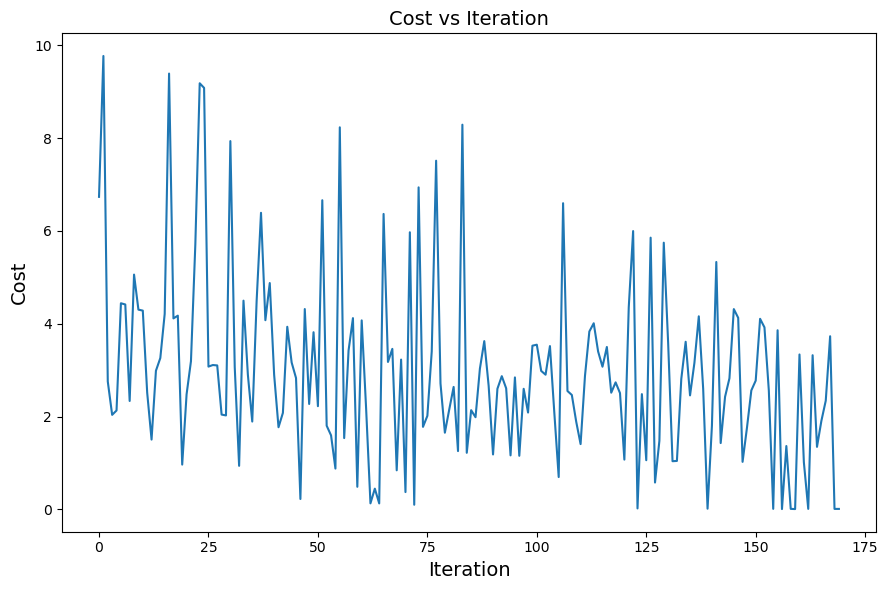

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[74. 17.]
 [ 3. 96.]]
Accuracy: 89.47368421052632
Precision: 96.96969696969697
Recall: 81.31868131868131



Threshold taken as 0.4
Confusion Matrix
[[74. 15.]
 [ 3. 98.]]
Accuracy: 90.52631578947368
Precision: 97.02970297029702
Recall: 83.14606741573034



Threshold taken as 0.5
Confusion Matrix
[[73. 15.]
 [ 4. 98.]]
Accuracy: 90.0
Precision: 96.07843137254902
Recall: 82.95454545454545



Threshold taken as 0.6
Confusion Matrix
[[ 72.  12.]
 [  5. 101.]]
Accuracy: 91.05263157894737
Precision: 95.28301886792453
Recall: 85.71428571428571



Threshold taken as 0.7
Confusion Matrix
[[ 71.  11.]
 [  6. 102.]]
Accuracy: 91.05263157894737
Precision: 94.44444444444444
Recall: 86.58536585365853





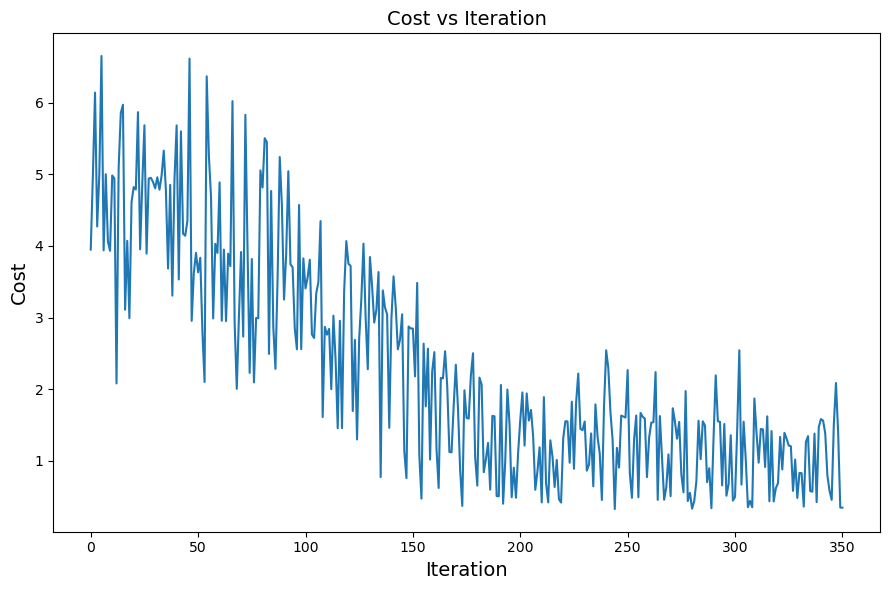

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 73.   4.]
 [  2. 111.]]
Accuracy: 96.84210526315789
Precision: 98.23008849557522
Recall: 94.8051948051948



Threshold taken as 0.4
Confusion Matrix
[[ 72.   4.]
 [  3. 111.]]
Accuracy: 96.3157894736842
Precision: 97.36842105263158
Recall: 94.73684210526315



Threshold taken as 0.5
Confusion Matrix
[[ 72.   3.]
 [  3. 112.]]
Accuracy: 96.84210526315789
Precision: 97.3913043478261
Recall: 96.0



Threshold taken as 0.6
Confusion Matrix
[[ 71.   3.]
 [  4. 112.]]
Accuracy: 96.3157894736842
Precision: 96.55172413793103
Recall: 95.94594594594594



Threshold taken as 0.7
Confusion Matrix
[[ 70.   2.]
 [  5. 113.]]
Accuracy: 96.3157894736842
Precision: 95.76271186440678
Recall: 97.22222222222221



Accuracy:
 Mean = 95.89473684210527  Standard Deviation = 2.966105853390605
Precision:
 Mean = 97.79556880563166  Standard Deviation = 1.0089804332478618
Recall:
 Mean = 93.543720335889  Standard Deviation = 5.339079098759937


In [124]:
# MINI BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_mini_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,50,max_error,0)

    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold ==0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold +=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

## LR 2 with Learning Rate = 0.0001 all 3 models and all 5 thresholds

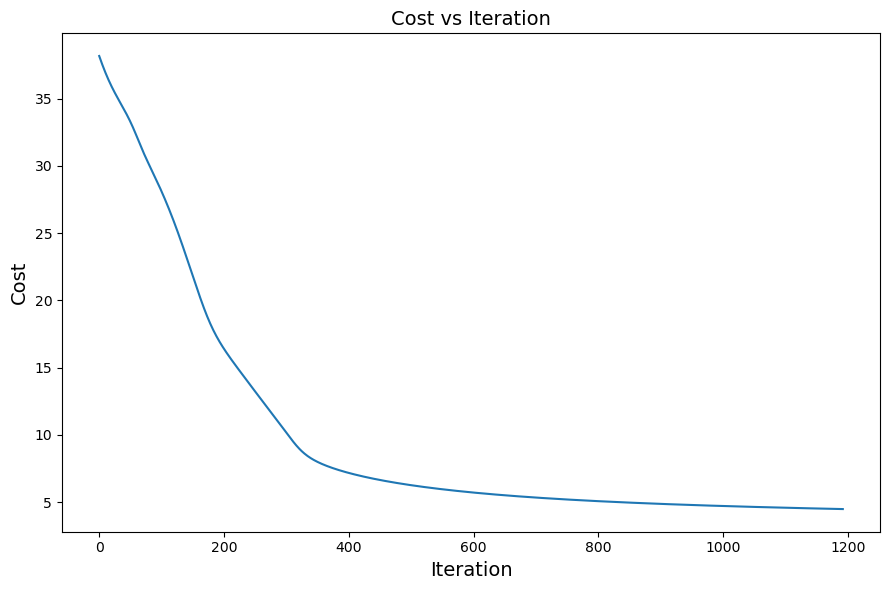

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 75.   5.]
 [  3. 107.]]
Accuracy: 95.78947368421052
Precision: 97.27272727272728
Recall: 93.75



Threshold taken as 0.4
Confusion Matrix
[[ 75.   4.]
 [  3. 108.]]
Accuracy: 96.3157894736842
Precision: 97.2972972972973
Recall: 94.9367088607595



Threshold taken as 0.5
Confusion Matrix
[[ 75.   3.]
 [  3. 109.]]
Accuracy: 96.84210526315789
Precision: 97.32142857142857
Recall: 96.15384615384616



Threshold taken as 0.6
Confusion Matrix
[[ 74.   3.]
 [  4. 109.]]
Accuracy: 96.3157894736842
Precision: 96.46017699115043
Recall: 96.1038961038961



Threshold taken as 0.7
Confusion Matrix
[[ 73.   3.]
 [  5. 109.]]
Accuracy: 95.78947368421052
Precision: 95.6140350877193
Recall: 96.05263157894737





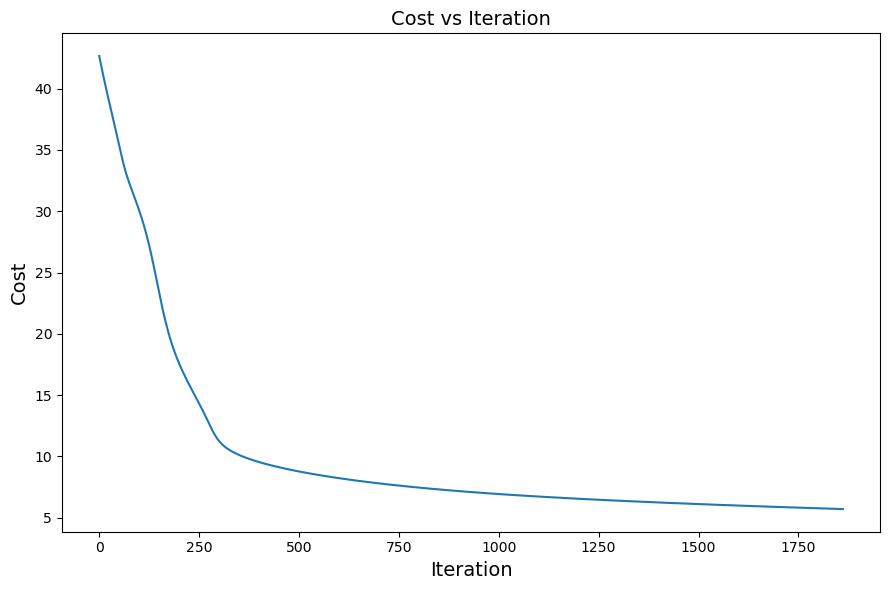

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 70.   3.]
 [  2. 115.]]
Accuracy: 97.36842105263158
Precision: 98.29059829059828
Recall: 95.8904109589041



Threshold taken as 0.4
Confusion Matrix
[[ 70.   2.]
 [  2. 116.]]
Accuracy: 97.89473684210527
Precision: 98.30508474576271
Recall: 97.22222222222221



Threshold taken as 0.5
Confusion Matrix
[[ 70.   0.]
 [  2. 118.]]
Accuracy: 98.94736842105263
Precision: 98.33333333333333
Recall: 100.0



Threshold taken as 0.6
Confusion Matrix
[[ 70.   0.]
 [  2. 118.]]
Accuracy: 98.94736842105263
Precision: 98.33333333333333
Recall: 100.0



Threshold taken as 0.7
Confusion Matrix
[[ 68.   0.]
 [  4. 118.]]
Accuracy: 97.89473684210527
Precision: 96.72131147540983
Recall: 100.0





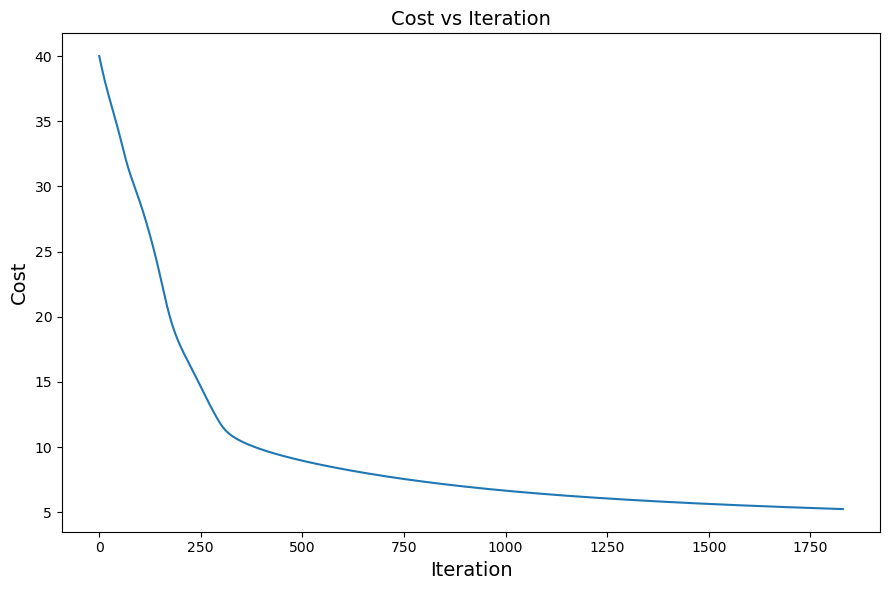

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 68.   3.]
 [  2. 117.]]
Accuracy: 97.36842105263158
Precision: 98.31932773109243
Recall: 95.77464788732394



Threshold taken as 0.4
Confusion Matrix
[[ 68.   2.]
 [  2. 118.]]
Accuracy: 97.89473684210527
Precision: 98.33333333333333
Recall: 97.14285714285714



Threshold taken as 0.5
Confusion Matrix
[[ 68.   2.]
 [  2. 118.]]
Accuracy: 97.89473684210527
Precision: 98.33333333333333
Recall: 97.14285714285714



Threshold taken as 0.6
Confusion Matrix
[[ 68.   1.]
 [  2. 119.]]
Accuracy: 98.42105263157895
Precision: 98.34710743801654
Recall: 98.55072463768117



Threshold taken as 0.7
Confusion Matrix
[[ 67.   1.]
 [  3. 119.]]
Accuracy: 97.89473684210527
Precision: 97.54098360655738
Recall: 98.52941176470588





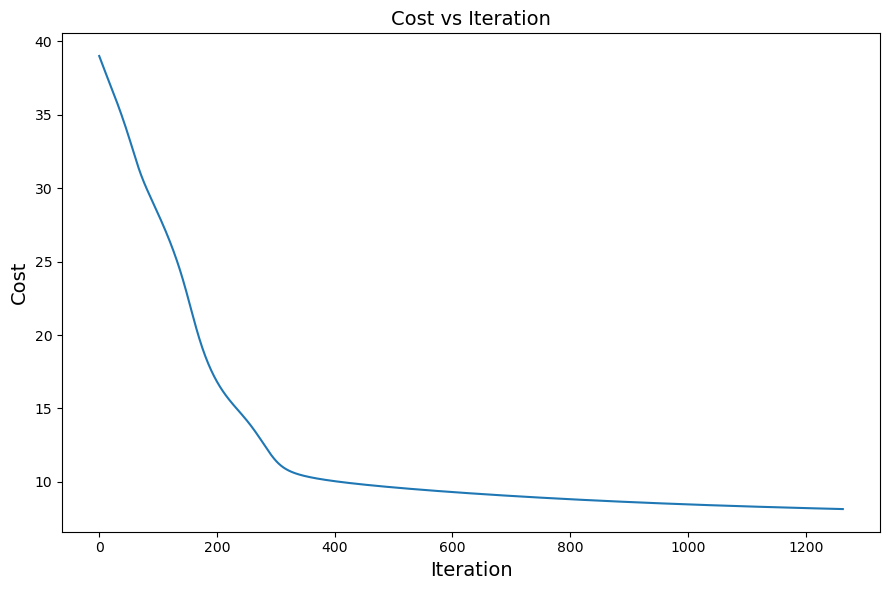

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 60.   7.]
 [  0. 123.]]
Accuracy: 96.3157894736842
Precision: 100.0
Recall: 89.55223880597015



Threshold taken as 0.4
Confusion Matrix
[[ 60.   5.]
 [  0. 125.]]
Accuracy: 97.36842105263158
Precision: 100.0
Recall: 92.3076923076923



Threshold taken as 0.5
Confusion Matrix
[[ 60.   3.]
 [  0. 127.]]
Accuracy: 98.42105263157895
Precision: 100.0
Recall: 95.23809523809523



Threshold taken as 0.6
Confusion Matrix
[[ 60.   1.]
 [  0. 129.]]
Accuracy: 99.47368421052632
Precision: 100.0
Recall: 98.36065573770492



Threshold taken as 0.7
Confusion Matrix
[[ 60.   0.]
 [  0. 130.]]
Accuracy: 100.0
Precision: 100.0
Recall: 100.0





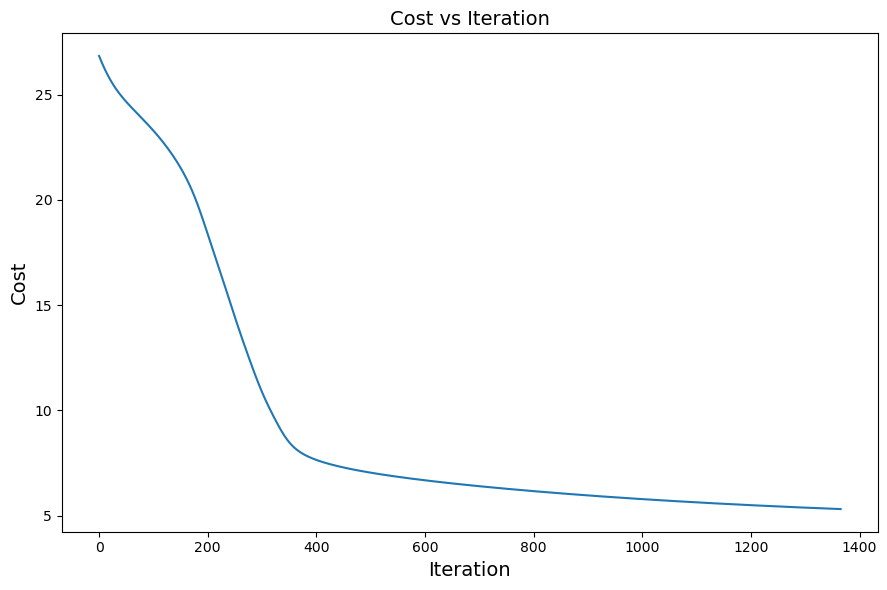

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 71.   7.]
 [  3. 109.]]
Accuracy: 94.73684210526315
Precision: 97.32142857142857
Recall: 91.02564102564102



Threshold taken as 0.4
Confusion Matrix
[[ 71.   6.]
 [  3. 110.]]
Accuracy: 95.26315789473684
Precision: 97.34513274336283
Recall: 92.20779220779221



Threshold taken as 0.5
Confusion Matrix
[[ 71.   4.]
 [  3. 112.]]
Accuracy: 96.3157894736842
Precision: 97.3913043478261
Recall: 94.66666666666667



Threshold taken as 0.6
Confusion Matrix
[[ 69.   2.]
 [  5. 114.]]
Accuracy: 96.3157894736842
Precision: 95.7983193277311
Recall: 97.1830985915493



Threshold taken as 0.7
Confusion Matrix
[[ 69.   2.]
 [  5. 114.]]
Accuracy: 96.3157894736842
Precision: 95.7983193277311
Recall: 97.1830985915493



Accuracy:
 Mean = 97.6842105263158  Standard Deviation = 0.9761703679469182
Precision:
 Mean = 98.27587991718426  Standard Deviation = 0.9667102109053286
Recall:
 Mean = 96.64029304029305  Standard Deviation = 1.8782008329667652


In [114]:
# BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.0001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,0)
    
    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

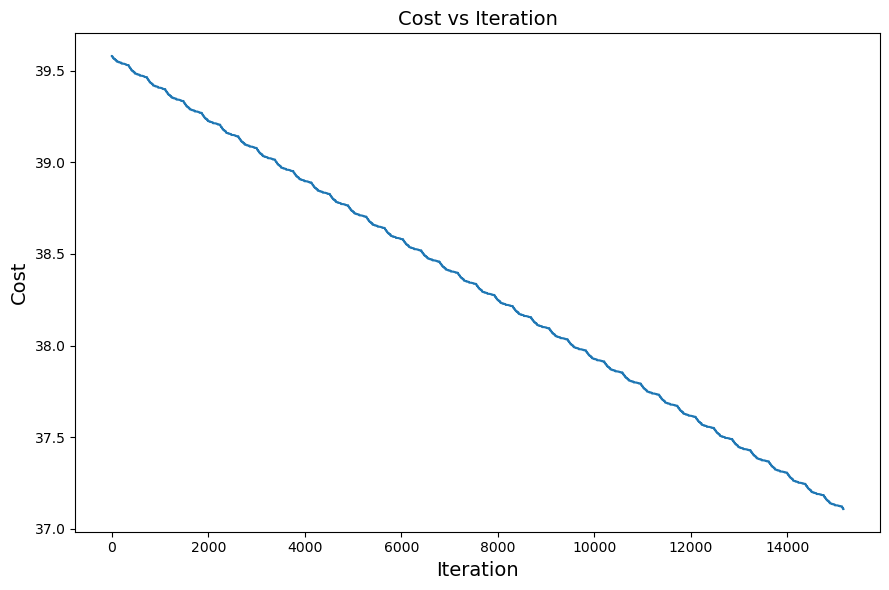

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[ 60.  15.]
 [  3. 112.]]
Accuracy: 90.52631578947368
Precision: 97.3913043478261
Recall: 80.0



Threshold taken as 0.4
Confusion Matrix
[[ 60.  13.]
 [  3. 114.]]
Accuracy: 91.57894736842105
Precision: 97.43589743589743
Recall: 82.1917808219178



Threshold taken as 0.5
Confusion Matrix
[[ 60.  12.]
 [  3. 115.]]
Accuracy: 92.10526315789474
Precision: 97.45762711864407
Recall: 83.33333333333334



Threshold taken as 0.6
Confusion Matrix
[[ 58.  11.]
 [  5. 116.]]
Accuracy: 91.57894736842105
Precision: 95.86776859504133
Recall: 84.05797101449275



Threshold taken as 0.7
Confusion Matrix
[[ 57.   9.]
 [  6. 118.]]
Accuracy: 92.10526315789474
Precision: 95.16129032258065
Recall: 86.36363636363636





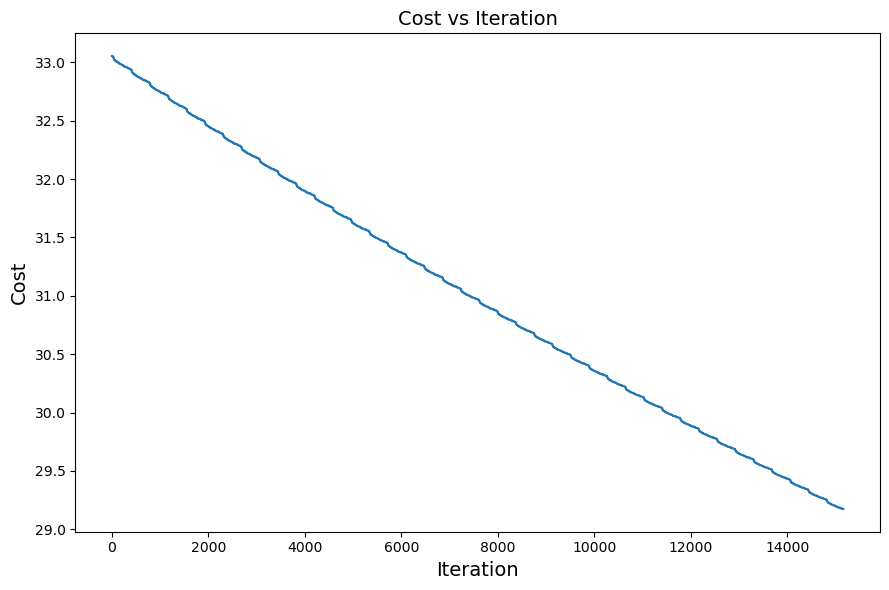

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 65.  16.]
 [  8. 101.]]
Accuracy: 87.36842105263159
Precision: 92.66055045871559
Recall: 80.24691358024691



Threshold taken as 0.4
Confusion Matrix
[[ 65.  15.]
 [  8. 102.]]
Accuracy: 87.89473684210526
Precision: 92.72727272727272
Recall: 81.25



Threshold taken as 0.5
Confusion Matrix
[[ 65.  15.]
 [  8. 102.]]
Accuracy: 87.89473684210526
Precision: 92.72727272727272
Recall: 81.25



Threshold taken as 0.6
Confusion Matrix
[[ 64.  15.]
 [  9. 102.]]
Accuracy: 87.36842105263159
Precision: 91.8918918918919
Recall: 81.0126582278481



Threshold taken as 0.7
Confusion Matrix
[[ 64.  14.]
 [  9. 103.]]
Accuracy: 87.89473684210526
Precision: 91.96428571428571
Recall: 82.05128205128204





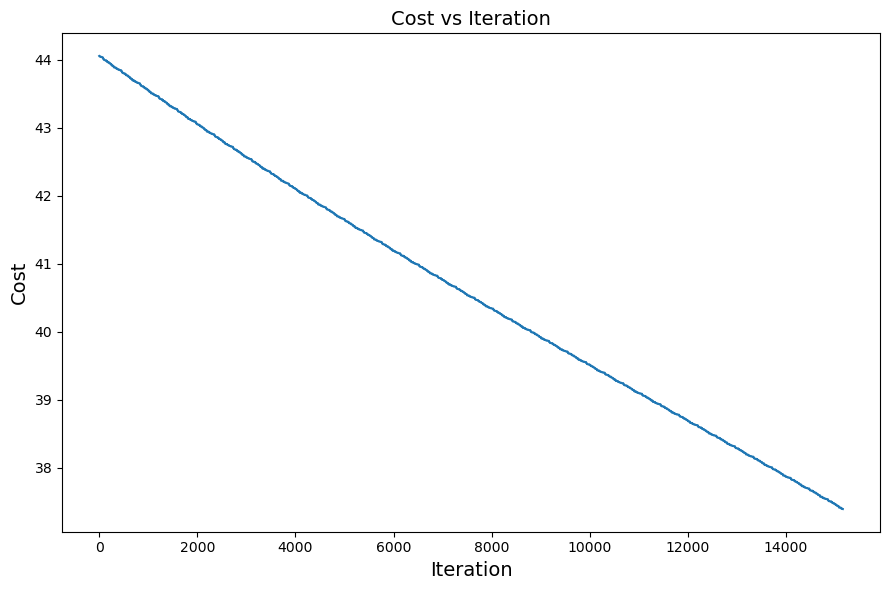

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 61.   9.]
 [  4. 116.]]
Accuracy: 93.15789473684211
Precision: 96.66666666666667
Recall: 87.14285714285714



Threshold taken as 0.4
Confusion Matrix
[[ 61.   8.]
 [  4. 117.]]
Accuracy: 93.6842105263158
Precision: 96.69421487603306
Recall: 88.40579710144928



Threshold taken as 0.5
Confusion Matrix
[[ 61.   8.]
 [  4. 117.]]
Accuracy: 93.6842105263158
Precision: 96.69421487603306
Recall: 88.40579710144928



Threshold taken as 0.6
Confusion Matrix
[[ 61.   8.]
 [  4. 117.]]
Accuracy: 93.6842105263158
Precision: 96.69421487603306
Recall: 88.40579710144928



Threshold taken as 0.7
Confusion Matrix
[[ 61.   8.]
 [  4. 117.]]
Accuracy: 93.6842105263158
Precision: 96.69421487603306
Recall: 88.40579710144928





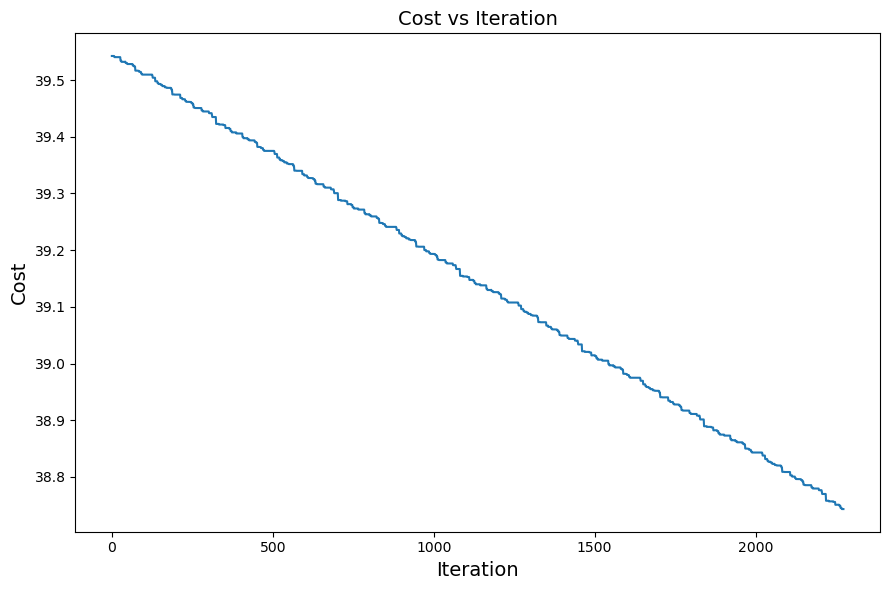

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 66.  15.]
 [  5. 104.]]
Accuracy: 89.47368421052632
Precision: 95.41284403669725
Recall: 81.48148148148148



Threshold taken as 0.4
Confusion Matrix
[[ 65.  12.]
 [  6. 107.]]
Accuracy: 90.52631578947368
Precision: 94.69026548672566
Recall: 84.4155844155844



Threshold taken as 0.5
Confusion Matrix
[[ 65.  12.]
 [  6. 107.]]
Accuracy: 90.52631578947368
Precision: 94.69026548672566
Recall: 84.4155844155844



Threshold taken as 0.6
Confusion Matrix
[[ 65.  11.]
 [  6. 108.]]
Accuracy: 91.05263157894737
Precision: 94.73684210526315
Recall: 85.52631578947368



Threshold taken as 0.7
Confusion Matrix
[[ 65.  11.]
 [  6. 108.]]
Accuracy: 91.05263157894737
Precision: 94.73684210526315
Recall: 85.52631578947368





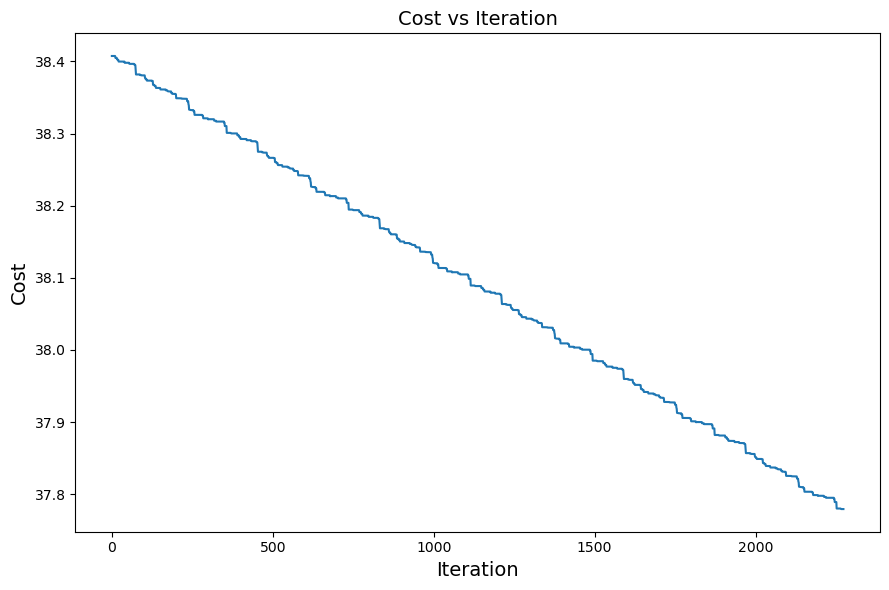

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[73. 11.]
 [ 9. 97.]]
Accuracy: 89.47368421052632
Precision: 91.50943396226415
Recall: 86.90476190476191



Threshold taken as 0.4
Confusion Matrix
[[72. 11.]
 [10. 97.]]
Accuracy: 88.94736842105263
Precision: 90.65420560747664
Recall: 86.74698795180723



Threshold taken as 0.5
Confusion Matrix
[[72. 10.]
 [10. 98.]]
Accuracy: 89.47368421052632
Precision: 90.74074074074075
Recall: 87.8048780487805



Threshold taken as 0.6
Confusion Matrix
[[72. 10.]
 [10. 98.]]
Accuracy: 89.47368421052632
Precision: 90.74074074074075
Recall: 87.8048780487805



Threshold taken as 0.7
Confusion Matrix
[[ 72.   8.]
 [ 10. 100.]]
Accuracy: 90.52631578947368
Precision: 90.9090909090909
Recall: 90.0



Accuracy:
 Mean = 90.73684210526315  Standard Deviation = 2.0138027862851597
Precision:
 Mean = 94.46202418988325  Standard Deviation = 2.4845812283606246
Recall:
 Mean = 85.04191857982951  Standard Deviation = 2.707021547058019


In [15]:
# STOCHASTIC GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.0001
    
    # Error Parameter
    max_error = 0.0001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_stochastic(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,max_error,0)
    
    #Plot Graph
    #print(f"{error}")
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold == 0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold+=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

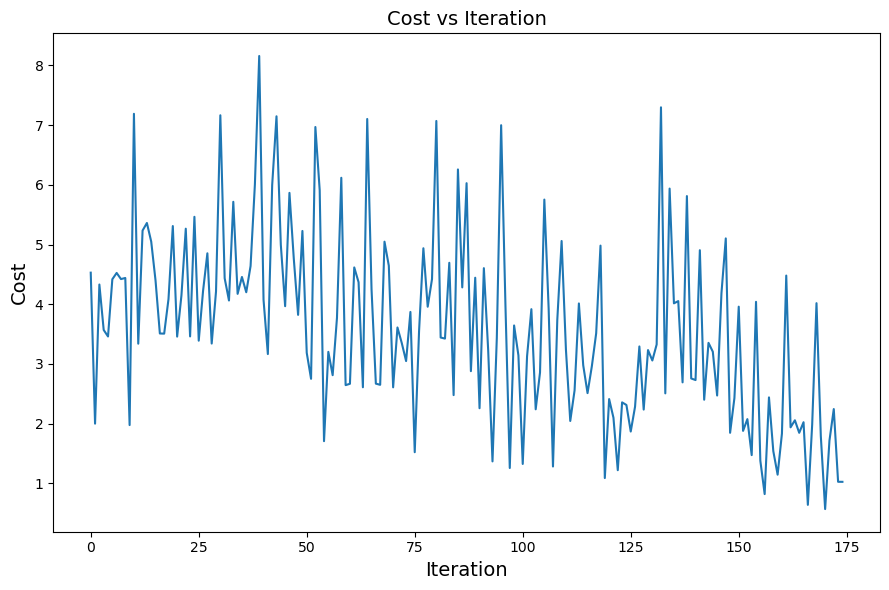

Model No.1

Threshold taken as 0.3
Confusion Matrix
[[80.  9.]
 [ 2. 99.]]
Accuracy: 94.21052631578948
Precision: 98.01980198019803
Recall: 89.8876404494382



Threshold taken as 0.4
Confusion Matrix
[[ 79.   8.]
 [  3. 100.]]
Accuracy: 94.21052631578948
Precision: 97.0873786407767
Recall: 90.80459770114942



Threshold taken as 0.5
Confusion Matrix
[[ 79.   8.]
 [  3. 100.]]
Accuracy: 94.21052631578948
Precision: 97.0873786407767
Recall: 90.80459770114942



Threshold taken as 0.6
Confusion Matrix
[[ 77.   7.]
 [  5. 101.]]
Accuracy: 93.6842105263158
Precision: 95.28301886792453
Recall: 91.66666666666666



Threshold taken as 0.7
Confusion Matrix
[[ 77.   5.]
 [  5. 103.]]
Accuracy: 94.73684210526315
Precision: 95.37037037037037
Recall: 93.90243902439023





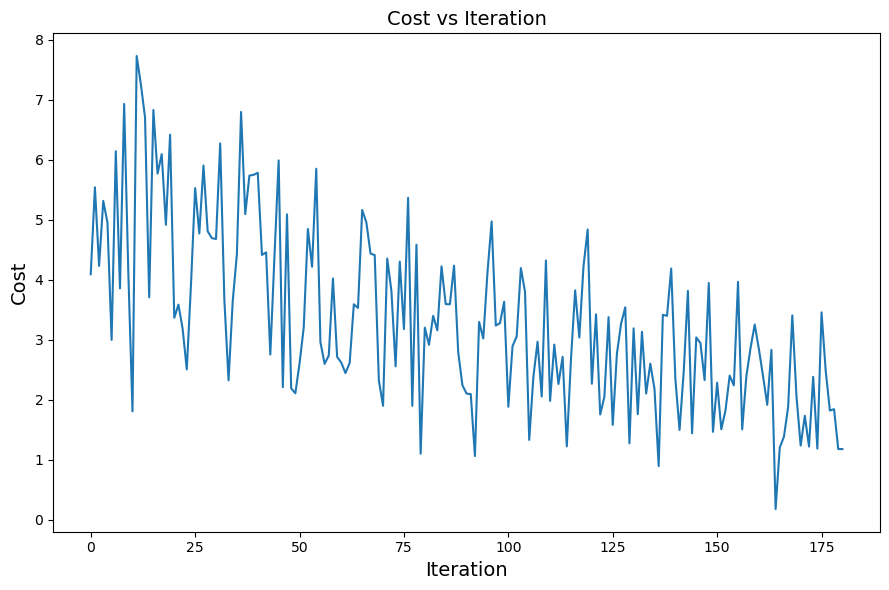

Model No.2

Threshold taken as 0.3
Confusion Matrix
[[ 69.   9.]
 [  4. 108.]]
Accuracy: 93.15789473684211
Precision: 96.42857142857143
Recall: 88.46153846153845



Threshold taken as 0.4
Confusion Matrix
[[ 69.   7.]
 [  4. 110.]]
Accuracy: 94.21052631578948
Precision: 96.49122807017544
Recall: 90.78947368421053



Threshold taken as 0.5
Confusion Matrix
[[ 69.   5.]
 [  4. 112.]]
Accuracy: 95.26315789473684
Precision: 96.55172413793103
Recall: 93.24324324324324



Threshold taken as 0.6
Confusion Matrix
[[ 67.   5.]
 [  6. 112.]]
Accuracy: 94.21052631578948
Precision: 94.91525423728814
Recall: 93.05555555555556



Threshold taken as 0.7
Confusion Matrix
[[ 67.   4.]
 [  6. 113.]]
Accuracy: 94.73684210526315
Precision: 94.9579831932773
Recall: 94.36619718309859





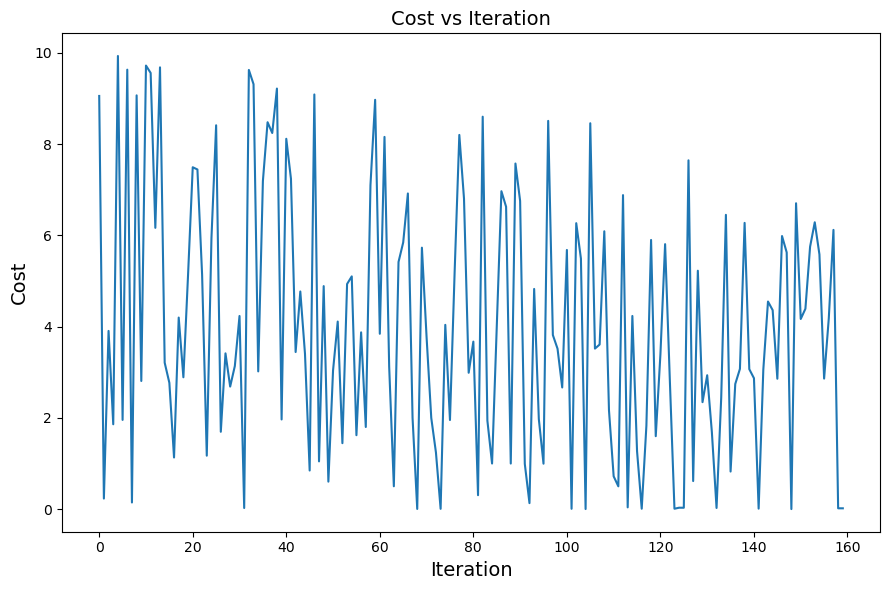

Model No.3

Threshold taken as 0.3
Confusion Matrix
[[ 58.   4.]
 [  3. 125.]]
Accuracy: 96.3157894736842
Precision: 97.65625
Recall: 93.54838709677419



Threshold taken as 0.4
Confusion Matrix
[[ 58.   2.]
 [  3. 127.]]
Accuracy: 97.36842105263158
Precision: 97.6923076923077
Recall: 96.66666666666667



Threshold taken as 0.5
Confusion Matrix
[[ 57.   2.]
 [  4. 127.]]
Accuracy: 96.84210526315789
Precision: 96.94656488549617
Recall: 96.61016949152543



Threshold taken as 0.6
Confusion Matrix
[[ 57.   2.]
 [  4. 127.]]
Accuracy: 96.84210526315789
Precision: 96.94656488549617
Recall: 96.61016949152543



Threshold taken as 0.7
Confusion Matrix
[[ 56.   2.]
 [  5. 127.]]
Accuracy: 96.3157894736842
Precision: 96.21212121212122
Recall: 96.55172413793103





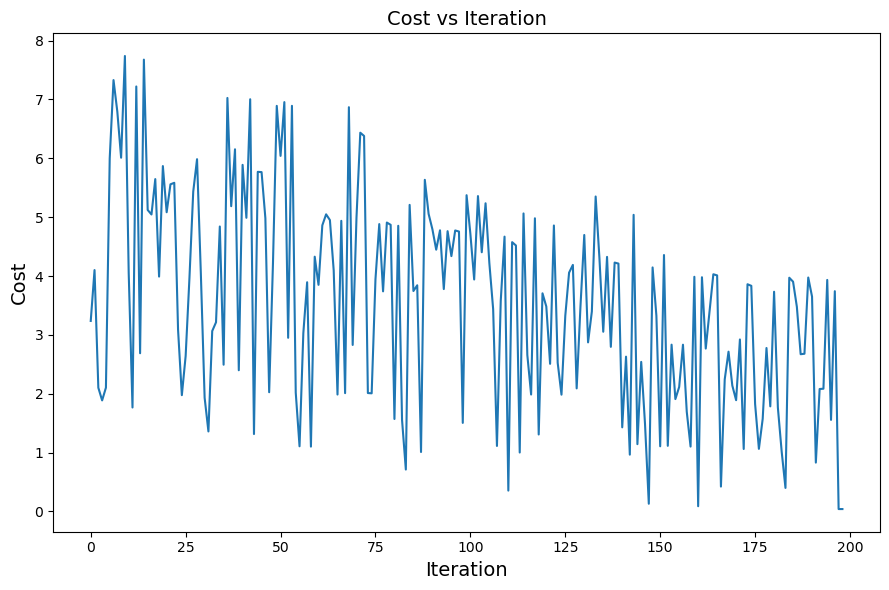

Model No.4

Threshold taken as 0.3
Confusion Matrix
[[ 72.   6.]
 [  2. 110.]]
Accuracy: 95.78947368421052
Precision: 98.21428571428571
Recall: 92.3076923076923



Threshold taken as 0.4
Confusion Matrix
[[ 69.   5.]
 [  5. 111.]]
Accuracy: 94.73684210526315
Precision: 95.6896551724138
Recall: 93.24324324324324



Threshold taken as 0.5
Confusion Matrix
[[ 69.   3.]
 [  5. 113.]]
Accuracy: 95.78947368421052
Precision: 95.76271186440678
Recall: 95.83333333333334



Threshold taken as 0.6
Confusion Matrix
[[ 69.   3.]
 [  5. 113.]]
Accuracy: 95.78947368421052
Precision: 95.76271186440678
Recall: 95.83333333333334



Threshold taken as 0.7
Confusion Matrix
[[ 68.   3.]
 [  6. 113.]]
Accuracy: 95.26315789473684
Precision: 94.9579831932773
Recall: 95.77464788732394





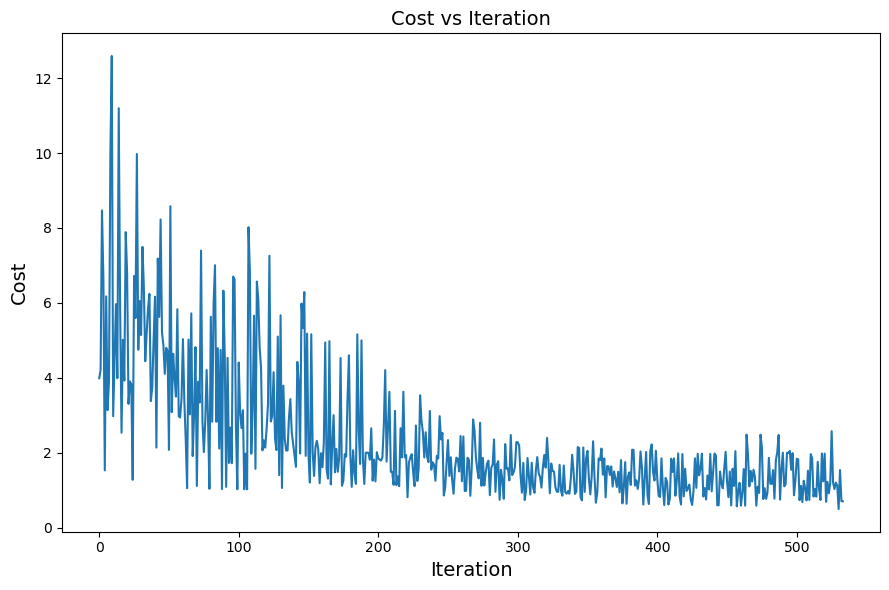

Model No.5

Threshold taken as 0.3
Confusion Matrix
[[ 69.   2.]
 [  1. 118.]]
Accuracy: 98.42105263157895
Precision: 99.15966386554622
Recall: 97.1830985915493



Threshold taken as 0.4
Confusion Matrix
[[ 69.   2.]
 [  1. 118.]]
Accuracy: 98.42105263157895
Precision: 99.15966386554622
Recall: 97.1830985915493



Threshold taken as 0.5
Confusion Matrix
[[ 69.   1.]
 [  1. 119.]]
Accuracy: 98.94736842105263
Precision: 99.16666666666667
Recall: 98.57142857142858



Threshold taken as 0.6
Confusion Matrix
[[ 68.   1.]
 [  2. 119.]]
Accuracy: 98.42105263157895
Precision: 98.34710743801654
Recall: 98.55072463768117



Threshold taken as 0.7
Confusion Matrix
[[ 66.   1.]
 [  4. 119.]]
Accuracy: 97.36842105263158
Precision: 96.7479674796748
Recall: 98.50746268656717



Accuracy:
 Mean = 96.21052631578945  Standard Deviation = 1.6102166885029834
Precision:
 Mean = 97.10300923905548  Standard Deviation = 1.1299303912285894
Recall:
 Mean = 95.012554468136  Standard Deviation = 2.710313596429774

In [127]:
# MINI BATCH GRADIENT DESCENT
accuracy_list = np.zeros(5)
precision_list = np.zeros(5)
recall_list = np.zeros(5)
for i in range(0,5):
    # Splitting Dataset into Training Data and Testing Data
    training_data = dataset2.sample(frac=2/3)
    test_data = dataset2.drop(training_data.index)
    
    training_data.reset_index(drop=True)    
    training_data_target = training_data.diagnosis    
    training_data = training_data.drop("diagnosis", axis=1)

    test_data.reset_index(drop=True)
    test_data_target = test_data.diagnosis
    test_data = test_data.drop("diagnosis", axis=1)
    
    # Learing Rate
    learning_rate = 0.001
    
    # Error Parameter
    max_error = 0.001
    
    # Train Model and get the Weight
    weight,error = logistic_regression_mini_batch(training_data.to_numpy(),training_data_target.to_numpy(), learning_rate,50,max_error,0)

    # Plot Graph
    plt.figure(figsize = (9,6))
    plt.plot(error)
    plt.xlabel("Iteration",fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    plt.title("Cost vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    print(f"Model No.{i+1}\n")
    
    # Threshold
    threshold = 0.3
    
    # Test the Test_data on our Weight
    for j in range (0,5):
        c_mat = check_logistic_regression(test_data.to_numpy(),test_data_target.to_numpy(),threshold,weight)
        print(f"Threshold taken as {threshold}")
        print("Confusion Matrix")
        print(c_mat)
        print(f"Accuracy: {accuracy(c_mat)}")
        print(f"Precision: {precision(c_mat)}")
        print(f"Recall: {recall(c_mat)}")
        print("\n\n")
        if threshold ==0.5:
            accuracy_list[i] =  accuracy(c_mat)
            precision_list[i] = precision(c_mat)
            recall_list[i] =  recall(c_mat)
        threshold +=0.1
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")